# W207 Final Project: Housing Price Prediction
Authors: John Lee, Nathan Nusaputra, Ryan Sawasaki

# Abstract - Baseline

For our baseline model, we decided to use three features detailing the square footage of a home due to domain knowledge. These features are: 'GrLivArea', 'TotalBsmtSF','GarageArea'.  We determined that the linear regression model would be our baseline model since it had the highest accuracy out of the three models we tried using. We will evaluate our future performances on this baseline model.  

Key items that will continue to be discussed:  
A) What will be our evaluation function?  Accuracy with ".score" or Root-Mean-Squared-Error?
B) How are we going to standardize the model (if needed)?  StandardScaler? or another package?
C) Which machine learning model to use? Which hyperparameters to tune? Which features to use?

Steps:  
1) Importing Packages  
We imported a bunch of standard libraries (numpy, pandas, seaborn, etc..) as well as a bunch of sci-kit learn libraries for preprocessing, metrics, and models.  

2) Load and Inspect Data  
We loaded our raw data and inspected the data type and a few samples.  


3) Exploratory Data Analysis  
While exploring the data, we found that there are a lot of missing data. 33 features of the actual test data (data without class labels/sales price) had NaN data while only 19 features of the training data had NaN data. After the baseline, we intend to fill these NaN with zeros when appropriate or just drop the features.  


4) Correlations between Sales Price and Different Features  
We graphed the correlation between Sales Price with float/int type data.  We graphed a few features of object type data with Sales Price to show how we anaylzed the data. Those we find most relative to sales price will be used for our final models (not in this baseline). 


5) Baseline Models  
We determined the features that we will use for our baseline model. Did a scatter plot matrix to further dive into the data. We also did a linear model, kneighbors model, and gradient boosting model (all regressions) on these features to general a baseline model for our project.


# Abstract - Final Model

For the remainder of this notebook, several machine learning algorithms were applied to improve upon the baseline model. The steps create these additional models, feature engineer, and engineering the hyperparameters are shown in detail and described. 

Key Sections:  
1) 


# Importing Packages

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# General libraries.
import re
import time
import numpy as np
import pandas as pd # to read in csv
import matplotlib.pyplot as plt
import seaborn as sns

# SK-learn libraries for learning.
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import ensemble


# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error

# SK-learn libraries for feature extraction from text.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

# Load and Inspect Data

In [2]:
#Read in data

# house price data
train_df_raw = pd.read_csv("data_raw\\train.csv") 
test_df_raw = pd.read_csv("data_raw\\test.csv")

print("Train Shape:", train_df_raw.shape)
print("Test Shape:", test_df_raw.shape)
print(train_df_raw.dtypes.value_counts())
train_df_raw.head(2)

Train Shape: (1460, 81)
Test Shape: (1459, 80)
object     43
int64      35
float64     3
dtype: int64


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  

[2 rows x 81 columns]

# Exploratory Data Analysis

In [3]:
train_df_raw.describe(include = 'all')

Id   MSSubClass MSZoning  LotFrontage        LotArea Street  \
count   1460.000000  1460.000000     1460  1201.000000    1460.000000   1460   
unique          NaN          NaN        5          NaN            NaN      2   
top             NaN          NaN       RL          NaN            NaN   Pave   
freq            NaN          NaN     1151          NaN            NaN   1454   
mean     730.500000    56.897260      NaN    70.049958   10516.828082    NaN   
std      421.610009    42.300571      NaN    24.284752    9981.264932    NaN   
min        1.000000    20.000000      NaN    21.000000    1300.000000    NaN   
25%      365.750000    20.000000      NaN    59.000000    7553.500000    NaN   
50%      730.500000    50.000000      NaN    69.000000    9478.500000    NaN   
75%     1095.250000    70.000000      NaN    80.000000   11601.500000    NaN   
max     1460.000000   190.000000      NaN   313.000000  215245.000000    NaN   

       Alley LotShape LandContour Utilities  ...     PoolArea PoolQC  Fence  \
count     91     1460        1460      1460  ...  1460.000000      7    281   
unique     2        4           4         2  ...          NaN      3      4   
top     Grvl      Reg         Lvl    AllPub  ...          NaN     Gd  MnPrv   
freq      50      925        1311      1459  ...          NaN      3    157   
mean     NaN      NaN         NaN       NaN  ...     2.758904    NaN    NaN   
std      NaN      NaN         NaN       NaN  ...    40.177307    NaN    NaN   
min      NaN      NaN         NaN       NaN  ...     0.000000    NaN    NaN   
25%      NaN      NaN         NaN       NaN  ...     0.000000    NaN    NaN   
50%      NaN      NaN         NaN       NaN  ...     0.000000    NaN    NaN   
75%      NaN      NaN         NaN       NaN  ...     0.000000    NaN    NaN   
max      NaN      NaN         NaN       NaN  ...   738.000000    NaN    NaN   

       MiscFeature       MiscVal       MoSold       YrSold  SaleType  \
count           54   1460.000000  1460.000000  1460.000000      1460   
unique           4           NaN          NaN          NaN         9   
top           Shed           NaN          NaN          NaN        WD   
freq            49           NaN          NaN          NaN      1267   
mean           NaN     43.489041     6.321918  2007.815753       NaN   
std            NaN    496.123024     2.703626     1.328095       NaN   
min            NaN      0.000000     1.000000  2006.000000       NaN   
25%            NaN      0.000000     5.000000  2007.000000       NaN   
50%            NaN      0.000000     6.000000  2008.000000       NaN   
75%            NaN      0.000000     8.000000  2009.000000       NaN   
max            NaN  15500.000000    12.000000  2010.000000       NaN   

        SaleCondition      SalePrice  
count            1460    1460.000000  
unique              6            NaN  
top            Normal            NaN  
freq             1198            NaN  
mean              NaN  180921.195890  
std               NaN   79442.502883  
min               NaN   34900.000000  
25%               NaN  129975.000000  
50%               NaN  163000.000000  
75%               NaN  214000.000000  
max               NaN  755000.000000  

[11 rows x 81 columns]

In [4]:
test_df_raw.describe(include = 'all')

Id   MSSubClass MSZoning  LotFrontage       LotArea Street  \
count   1459.000000  1459.000000     1455  1232.000000   1459.000000   1459   
unique          NaN          NaN        5          NaN           NaN      2   
top             NaN          NaN       RL          NaN           NaN   Pave   
freq            NaN          NaN     1114          NaN           NaN   1453   
mean    2190.000000    57.378341      NaN    68.580357   9819.161069    NaN   
std      421.321334    42.746880      NaN    22.376841   4955.517327    NaN   
min     1461.000000    20.000000      NaN    21.000000   1470.000000    NaN   
25%     1825.500000    20.000000      NaN    58.000000   7391.000000    NaN   
50%     2190.000000    50.000000      NaN    67.000000   9399.000000    NaN   
75%     2554.500000    70.000000      NaN    80.000000  11517.500000    NaN   
max     2919.000000   190.000000      NaN   200.000000  56600.000000    NaN   

       Alley LotShape LandContour Utilities  ...  ScreenPorch     PoolArea  \
count    107     1459        1459      1457  ...  1459.000000  1459.000000   
unique     2        4           4         1  ...          NaN          NaN   
top     Grvl      Reg         Lvl    AllPub  ...          NaN          NaN   
freq      70      934        1311      1457  ...          NaN          NaN   
mean     NaN      NaN         NaN       NaN  ...    17.064428     1.744345   
std      NaN      NaN         NaN       NaN  ...    56.609763    30.491646   
min      NaN      NaN         NaN       NaN  ...     0.000000     0.000000   
25%      NaN      NaN         NaN       NaN  ...     0.000000     0.000000   
50%      NaN      NaN         NaN       NaN  ...     0.000000     0.000000   
75%      NaN      NaN         NaN       NaN  ...     0.000000     0.000000   
max      NaN      NaN         NaN       NaN  ...   576.000000   800.000000   

       PoolQC  Fence MiscFeature       MiscVal       MoSold       YrSold  \
count       3    290          51   1459.000000  1459.000000  1459.000000   
unique      2      4           3           NaN          NaN          NaN   
top        Ex  MnPrv        Shed           NaN          NaN          NaN   
freq        2    172          46           NaN          NaN          NaN   
mean      NaN    NaN         NaN     58.167923     6.104181  2007.769705   
std       NaN    NaN         NaN    630.806978     2.722432     1.301740   
min       NaN    NaN         NaN      0.000000     1.000000  2006.000000   
25%       NaN    NaN         NaN      0.000000     4.000000  2007.000000   
50%       NaN    NaN         NaN      0.000000     6.000000  2008.000000   
75%       NaN    NaN         NaN      0.000000     8.000000  2009.000000   
max       NaN    NaN         NaN  17000.000000    12.000000  2010.000000   

        SaleType  SaleCondition  
count       1458           1459  
unique         9              6  
top           WD         Normal  
freq        1258           1204  
mean         NaN            NaN  
std          NaN            NaN  
min          NaN            NaN  
25%          NaN            NaN  
50%          NaN            NaN  
75%          NaN            NaN  
max          NaN            NaN  

[11 rows x 80 columns]

**Comment**:
The describe function showed us that we should consider NaN data on many features (see below). Also, it was interesting to see the range of sales price (from 34,900 to 755,000USD) and other feature characteristics.

In [5]:
# Checking Missingness

# TRAINING DATA MISSINGNESS 
df_missing_data = train_df_raw.isnull().sum(axis=0)[train_df_raw.isnull().sum(axis=0) != 0]
# TEST DATA MISSINGNESS
df_missing_data2 = test_df_raw.isnull().sum(axis=0)[test_df_raw.isnull().sum(axis=0) != 0]

# Code to see which sample Id has missing data per feature
feature_train='MasVnrType'
print("Train Feature %s has NaN at following indices:" %feature_train, train_df_raw["Id"][train_df_raw[feature_train].isnull()].unique())
print("")
feature_test='MasVnrType'
print("Test Feature %s has NaN at following indices:" %feature_test, test_df_raw["Id"][test_df_raw[feature_test].isnull()].unique())
print("")

print("Number of train features with missing data:", len(df_missing_data))
#histograms of features with missing data
print("Number of test features with missing data:", len(df_missing_data2))


df_missing1 = pd.DataFrame(df_missing_data, columns=['train_missing_count'])
df_missing2 = pd.DataFrame(df_missing_data2,columns=['test_missing_count'])
df_missing = pd.merge(df_missing1,df_missing2, left_on=df_missing1.index, right_on=df_missing2.index, how='outer')
df_missing.columns=['feature','train_missing_count','test_missing_count']
df_missing=df_missing.sort_values(by=['test_missing_count'], ascending=False)
df_missing

Train Feature MasVnrType has NaN at following indices: [ 235  530  651  937  974  978 1244 1279]

Test Feature MasVnrType has NaN at following indices: [1692 1707 1883 1993 2005 2042 2312 2326 2341 2350 2369 2593 2611 2658
 2687 2863]

Number of train features with missing data: 19
Number of test features with missing data: 33


feature  train_missing_count  test_missing_count
16        PoolQC               1453.0              1456.0
18   MiscFeature               1406.0              1408.0
1          Alley               1369.0              1352.0
17         Fence               1179.0              1169.0
10   FireplaceQu                690.0               730.0
0    LotFrontage                259.0               227.0
12   GarageYrBlt                 81.0                78.0
13  GarageFinish                 81.0                78.0
14    GarageQual                 81.0                78.0
15    GarageCond                 81.0                78.0
11    GarageType                 81.0                76.0
5       BsmtCond                 37.0                45.0
6   BsmtExposure                 38.0                44.0
4       BsmtQual                 37.0                44.0
8   BsmtFinType2                 38.0                42.0
7   BsmtFinType1                 37.0                42.0
2     MasVnrType                  8.0                16.0
3     MasVnrArea                  8.0                15.0
19      MSZoning                  NaN                 4.0
27  BsmtFullBath                  NaN                 2.0
30    Functional                  NaN                 2.0
28  BsmtHalfBath                  NaN                 2.0
20     Utilities                  NaN                 2.0
24    BsmtFinSF2                  NaN                 1.0
25     BsmtUnfSF                  NaN                 1.0
26   TotalBsmtSF                  NaN                 1.0
23    BsmtFinSF1                  NaN                 1.0
22   Exterior2nd                  NaN                 1.0
29   KitchenQual                  NaN                 1.0
21   Exterior1st                  NaN                 1.0
31    GarageCars                  NaN                 1.0
32    GarageArea                  NaN                 1.0
33      SaleType                  NaN                 1.0
9     Electrical                  1.0                 NaN

**Comment**:  
We found many features with NaN data. We intend to fill these NaN data with our domain knowledge (i.e. for those missing "LotFrontage" for size of front lot data, we would just show 0's instead of NaN).  Otherwise, we will drop the feature themselves (i.e. "PoolQC" for Pool Quality).

In [6]:
# Check for Duplicates?
print("Duplicates in Train Data:",sum(train_df_raw.duplicated()))
print("Duplicates in Test Data:",sum(test_df_raw.duplicated()))

Duplicates in Train Data: 0
Duplicates in Test Data: 0


**Comment**:  
There are no duplicated data.

# Checking Correlations between Sales Price and Other Features

In [7]:
##Number of each Type of data:
# print(train_df_raw.dtypes[(train_df_raw.dtypes != 'float') & (train_df_raw.dtypes !='int64')])
print("Float: %d" %len(train_df_raw.dtypes[(train_df_raw.dtypes == 'float')]))
print("Int: %d" %len(train_df_raw.dtypes[(train_df_raw.dtypes == 'int64')]))
print("Object: %d" %len(train_df_raw.dtypes[(train_df_raw.dtypes == 'object')]))

Float: 3
Int: 35
Object: 43


**Comment**:  
Since the data type range from Float, Int, to Object, we must show correlation differently.  Float and Int type data can be shown with a correlation graph.  Object type data can be shown with boxplot or lmplot.
    

Float & Int Features: 37


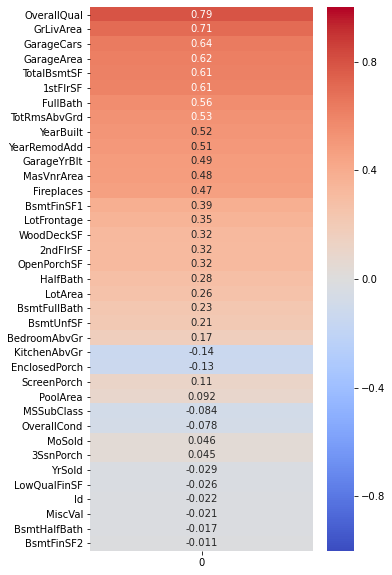

In [8]:
#Correlations between Sales Price & Int/Float Features
correlations = train_df_raw.corrwith(train_df_raw['SalePrice']).iloc[:-1].to_frame()
correlations['abs'] = correlations[0].abs()
sorted_correlations = correlations.sort_values('abs', ascending=False)[0]
fig, ax = plt.subplots(figsize=(5,10))
sns.heatmap(sorted_correlations.to_frame(), cmap='coolwarm', annot=True, vmin=-1, vmax=1);
print("Float & Int Features: %d" %len(correlations))

**Comment**:  
We can see that OverallQual, GrLivArea, GarageCars are the top 3 most correlated features to Sales Price.  

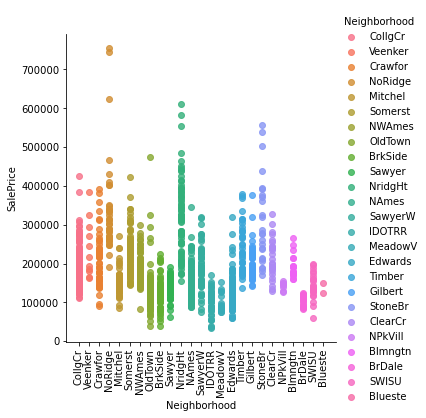

In [9]:
#Correlations between Sales Price & A Few Object Type Features

#Feature: Neighborhood

neighborhood_df = train_df_raw[['Neighborhood','SalePrice']]
neigh_plot = sns.lmplot('Neighborhood', 'SalePrice', data=neighborhood_df, hue='Neighborhood', fit_reg=False)
neigh_plot.set_xticklabels(rotation=90)

**Comment**:  
We see that for certain neighborhoods, the Sales Price is generally higher.

(array([-100000.,       0.,  100000.,  200000.,  300000.,  400000.,
         500000.,  600000.,  700000.,  800000.]),
 <a list of 10 Text major ticklabel objects>)

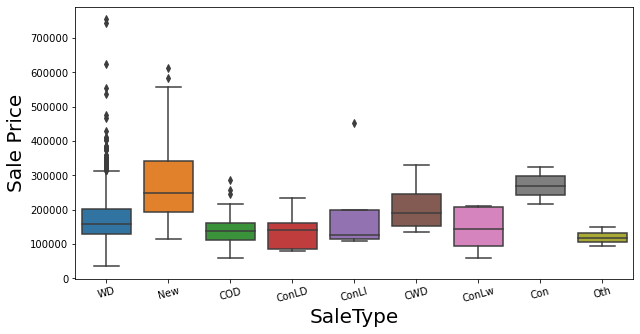

In [10]:
#Correlations between Sales Price & A Few Object Type Features

#Feature: SaleType

feature_object = 'SaleType'           #CHANGE THIS TO UPDATE PLOT
x_feature = train_df_raw.SaleType     #CHANGE THIS TO UPDATE PLOT
plt.figure(figsize=(10,5))
b= sns.boxplot(x_feature, train_df_raw.SalePrice)  #can also do violinplot
b.set_xlabel("%s" %feature_object, fontsize=20)
b.set_ylabel("Sale Price", fontsize=20)
plt.xticks(fontsize=10, rotation=15)
plt.yticks(fontsize=10)

**Comment**:  
We see that for New (just constructed and sold) and Con (15% down payment) Type, the Sales Price is generally higher.

(array([-100000.,       0.,  100000.,  200000.,  300000.,  400000.,
         500000.,  600000.,  700000.,  800000.]),
 <a list of 10 Text major ticklabel objects>)

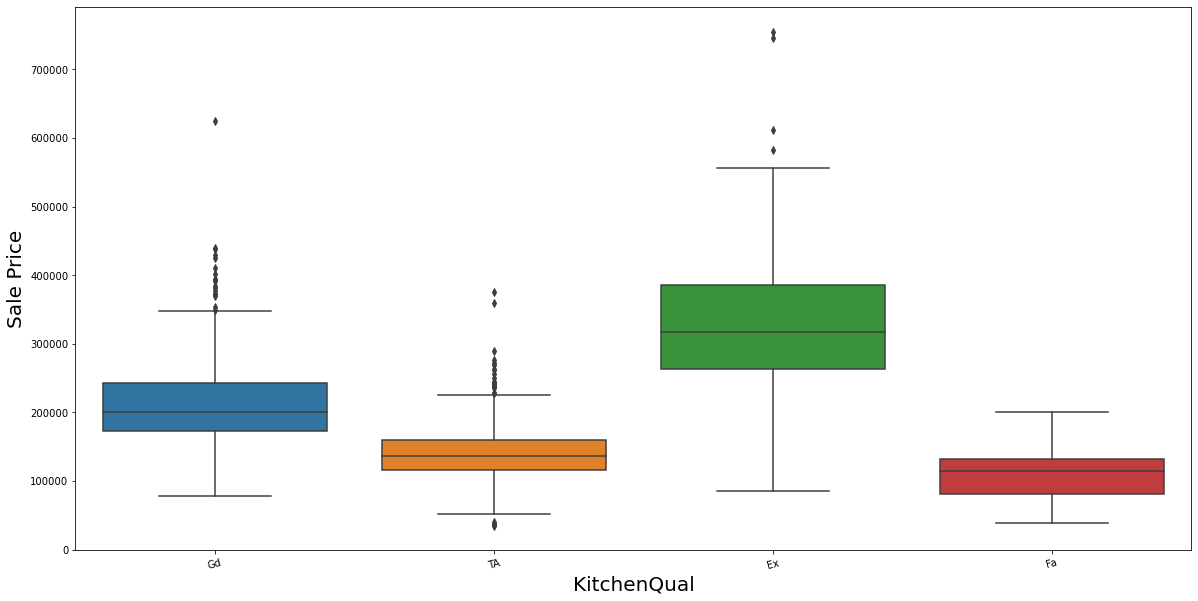

In [11]:
#Correlations between Sales Price & A Few Object Type Features

#Feature: KitchenQual

feature_object = 'KitchenQual'           #CHANGE THIS TO UPDATE PLOT
x_feature = train_df_raw.KitchenQual     #CHANGE THIS TO UPDATE PLOT
plt.figure(figsize=(20,10))
b= sns.boxplot(x_feature, train_df_raw.SalePrice)  #can also do violinplot
b.set_xlabel("%s" %feature_object, fontsize=20)
b.set_ylabel("Sale Price", fontsize=20)
plt.xticks(fontsize=10, rotation=15)
plt.yticks(fontsize=10)

**Comment**:  
We see that for Ex (excellent) kitchen quality, the Sales Price is generally higher.

# Baseline Model(s)

**Comment**:
Using our domain knowledge, we believe the square footage of a house is most indicative of a house's sales price. We can see that the Ground Living Area (GrLivArea), Total Basement Area (TotalBsmtSF), and Garage Area (GarageArea) are 3 of the top 5 most correlated to the Sales Price in the plot above. Therefore, our baseline model will include these three features.

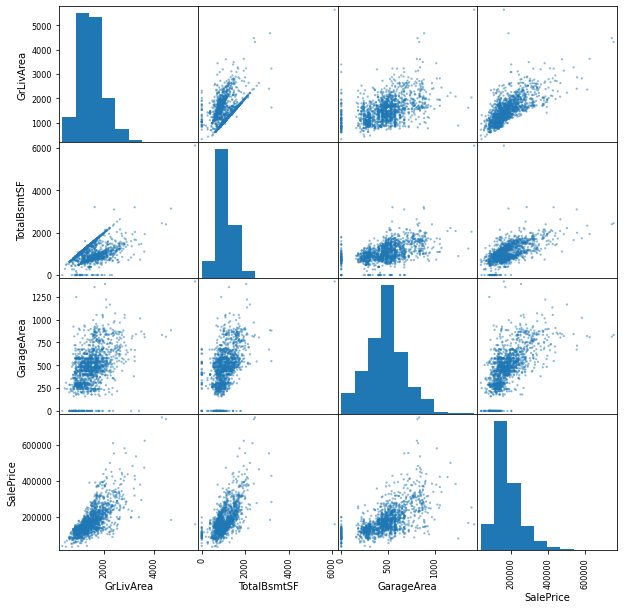

In [12]:
# Scatterplot matrix of baseline model features

baseline_features=['GrLivArea', 'TotalBsmtSF','GarageArea','SalePrice']
train_df_baseline=train_df_raw[baseline_features]
train_df_baseline.head()
ax = pd.plotting.scatter_matrix(train_df_baseline,
                                figsize=(10,10),
                                marker='o', s=5)
for ax in ax.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize = 10, rotation = 0)
    ax.set_ylabel(ax.get_ylabel(), fontsize = 10, rotation = 90)

**Comment**:  
Scatterplot matrix shows trends indicating that sales price goes up when ground living area, basement area, and garage area goes up.

In [13]:
# Format Data for Modeling

#Standardize Data
scaler=StandardScaler()
train_df_std=pd.DataFrame(scaler.fit_transform(train_df_baseline))
X = train_df_std.iloc[:,:-1]
y = train_df_std.iloc[:,-1]
train_data_bl_std, dev_data_bl_std, train_labels_bl_std, dev_labels_bl_std = train_test_split(X,y, test_size=0.2) 
print("Standardized Train Data Shape:", train_data_bl_std.shape)
print("Standardized Dev Data Shape:", dev_data_bl_std.shape)

#Did not Standardize Data
X = train_df_baseline.iloc[:,:-1]
y = train_df_baseline.iloc[:,-1]
train_data_bl, dev_data_bl, train_labels_bl, dev_labels_bl = train_test_split(X,y, test_size=0.2)  
print("UnStandardized Train Data Shape:", train_data_bl.shape)
print("UnStandardized Dev Data Shape:", dev_data_bl.shape)

Standardized Train Data Shape: (1168, 3)
Standardized Dev Data Shape: (292, 3)
UnStandardized Train Data Shape: (1168, 3)
UnStandardized Dev Data Shape: (292, 3)


**Comment**:
We started work with non-standardized data because we were only comparing square footage features in our baseline. However, we will investigate standardized data further after this baseline model

Estimated function: y = -20418.29 + 67.47*x_1 + 46.55*x_2 + 104.50*x_3
R^2: 0.6439784556177048
Accuracy: 0.7251224998312179
Root Mean Squared Error: 43316.40702357577
Mean Squared Log Error: 0.04342640324889593


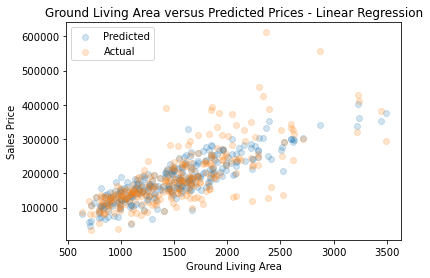

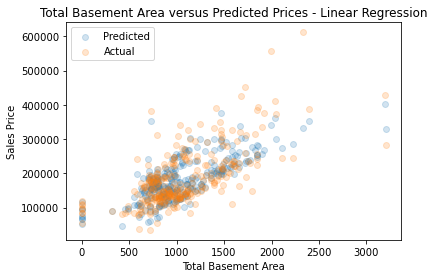

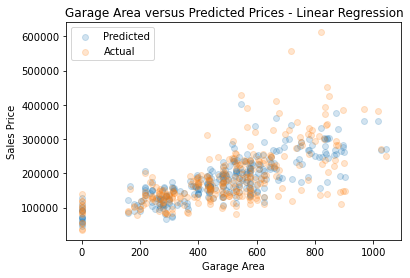

In [14]:
#Linear regression model without Standardized Data

lr = LinearRegression(fit_intercept=True)
lr.fit(train_data_bl, train_labels_bl)                 #fit model
print ("Estimated function: y = %.2f + %.2f*x_1 + %.2f*x_2 + %.2f*x_3" %(lr.intercept_, lr.coef_[0], lr.coef_[1], lr.coef_[2]))
prediction = lr.predict(dev_data_bl)    #predict
print("R^2:",lr.score(train_data_bl,train_labels_bl))    #Finding R^2
print("Accuracy:",lr.score(dev_data_bl,dev_labels_bl))    #Finding accuracy of dev data
print("Root Mean Squared Error:", mean_squared_error(dev_labels_bl, prediction, squared=False))
print("Mean Squared Log Error:", mean_squared_log_error(dev_labels_bl, prediction))

fig2=plt.figure()
fig2=plt.title('Ground Living Area versus Predicted Prices - Linear Regression')
fig2=plt.xlabel('Ground Living Area')
fig2=plt.ylabel('Sales Price')
fig2=plt.scatter(dev_data_bl['GrLivArea'],prediction, alpha=0.2)
fig2=plt.scatter(dev_data_bl['GrLivArea'],dev_labels_bl, alpha=0.2)
fig2=plt.legend(['Predicted', 'Actual'],loc='upper left')

fig3=plt.figure()
fig3=plt.title('Total Basement Area versus Predicted Prices - Linear Regression')
fig3=plt.xlabel('Total Basement Area')
fig3=plt.ylabel('Sales Price')
fig3=plt.scatter(dev_data_bl['TotalBsmtSF'],prediction, alpha=0.2)
fig3=plt.scatter(dev_data_bl['TotalBsmtSF'],dev_labels_bl, alpha=0.2)
fig3=plt.legend(['Predicted', 'Actual'],loc='upper left')

fig4=plt.figure()
fig4=plt.title('Garage Area versus Predicted Prices - Linear Regression')
fig4=plt.xlabel('Garage Area')
fig4=plt.ylabel('Sales Price')
fig4=plt.scatter(dev_data_bl['GarageArea'],prediction, alpha=0.2)
fig4=plt.scatter(dev_data_bl['GarageArea'],dev_labels_bl, alpha=0.2)
fig4=plt.legend(['Predicted', 'Actual'],loc='upper left')

**Comment**:  
It appears that the linear regression model without standardized data performed the best in terms of accuracy.

In [15]:
#Linear regression model with Standardized Data

lr = LinearRegression(fit_intercept=True)
lr.fit(train_data_bl_std, train_labels_bl_std)                 #fit model
print ("Estimated function: y = %.2f + %.2f*x_1 + %.2f*x_2 + %.2f*x_3" %(lr.intercept_, lr.coef_[0], lr.coef_[1], lr.coef_[2]))
prediction = lr.predict(dev_data_bl_std)    #predict
print("R^2:",lr.score(train_data_bl_std,train_labels_bl_std))    #Finding R^2
print("Accuracy:",lr.score(dev_data_bl_std,dev_labels_bl_std))    #Finding accuracy of dev data
print("Root Mean Squared Error:", mean_squared_error(dev_labels_bl_std, prediction, squared=False))
#Cannot find mean squared log error because after standardizing, there are negative labels.

Estimated function: y = -0.00 + 0.47*x_1 + 0.33*x_2 + 0.27*x_3
R^2: 0.7114761818985047
Accuracy: 0.4654483981670773
Root Mean Squared Error: 0.7650666138128864


**Comment**:  
It appears that the linear regression model with standardized data performed worse but the RMSE is much lower.

In [16]:
#K-Nearest Neighbors Regressor Model

knn = KNeighborsRegressor(n_neighbors=1)
knn.fit(train_data_bl, train_labels_bl)  
prediction = knn.predict(dev_data_bl)
print("R^2:",knn.score(train_data_bl,train_labels_bl))    #Finding R^2
print("Accuracy:",knn.score(dev_data_bl,dev_labels_bl))    #Finding accuracy of dev data
print("Root Mean Squared Error:", mean_squared_error(dev_labels_bl, prediction, squared=False))
print("Mean Squared Log Error:", mean_squared_log_error(dev_labels_bl, prediction))

R^2: 0.9983157512681696
Accuracy: 0.4693759196171493
Root Mean Squared Error: 60183.34290381989
Mean Squared Log Error: 0.0746144918950082


**Comment**:  
We wanted to try out k Neighbors to see its performance. It appears that the k neighbors regression model with non-standardized data had lower accuracy than linear regression.

In [17]:
#Gradient Boosting Regressor Model

train_data_bl = train_data_bl[['GrLivArea', 'TotalBsmtSF','GarageArea']]
dev_data_bl = dev_data_bl[['GrLivArea','TotalBsmtSF', 'GarageArea']]
gradbst = ensemble.GradientBoostingRegressor(n_estimators = 10, max_depth=5, min_samples_split=2, learning_rate=0.1,
                                            loss='ls')
gradbst.fit(train_data_bl, train_labels_bl)
prediction = gradbst.predict(dev_data_bl)
gradbst.score(dev_data_bl,dev_labels_bl)

print("R^2:",gradbst.score(train_data_bl,train_labels_bl))    #Finding R^2
print("Accuracy:",gradbst.score(dev_data_bl,dev_labels_bl))    #Finding accuracy of dev data
print("Root Mean Squared Error:", mean_squared_error(dev_labels_bl, prediction, squared=False))
print("Mean Squared Log Error:", mean_squared_log_error(dev_labels_bl, prediction))

R^2: 0.7330373829107583
Accuracy: 0.6643609973207428
Root Mean Squared Error: 47865.107719696854
Mean Squared Log Error: 0.06324040435809435


**Comment**:  
We wanted to try out gradient boosting regressor with nonstandardized data to also see its performance. It appears to have relatively high accuracy compared with linear regression and k-nearest neighbors regression.   


# Data Formatting

After EDA, we have determined several features that may be dropped due to large amounts of missing/NaN data. Other features with missing/NaN data will be converted to None or 0 value so that the feature may still be used in our model.  

Categorical data will be separated to ordinal and nominal. Ordinal data will be converted to integers that include the ordering of the data. Nominal data will be converted to dummy variables.  

Finally, we will standard scale all of the independent features while leaving the dependent feature (saleprice) alone.

In [18]:
# ORIGINAL DATA SIZE FOR REFERENCE
print("Train Shape:", train_df_raw.shape)
print("Test Shape:", test_df_raw.shape)

Train Shape: (1460, 81)
Test Shape: (1459, 80)


In [19]:
# DROPPING TOP 5 MOST MISSING/NAN FEATURES:
top_5_missing = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu']
train_df_raw2 = train_df_raw.drop(top_5_missing,axis=1)
test_df_raw2 = test_df_raw.drop(top_5_missing,axis=1)
print("Train Data Dropped Top 5 Missing/NaN Columns Shape:", train_df_raw2.shape)
print("Test Data Dropped Top 5 Missing/NaN Columns Shape:", test_df_raw2.shape)

Train Data Dropped Top 5 Missing/NaN Columns Shape: (1460, 76)
Test Data Dropped Top 5 Missing/NaN Columns Shape: (1459, 75)


In [20]:
# CONVERTING NAN DATA TO 0 OR NONE

#Numerical Data to 0
numerical_NaN = ['LotFrontage','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF',
                 'TotalBsmtSF','BsmtFullBath','BsmtHalfBath','GarageYrBlt','GarageCars',
                 'GarageArea']
train_df_raw2[numerical_NaN]=train_df_raw2[numerical_NaN].fillna(0)
test_df_raw2[numerical_NaN]=test_df_raw2[numerical_NaN].fillna(0)

#Categorical Data to None
categorical_NaN = ['MSZoning','Utilities','Exterior1st','Exterior2nd','MasVnrType',
                   'SaleType','Electrical','GarageType','Functional','BsmtQual',
                   'BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
                   'KitchenQual','GarageFinish','GarageQual','GarageCond']
train_df_raw2[categorical_NaN]=train_df_raw2[categorical_NaN].fillna('None')
test_df_raw2[categorical_NaN]=test_df_raw2[categorical_NaN].fillna('None')

# Check if it worked by checking Missingness
dftrain_missing = train_df_raw2.isnull().sum(axis=0)[train_df_raw2.isnull().sum(axis=0) != 0] # TRAINING DATA MISSINGNESS 
dftest_missing = test_df_raw2.isnull().sum(axis=0)[test_df_raw2.isnull().sum(axis=0) != 0] # TEST DATA MISSINGNESS
print("Number of train features (after replacing NaN data) with missing data:", len(dftrain_missing))
print("Number of test features (after replacing NaN data) with missing data:", len(dftest_missing))

Number of train features (after replacing NaN data) with missing data: 0
Number of test features (after replacing NaN data) with missing data: 0


In [21]:
# CONVERT ORDINAL DATA TO INTEGERS TO INCLUDE ORDERING OF DATA

# 1 is worst, largest number is best, use mapping
train_df_raw2['Functional']=train_df_raw2['Functional'].map({'Typ':8,'Min1':7,'Min2':6,'Mod':5,'Maj1':4,'Maj2':3,'Sev':2,'Sal':1,'None':0})
train_df_raw2['BsmtQual']=train_df_raw2['BsmtQual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0,'None':0})
train_df_raw2['BsmtCond']=train_df_raw2['BsmtCond'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0,'None':0})
train_df_raw2['BsmtExposure']=train_df_raw2['BsmtExposure'].map({'Gd':4,'Av':3,'Mn':2,'No':1,'NA':0,'None':0})
train_df_raw2['BsmtFinType1']=train_df_raw2['BsmtFinType1'].map({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'NA':0,'None':0})
train_df_raw2['BsmtFinType2']=train_df_raw2['BsmtFinType2'].map({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'NA':0,'None':0})
train_df_raw2['KitchenQual']=train_df_raw2['KitchenQual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'None':0})
train_df_raw2['GarageFinish']=train_df_raw2['GarageFinish'].map({'Fin':3,'RFn':2,'Unf':1,'NA':0,'None':0})
train_df_raw2['GarageQual']=train_df_raw2['GarageQual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0,'None':0})
train_df_raw2['GarageCond']=train_df_raw2['GarageCond'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0,'None':0})
train_df_raw2['ExterQual']=train_df_raw2['ExterQual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0,'None':0})
train_df_raw2['ExterCond']=train_df_raw2['ExterCond'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0,'None':0})
train_df_raw2['LotShape']=train_df_raw2['LotShape'].map({'Reg':4,'IR1':3,'IR2':2,'IR3':1,'NA':0,'None':0})
train_df_raw2['LandSlope']=train_df_raw2['LandSlope'].map({'Gtl':3,'Mod':2,'Sev':1,'NA':0,'None':0})
train_df_raw2['HeatingQC']=train_df_raw2['HeatingQC'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0,'None':0})
train_df_raw2['PavedDrive']=train_df_raw2['PavedDrive'].map({'Y':3,'P':2,'N':1,'NA':0,'None':0})

test_df_raw2['Functional']=test_df_raw2['Functional'].map({'Typ':8,'Min1':7,'Min2':6,'Mod':5,'Maj1':4,'Maj2':3,'Sev':2,'Sal':1,'None':0})
test_df_raw2['BsmtQual']=test_df_raw2['BsmtQual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0,'None':0})
test_df_raw2['BsmtCond']=test_df_raw2['BsmtCond'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0,'None':0})
test_df_raw2['BsmtExposure']=test_df_raw2['BsmtExposure'].map({'Gd':4,'Av':3,'Mn':2,'No':1,'NA':0,'None':0})
test_df_raw2['BsmtFinType1']=test_df_raw2['BsmtFinType1'].map({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'NA':0,'None':0})
test_df_raw2['BsmtFinType2']=test_df_raw2['BsmtFinType2'].map({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'NA':0,'None':0})
test_df_raw2['KitchenQual']=test_df_raw2['KitchenQual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'None':0})
test_df_raw2['GarageFinish']=test_df_raw2['GarageFinish'].map({'Fin':3,'RFn':2,'Unf':1,'NA':0,'None':0})
test_df_raw2['GarageQual']=test_df_raw2['GarageQual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0,'None':0})
test_df_raw2['GarageCond']=test_df_raw2['GarageCond'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0,'None':0})
test_df_raw2['ExterQual']=test_df_raw2['ExterQual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0,'None':0})
test_df_raw2['ExterCond']=test_df_raw2['ExterCond'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0,'None':0})
test_df_raw2['LotShape']=test_df_raw2['LotShape'].map({'Reg':4,'IR1':3,'IR2':2,'IR3':1,'NA':0,'None':0})
test_df_raw2['LandSlope']=test_df_raw2['LandSlope'].map({'Gtl':3,'Mod':2,'Sev':1,'NA':0,'None':0})
test_df_raw2['HeatingQC']=test_df_raw2['HeatingQC'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0,'None':0})
test_df_raw2['PavedDrive']=test_df_raw2['PavedDrive'].map({'Y':3,'P':2,'N':1,'NA':0,'None':0})


In [22]:
# CONVERT NOMINAL DATA TO DUMMIES

""" Running get_dummies on train and test data separately would not work because some training data could be
missing in test data and vice versa.  Therefore, we will combine all data and get_dummies. 
Reference: https://stackoverflow.com/questions/56738267/how-can-i-align-pandas-get-dummies-across-training-validation-testing 
"""
all_data = pd.concat([train_df_raw2, test_df_raw2]) 
all_data_dummy = pd.get_dummies(all_data)
print("all_data shape:", all_data_dummy.shape)

#We cannot split the data back to train, dev, and test yet, because standardizing features has the same issue

all_data shape: (2919, 223)


In [23]:
# MIN MAX SCALER THE DATA
from sklearn.preprocessing import MinMaxScaler

#First pull out SalePrice column since we won't be standard scaling the dependent feature
X=all_data_dummy.drop(['SalePrice'],axis=1)
Y=all_data_dummy['SalePrice']
print("Shape of all_data (dummies) X:", X.shape)
print("Shape of all_data (dummies) Y:", Y.shape)
#X.head(1)

#Scaling!
scaler=MinMaxScaler()
X_std=pd.DataFrame(scaler.fit_transform(X))      #only scaled independent features
print("Shape of standardized X:", X_std.shape)
#X_std.head(1)

#Add the Sale Price feature column back into all_data
all_data_std = X_std
all_data_std = all_data_std.assign(SalePrice = list(Y))  #adds SalePrice data back in
print("Shape of standardized X plus SalePrice column:", all_data_std.shape)

Shape of all_data (dummies) X: (2919, 222)
Shape of all_data (dummies) Y: (2919,)
Shape of standardized X: (2919, 222)
Shape of standardized X plus SalePrice column: (2919, 223)


In [24]:
X.head(1)

Id  MSSubClass  LotFrontage  LotArea  LotShape  LandSlope  OverallQual  \
0   1          60         65.0     8450         4          3            7   

   OverallCond  YearBuilt  YearRemodAdd  ...  SaleType_New  SaleType_None  \
0            5       2003          2003  ...             0              0   

   SaleType_Oth  SaleType_WD  SaleCondition_Abnorml  SaleCondition_AdjLand  \
0             0            1                      0                      0   

   SaleCondition_Alloca  SaleCondition_Family  SaleCondition_Normal  \
0                     0                     0                     1   

   SaleCondition_Partial  
0                      0  

[1 rows x 222 columns]

In [25]:
X_std.head(1)

0         1         2        3    4    5         6    7         8    \
0  0.0  0.235294  0.207668  0.03342  1.0  1.0  0.666667  0.5  0.949275   

        9    ...  212  213  214  215  216  217  218  219  220  221  
0  0.883333  ...  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  

[1 rows x 222 columns]

In [26]:
all_data_std.head(1)

0         1         2        3    4    5         6    7         8  \
0  0.0  0.235294  0.207668  0.03342  1.0  1.0  0.666667  0.5  0.949275   

          9  ...  213  214  215  216  217  218  219  220  221  SalePrice  
0  0.883333  ...  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0   208500.0  

[1 rows x 223 columns]

In [58]:
# SPLIT ALL_DATA TO TRAIN/TEST. THEN SPLIT TRAIN TO TEST/DEV.

# Split all_data to Train/Test
train_raw2, test_raw2 = train_test_split(all_data_std, test_size=1459/2919, shuffle=False)
test_raw2 = test_raw2.drop(['SalePrice'],axis=1)  #original test_data did not have SalePrice feature
print(train_raw2.shape)
print(test_raw2.shape)
test_data = test_raw2  #renaming test data

# Split Train data to Test/Dev
x = train_raw2.iloc[:,:-1]
y = train_raw2.iloc[:,-1]
train_data, dev_data, train_labels, dev_labels = train_test_split(x,y, test_size=0.2)  #20% dev, 80% test
print("Standardized Train Data Shape:", train_data.shape)
print("Standardized Dev Data Shape:", dev_data.shape)
print("Train Label Shape:", train_labels.shape)
print("Dev Label Shape:", dev_labels.shape)

(1460, 223)
(1459, 222)
Standardized Train Data Shape: (1168, 222)
Standardized Dev Data Shape: (292, 222)
Train Label Shape: (1168,)
Dev Label Shape: (292,)


In [59]:
# Replace the column names with original feature names from train data
for i in range(len(train_data.columns)):
    train_data = train_data.rename(columns={i: X.columns[i]})

for i in range(len(dev_data.columns)):
    dev_data = dev_data.rename(columns={i: X.columns[i]})

for i in range(len(test_data.columns)):
    test_data = test_data.rename(columns={i: X.columns[i]})

In [60]:
# SUMMARY OF DATA

# "train_data"    = Training Data
# "train_labels"  = Training Labels
# "dev_data"      = Development Data (to check accuracy of Machine Learning models)
# "dev_labels"    = Development Labels (to check accuracy of Machine Learning models)
# "test_data"     = Test Data (to predict housing price for submitting to Kaggle)


print("train_data:", train_data.shape)
print("train_labels:", train_labels.shape)
print("dev_data:", dev_data.shape)
print("dev_labels:", dev_labels.shape)
print("test_data",test_data.shape)

train_data: (1168, 222)
train_labels: (1168,)
dev_data: (292, 222)
dev_labels: (292,)
test_data (1459, 222)


# Linear Regression

Additional EDA for Linear Regression Models. It was determined that
the linear regression models were heavily influenced by outliers in the
SaleCondition variable. This variable included abnormal sales such as
short sales and sales between family members. The train data and 
corresponding train labels have been updated to remove abnormal sales rows
and only include data with normal sales

In [61]:
# update train_data and train labels to only include normal sales
train_labels_lr = train_labels[(train_data.SaleCondition_Normal == 1)]
train_data_lr = train_data[(train_data.SaleCondition_Normal == 1)]

print(train_data_lr.shape)
print(train_labels_lr.shape)

(961, 222)
(961,)


Feature Selection. It was determined after trial and error that using all of the features in the linear regression model results in a number of errors. However, too few features resulted in low accuracy. It was decided that an optimal way to select features is by taking the features with the highest correlation with Sales Price. 

Float & Int Features: 221


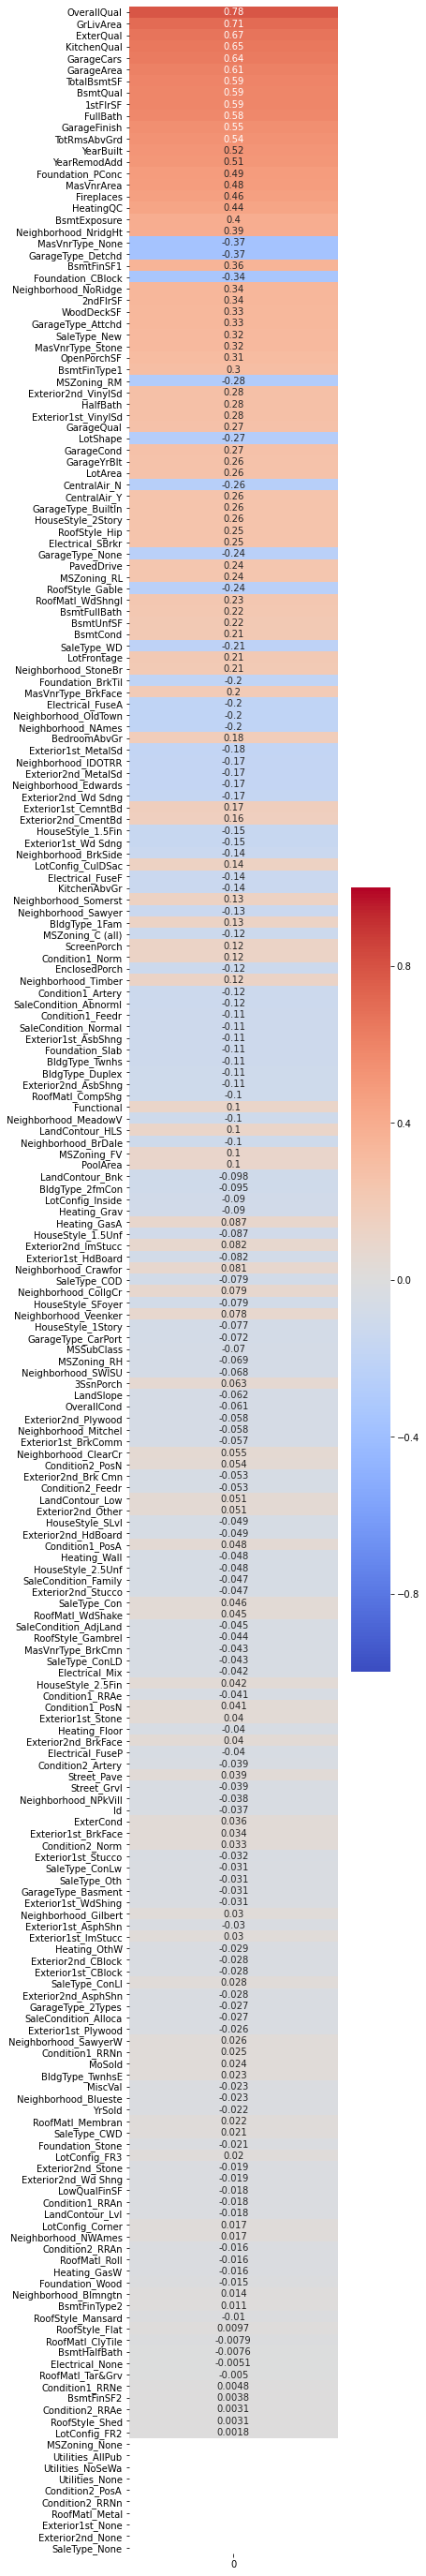

In [62]:
#Correlations between Sales Price & Int/Float Features
correlations = train_data.corrwith(train_labels).iloc[:-1].to_frame()
correlations['abs'] = correlations[0].abs()
sorted_correlations = correlations.sort_values('abs', ascending=False)[0]
fig, ax = plt.subplots(figsize=(5,50))
sns.heatmap(sorted_correlations.to_frame(), cmap='coolwarm', annot=True, vmin=-1, vmax=1);
print("Float & Int Features: %d" %len(correlations))

A function was created that would take in the the data features and the threshold cut off. The function would return the feature names of the variables that exceed the input correlation threshold

In [63]:
def GetFeatures(train_data, threshold = 0.5):
    '''This function takes in the data and a desired threshold
    for the correlation between a feature and SalesPrice. The function
    outputs all features names that are greater than the threshold.'''
    
    corr_features = []
    corr_value = []
    
    correlation = train_data.corrwith(train_labels).iloc[:-1].to_frame()
   
    for i, idx in enumerate(correlation.index):

        if abs(correlation[0][idx]) >= threshold:
            corr_features.append(idx)
            corr_value.append(correlation[0][idx])
            
    return(corr_features)

Using the GetFeatures function and running a for-loop to run through the linear regression model with various levels of correlation threshold, it was determined that the optimal correlation cut off is approximately 0.045. Note that the code for the for-loop has not been included with this notebook for simplicity. 

In [64]:
# run function on train data with defined correlation threshold
corr_features = GetFeatures(train_data, 0.045)

In [65]:
# Create a correlation matrix to view the features that are highly
# correlated with other features
train_df_features = train_data[corr_features]
train_df_features.corr()

MSSubClass  LotFrontage   LotArea  LotShape  LandSlope  \
MSSubClass               1.000000    -0.215435 -0.127870  0.097613   0.017610   
LotFrontage             -0.215435     1.000000  0.097988  0.106982   0.018027   
LotArea                 -0.127870     0.097988  1.000000 -0.327823  -0.484046   
LotShape                 0.097613     0.106982 -0.327823  1.000000   0.158022   
LandSlope                0.017610     0.018027 -0.484046  0.158022   1.000000   
...                           ...          ...       ...       ...        ...   
SaleType_New            -0.028888     0.181490  0.016414 -0.035025   0.049862   
SaleType_WD              0.010375    -0.141001  0.004146  0.011238  -0.063109   
SaleCondition_Abnorml    0.019651    -0.011706 -0.031442  0.028205  -0.035678   
SaleCondition_Family     0.015044     0.026843 -0.009056 -0.001560  -0.053576   
SaleCondition_Normal    -0.001310    -0.122424  0.008716 -0.002447   0.024646   

                       OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
MSSubClass                0.052814    -0.059319   0.025069      0.058670   
LotFrontage               0.171561    -0.063049   0.029859      0.071974   
LotArea                   0.094387     0.006573   0.007174      0.011942   
LotShape                 -0.208028     0.018820  -0.230926     -0.197675   
LandSlope                 0.057588    -0.027850   0.062077      0.043820   
...                            ...          ...        ...           ...   
SaleType_New              0.296509    -0.143029   0.321175      0.304852   
SaleType_WD              -0.202269     0.149264  -0.211663     -0.162116   
SaleCondition_Abnorml    -0.101044    -0.042859  -0.127335     -0.136663   
SaleCondition_Family     -0.024521    -0.034040  -0.032584     -0.049980   
SaleCondition_Normal     -0.112349     0.153507  -0.119769     -0.089304   

                       MasVnrArea  ...  GarageType_CarPort  GarageType_Detchd  \
MSSubClass               0.027106  ...            0.045309           0.077455   
LotFrontage              0.107443  ...            0.003805          -0.095308   
LotArea                  0.106207  ...            0.008780          -0.121119   
LotShape                -0.084954  ...            0.008529           0.183126   
LandSlope                0.003581  ...           -0.073699           0.008811   
...                           ...  ...                 ...                ...   
SaleType_New             0.180726  ...           -0.020512          -0.143415   
SaleType_WD             -0.135647  ...           -0.008841           0.107193   
SaleCondition_Abnorml   -0.059835  ...            0.070841           0.049223   
SaleCondition_Family    -0.009849  ...           -0.008733           0.023313   
SaleCondition_Normal    -0.072428  ...           -0.060739           0.063135   

                       GarageType_None  SaleType_COD  SaleType_Con  \
MSSubClass                    0.079550     -0.029516      0.032691   
LotFrontage                  -0.022101     -0.020150     -0.006992   
LotArea                      -0.071846     -0.018525     -0.003720   
LotShape                      0.082658      0.031941     -0.006660   
LandSlope                     0.026702      0.018596      0.008989   
...                                ...           ...           ...   
SaleType_New                 -0.043266     -0.049427     -0.011822   
SaleType_WD                   0.006154     -0.456339     -0.109149   
SaleCondition_Abnorml         0.110500      0.338808     -0.011749   
SaleCondition_Family         -0.030217     -0.021044     -0.005033   
SaleCondition_Normal         -0.056959     -0.186372      0.019222   

                       SaleType_New  SaleType_WD  SaleCondition_Abnorml  \
MSSubClass                -0.028888     0.010375               0.019651   
LotFrontage                0.181490    -0.141001              -0.011706   
LotArea                    0.016414     0.004146              -0.031442   
LotShape               

Some of the features are highly correlated with other features. For example, the first floor square footage and basement square footage are highly correlated, which makes sense considering the first floor is typically directly above the basement. A function was created to reduce the number of features by eliminating one of two features that have a high correlation with each other. The intent is to reduce multicollinearity and reduce overfitting. 

In [150]:
# remove features with multicollinearity, reduce overfitting
def ReduceFeatures(corr_matrix, threshold=0.8):
    '''The function takes in the correlation matrix and a threshold for 
    the correlation between two features. Features with a correlation 
    greater than the threshold are identified and the features with the 
    lower correlation with Sales Price is dropped. The output are the
    features to be dropped.'''
    
    drop = []
        
    for i, row_idx in enumerate(corr_matrix.index):

        for j, col_idx in enumerate(corr_matrix.index):

            if row_idx == col_idx:
                break
            elif corr_matrix[row_idx][col_idx] > threshold:
                if correlations[0][row_idx]>correlations[0][col_idx]:
                    drop.append(col_idx)
                else:
                    drop.append(row_idx)

    return(drop)

In [151]:
# run ReduceFeatures function and find features to be dropped
reduce_features = ReduceFeatures(train_df_features.corr(), 0.9)
reduce_features

['GarageYrBlt',
 'GarageYrBlt',
 'GarageCond',
 'Exterior2nd_CmentBd',
 'Exterior1st_MetalSd',
 'Exterior1st_VinylSd']

In [152]:
# drop the features from the ReduceFeatures function
features = [i for i in corr_features if i not in reduce_features]
features

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'LotShape',
 'LandSlope',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'ExterQual',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'HeatingQC',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MSZoning_C (all)',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'LandContour_Bnk',
 'LandContour_HLS',
 'LandContour_Low',
 'LotConfig_CulDSac',
 'LotConfig_Inside',
 'Neighborhood_BrDale',
 'Neighborhood_BrkSide',
 'Neighborhood_ClearCr',
 'Neighborhood_CollgCr',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_IDOTRR',
 'Neighbo

Run the Linear Regression model using the selected features

In [115]:
# Linear Regression Model

# assign train data
X_train = train_data_lr[features]
y_train = train_labels_lr

# assign development data
X_dev = dev_data[features]
y_dev = dev_labels

# linear regression model
lr = LinearRegression(fit_intercept=True)

# fit model 
lr.fit(X_train, y_train)

# predict accuracies
pred_labels = lr.predict(X_dev) 

# Find R2 score
print("R^2:",lr.score(X_train,y_train))   
print("Accuracy:",lr.score(X_dev,y_dev)) 
print("Root Mean Squared Error:", mean_squared_error(y_dev, pred_labels, squared=False))
print("Mean Squared Log Error:", mean_squared_log_error(y_dev,pred_labels))

R^2: 0.939492527173211
Accuracy: 0.8631597902524382
Root Mean Squared Error: 28975.726281807314
Mean Squared Log Error: 0.029657589746652533


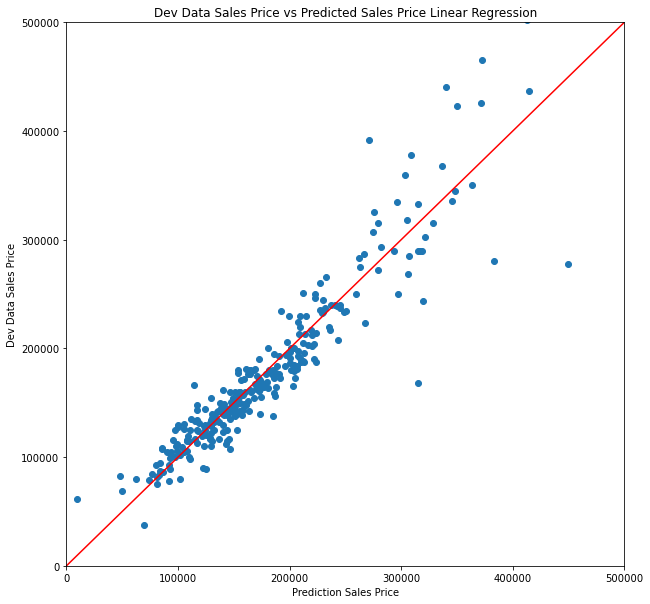

In [142]:
# run the scatter plot for the dev data
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot()
ax.scatter(pred_labels,y_dev)
ax.set_title('Dev Data Sales Price vs Predicted Sales Price Linear Regression')
ax.set_ylabel("Dev Data Sales Price")
ax.set_xlabel("Prediction Sales Price")
ax.set_ylim(0,500000)
ax.set_xlim(0,500000)
ax.plot(np.linspace(0,500000,5),np.linspace(0,500000,5), '-r')
plt.show()

Note that on the plot for the development data vs the predicted labels the data shows a slight curvature. In addition, the R^2 score and accuracy are off by about a facotr of 10%. Based on the plot, it appears that the regression might be a good candidate to run a log-linear regression model.  

In [147]:
# run a log-linear model on data 

# assign train data
X_train = train_data_lr[features]
y_train = train_labels_lr
y_train_log = np.log(y_train)

# assign development data
X_dev = dev_data[features]
y_dev = dev_labels
y_dev_log = np.log(dev_labels)

# linear regression model
lr_log = LinearRegression(fit_intercept=True)

# fit model 
lr_log.fit(X_train, y_train_log)

# predict accuracies and run exponential to return to Sales Price
pred_labels_log = lr_log.predict(X_dev) 
pred_labels_exp = np.exp(pred_labels_log)

# Find R2 score
print("R^2:",lr_log.score(X_train,y_train_log))   
print("Accuracy:",lr_log.score(X_dev,y_dev_log)) 
print("Root Mean Squared Error:", mean_squared_error(y_dev, pred_labels_exp, squared=False))
print("Mean Squared Log Error:", mean_squared_log_error(y_dev,pred_labels_exp))



R^2: 0.9521564582552635
Accuracy: 0.9229210144991148
Root Mean Squared Error: 22397.57781294882
Mean Squared Log Error: 0.011812633278396033


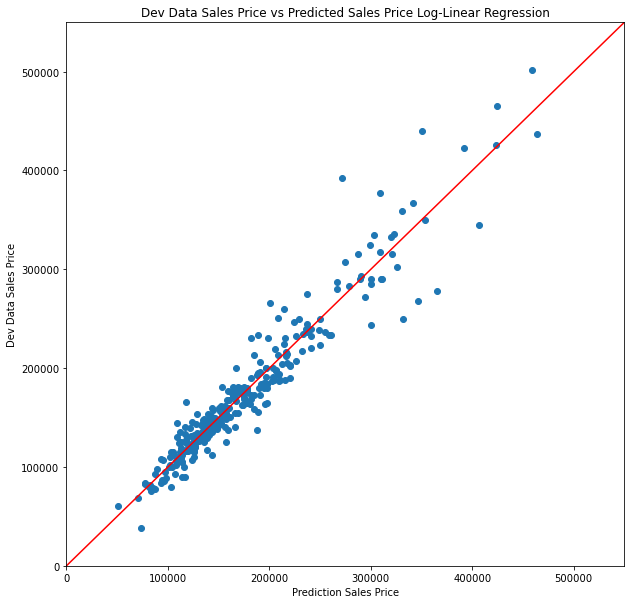

In [149]:
# run the scatter plot for the dev data
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot()
ax.scatter(pred_labels_exp,y_dev)
ax.set_title('Dev Data Sales Price vs Predicted Sales Price Log-Linear Regression')
ax.set_ylabel("Dev Data Sales Price")
ax.set_xlabel("Prediction Sales Price")
ax.set_ylim(0,550000)
ax.set_xlim(0,550000)
ax.plot(np.linspace(0,550000,5),np.linspace(0,550000,5), '-r')
plt.show()

The final linear regression model is shown above. The model uses features that are correlated with Sales Price above a 0.045 correlation. A few features are removed to reduce multicollinearity. In addition, it was determined that a log-linear model was suitable for this price prediction. Based on the results the R^2 score and accuracy are fairly close, which suggests that there is not signiificant overfitting. The MSLE of 0.012 (result may vary each time the notebook is run) suggests that the linear regression model does fairly well in predicting the house price. Note that a lasso and ridge regression were also considered, but the results were fairly similar to the linear regression model. 

# Gradient Boosting

Next we looked into boosting to determine which features are important specifically gradient boosting to determine sales price. Gradient boosting uses the loss function to determine the model's coefficients.

In [31]:
def sns_plot(dev_labels, prediction_max, dummy):
    '''
    This function takes in dev labels and predictions and the dummy name and returns a scatterplot with colorcoded dummy variables
    '''
    lst = []
    for i in train_data.columns:
        if (i.find(dummy) != -1): 
            lst.append(i)
    column = dev_data[lst]
    
    # make dummy back into a single column
    dummy_series = column.idxmax(axis=1)
    dummy_df = pd.DataFrame({dummy:dummy_series.tolist()})
    # convert to dataframe to plot with seaborn scatter plot
    pred_df = pd.DataFrame({
    'dev': dev_labels.tolist(),
    'predict': prediction_max.tolist()}).join(dummy_df)
    fig = plt.figure(figsize=(20, 10))
    ax = sns.scatterplot(x='dev', y='predict', hue=dummy,
                     data=pred_df, s=80)
    ax.set_title(dummy)
    ax.set_ylabel("Prediction")
    ax.set_xlabel("Actual")
    ax.set_ylim(0,500000)
    ax.set_xlim(0,500000)
    ax.plot(np.linspace(0,500000,5),np.linspace(0,500000,5), '-r')
    plt.show()

In [32]:
def correlation(dev_labels, prediction_max):
    '''
    Creates a correlation line and plots the dev labels over predictions. A perfectly determined point should fall right on the line
    '''
    fig = plt.figure(figsize=(20, 10))
    ax = fig.add_subplot(111)
    ax.scatter(dev_labels,prediction_max, alpha=0.2)
    ax.set_ylabel("Prediction")
    ax.set_xlabel("Actual")
    ax.set_ylim(0,500000)
    ax.set_xlim(0,500000)
    ax.plot(np.linspace(0,500000,5),np.linspace(0,500000,5), '-r')
    plt.show()

In [33]:
def gradboostregressor(variables, covariables):
    '''
    Gradient boosting function that takes specified feature
        Variables = features that are used for modeling
        Covariables = features that are color-coded in a plot
    '''
    train_data_grad = train_data[variables]
    dev_data_grad = dev_data[variables]
    
    gradbst = ensemble.GradientBoostingRegressor(min_samples_split=2,
                                            loss='ls')
    gradbst_param = dict(n_estimators=[int(x) for x in range(1,50, 5)],
                         max_depth=[int(x) for x in range(1,50, 5)],
                         learning_rate= np.linspace(0.01,1,11))
    # perform a Randomized Search to widen the range and perform a quicker search than grid search
    clf = RandomizedSearchCV(gradbst, gradbst_param, random_state=0, scoring='neg_mean_squared_log_error')
    search = clf.fit(train_data_grad, train_labels)
    best_param = search.best_params_
    print("Best Params:",search.best_params_)
    
    # get the best model
    gradbst_max = ensemble.GradientBoostingRegressor(n_estimators = best_param["n_estimators"], max_depth = best_param['max_depth'],
                                                     min_samples_split=2, learning_rate=best_param["learning_rate"],
                                                     loss='ls')
    gradbst_max.fit(train_data_grad, train_labels)
    prediction_max = gradbst_max.predict(dev_data_grad)
    gradbst_max.score(dev_data_grad,dev_labels)
    
    # get the feature importance
    feat_imp = pd.DataFrame()
    feat_imp["variable"] = variables
    feat_imp["feat_importance"] = gradbst_max.feature_importances_
    feat_imp = feat_imp.sort_values(by=["feat_importance"], ascending=False).reset_index()
    
    # horizontal bar chart showing feature importance
    plt.rcdefaults()
    fig, ax = plt.subplots(figsize=(30,30))
    ax.barh(feat_imp["variable"], feat_imp["feat_importance"],align='center')
    ax.invert_yaxis()  # labels read top-to-bottom
    plt.show()

    # print predicted values from test features
    #     for i in gradbst_max.predict(test_data[variables]):
    #         print(i)
    
    # showing correlation 
    correlation(dev_labels, prediction_max)
    
    # show plots with colors by dummy and check for high error 
    for i in covariables:
        sns_plot(dev_labels, prediction_max, i)

    print("R^2:",gradbst_max.score(train_data_grad,train_labels))    #Finding R^2
    print("Accuracy:",gradbst_max.score(dev_data_grad,dev_labels))    #Finding accuracy of dev data
    print("Root Mean Squared Error:", mean_squared_error(dev_labels, prediction_max, squared=False))
    print("Root Mean Squared Log Error:", mean_squared_log_error(dev_labels, prediction_max))

First I tried the variables from our EDA and determine the features with the most importance. 

Best Params: {'n_estimators': 21, 'max_depth': 6, 'learning_rate': 0.30700000000000005}


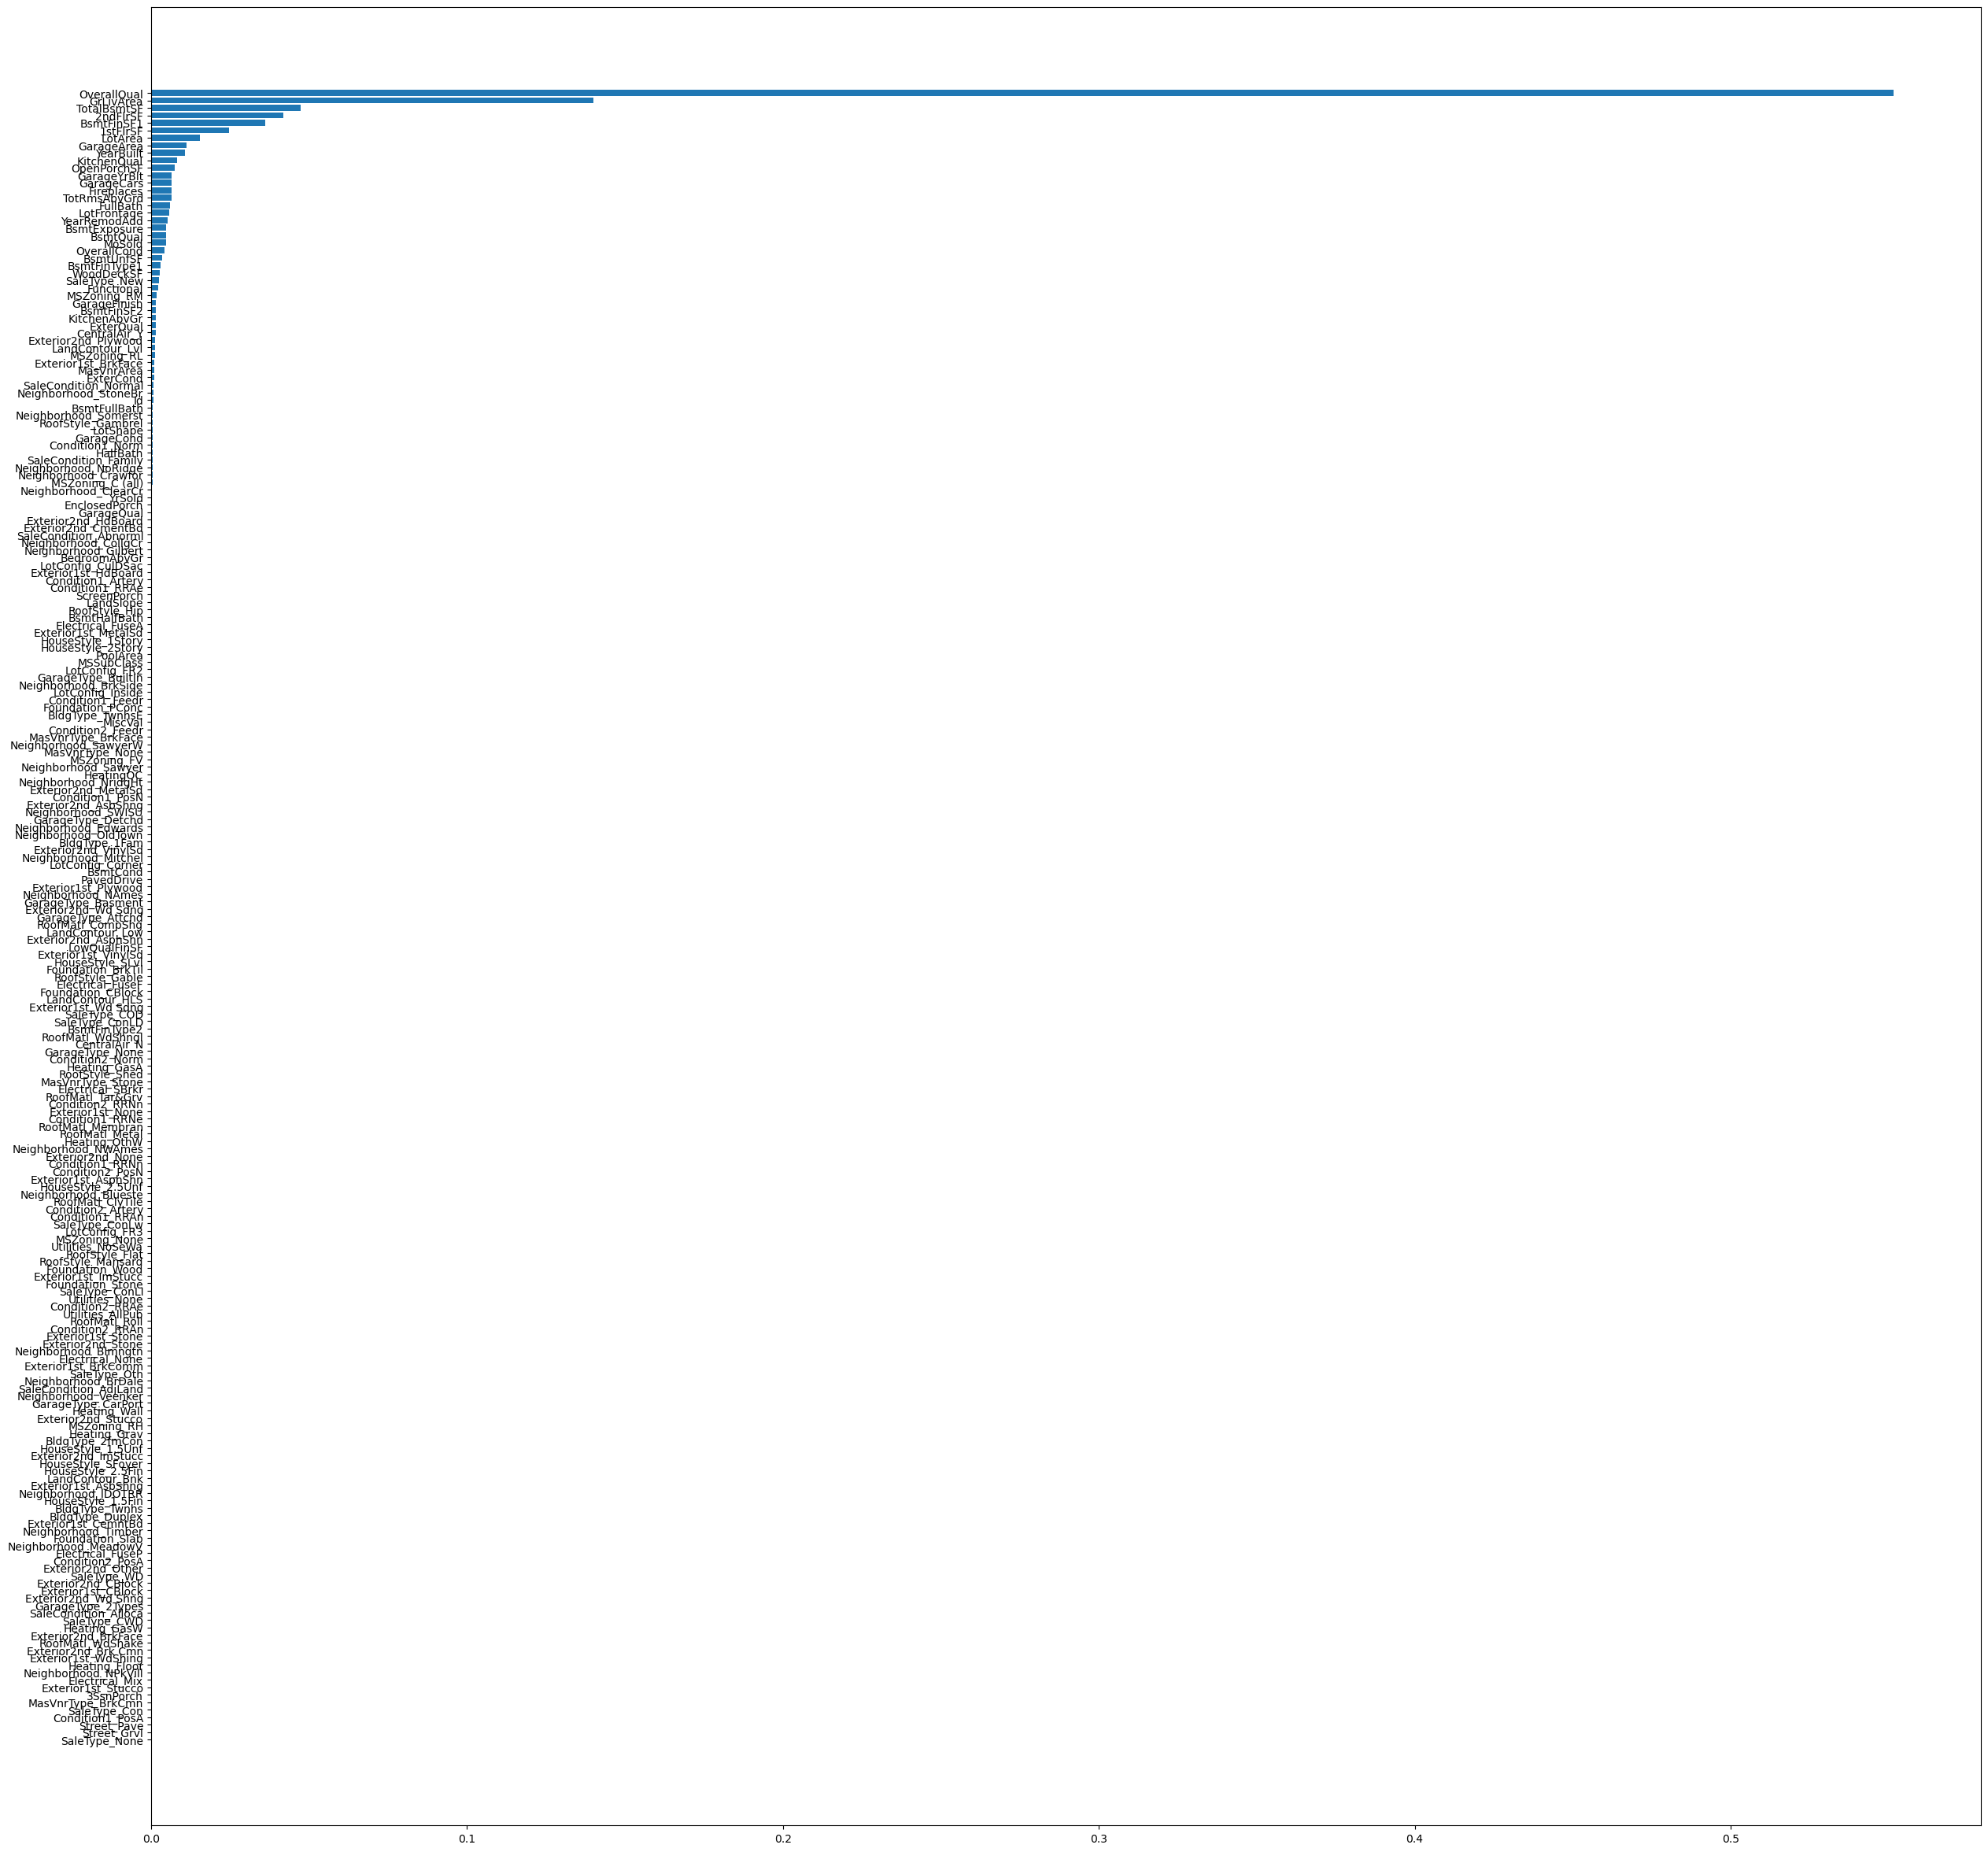

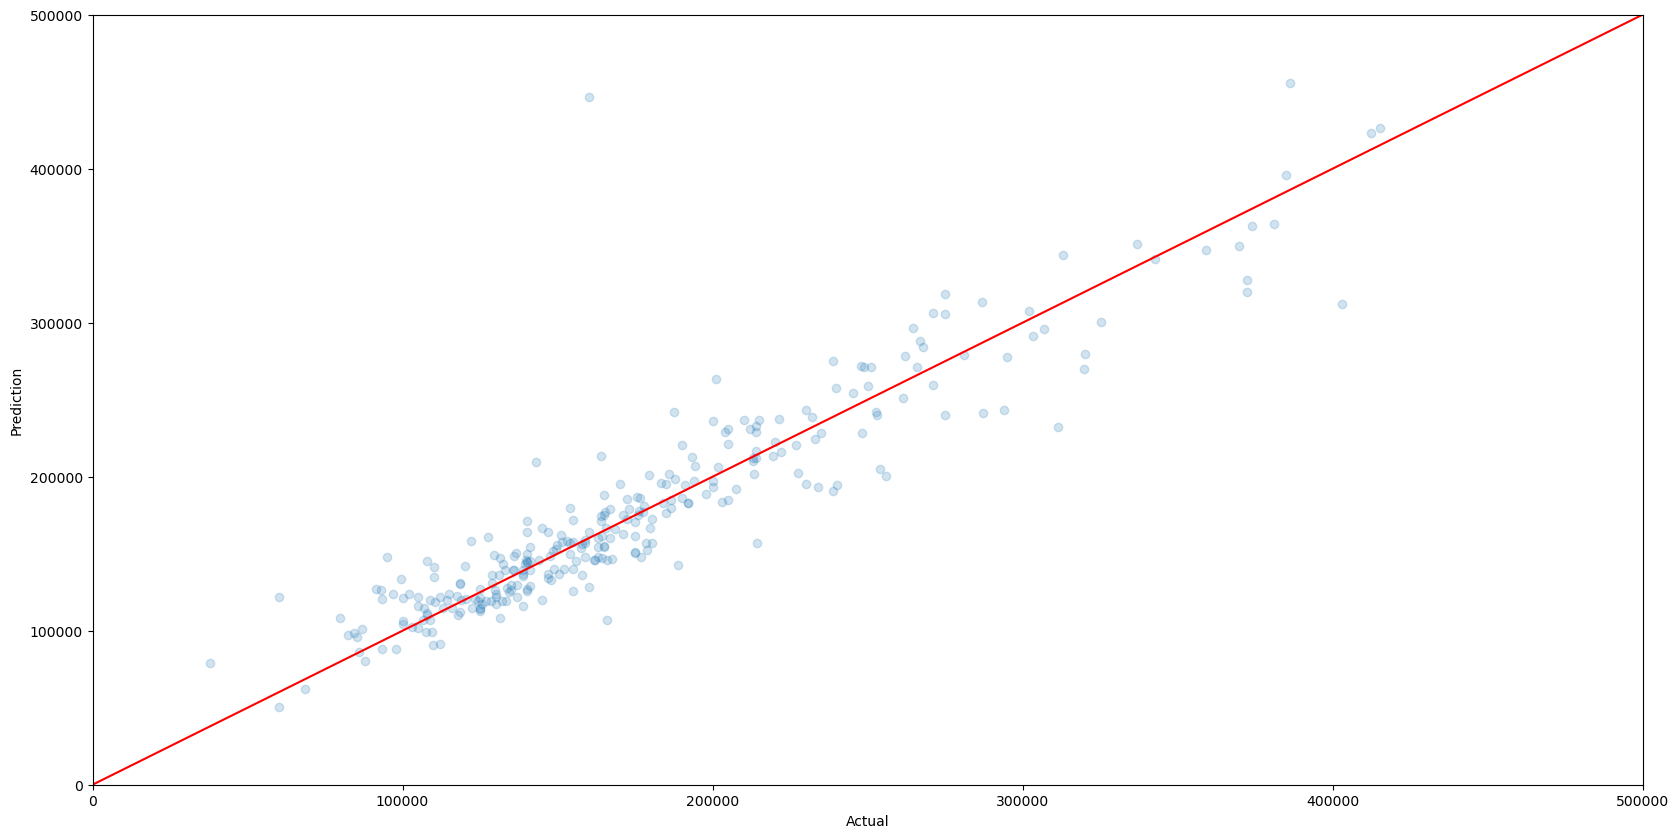

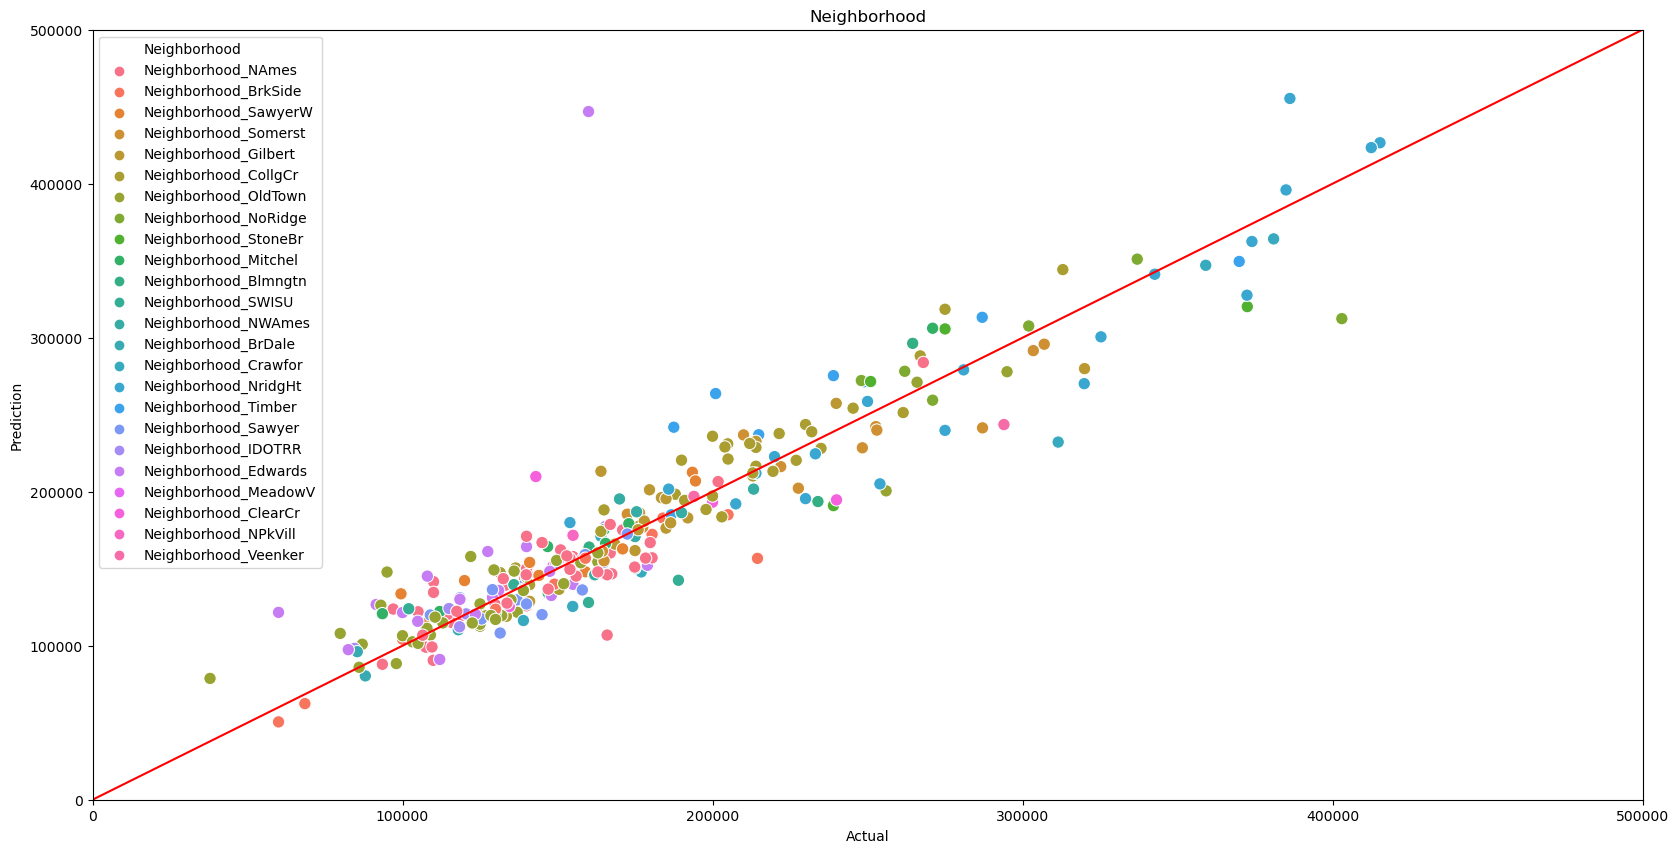

R^2: 0.9957780830310897
Accuracy: 0.8429026583554295
Root Mean Squared Error: 27632.748315711597
Root Mean Squared Log Error: 0.02155227183381442


In [34]:
gradboostregressor(sorted_correlations.index.tolist(), ['Neighborhood'])

Best Params: {'n_estimators': 21, 'max_depth': 6, 'learning_rate': 0.30700000000000005}


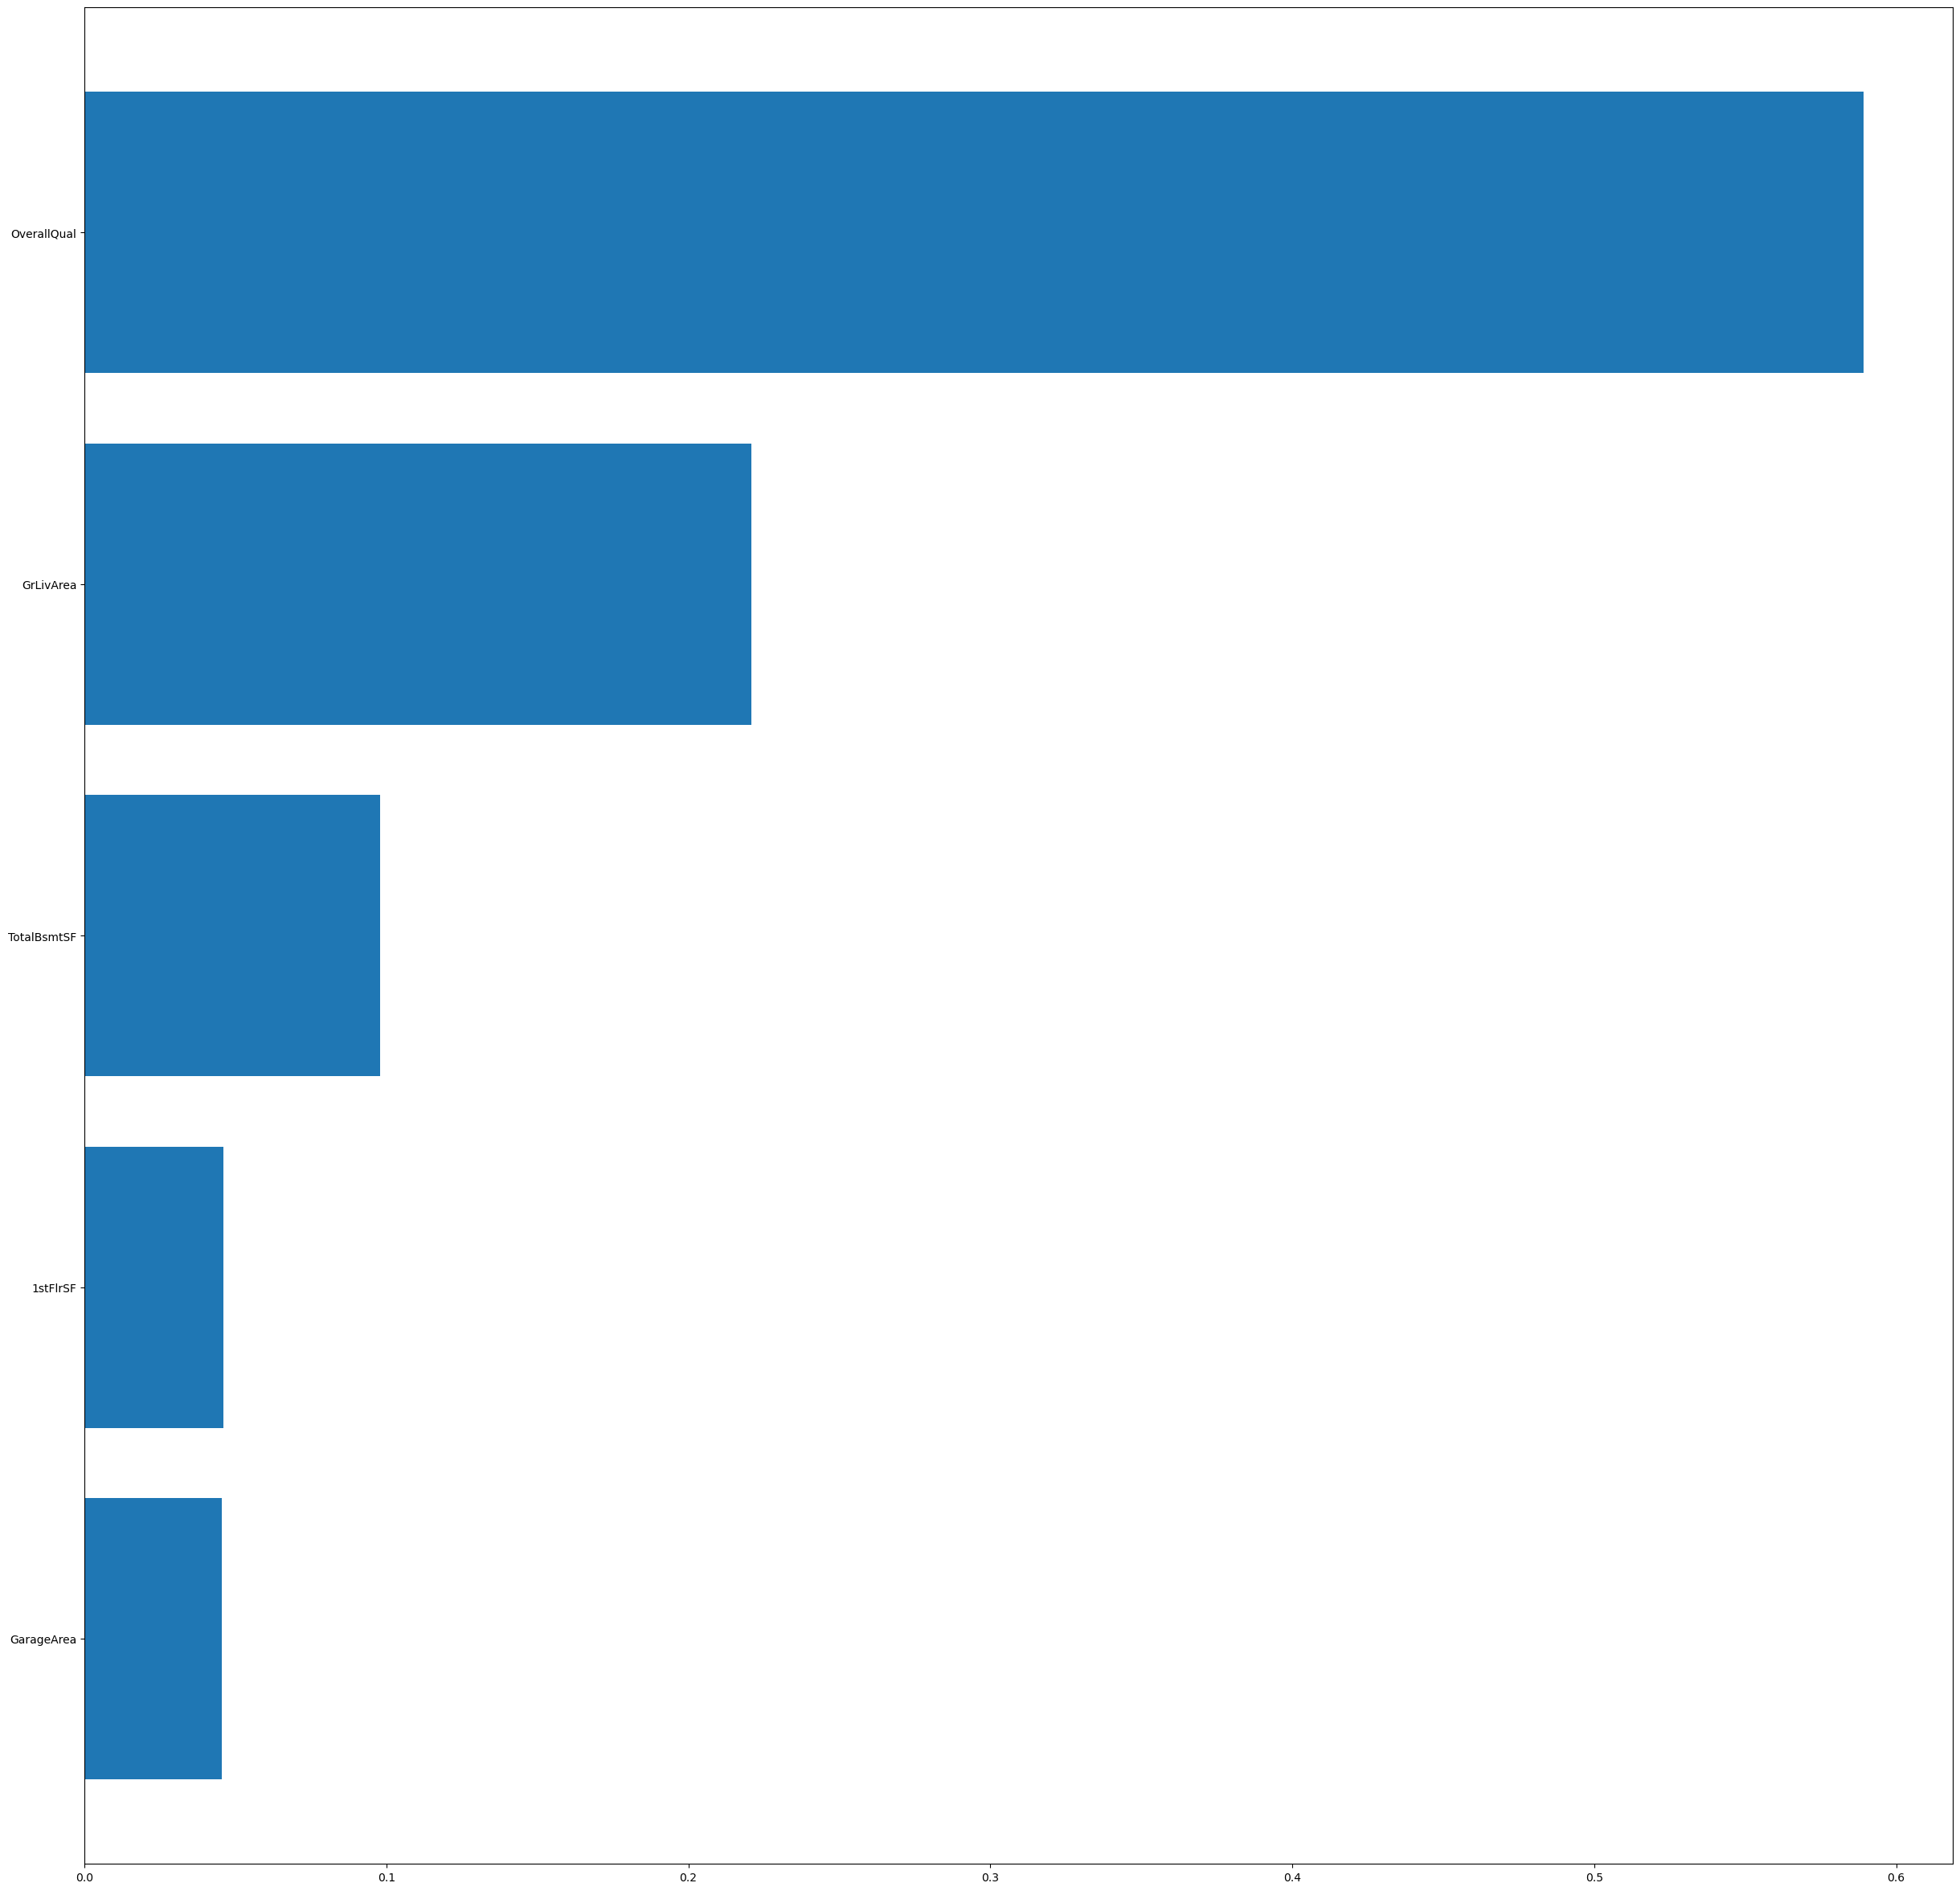

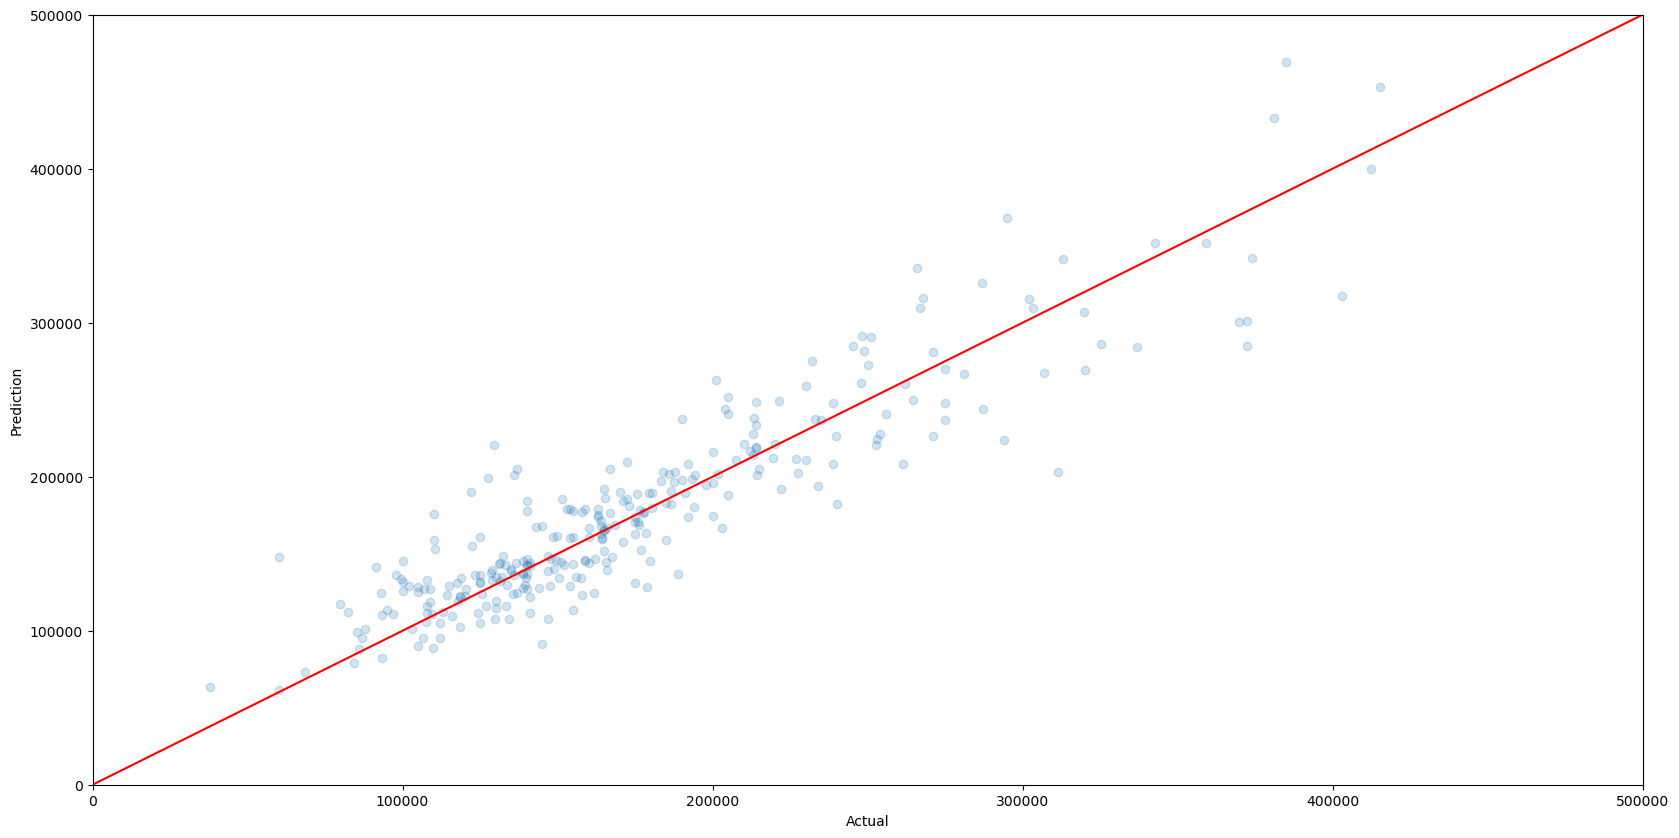

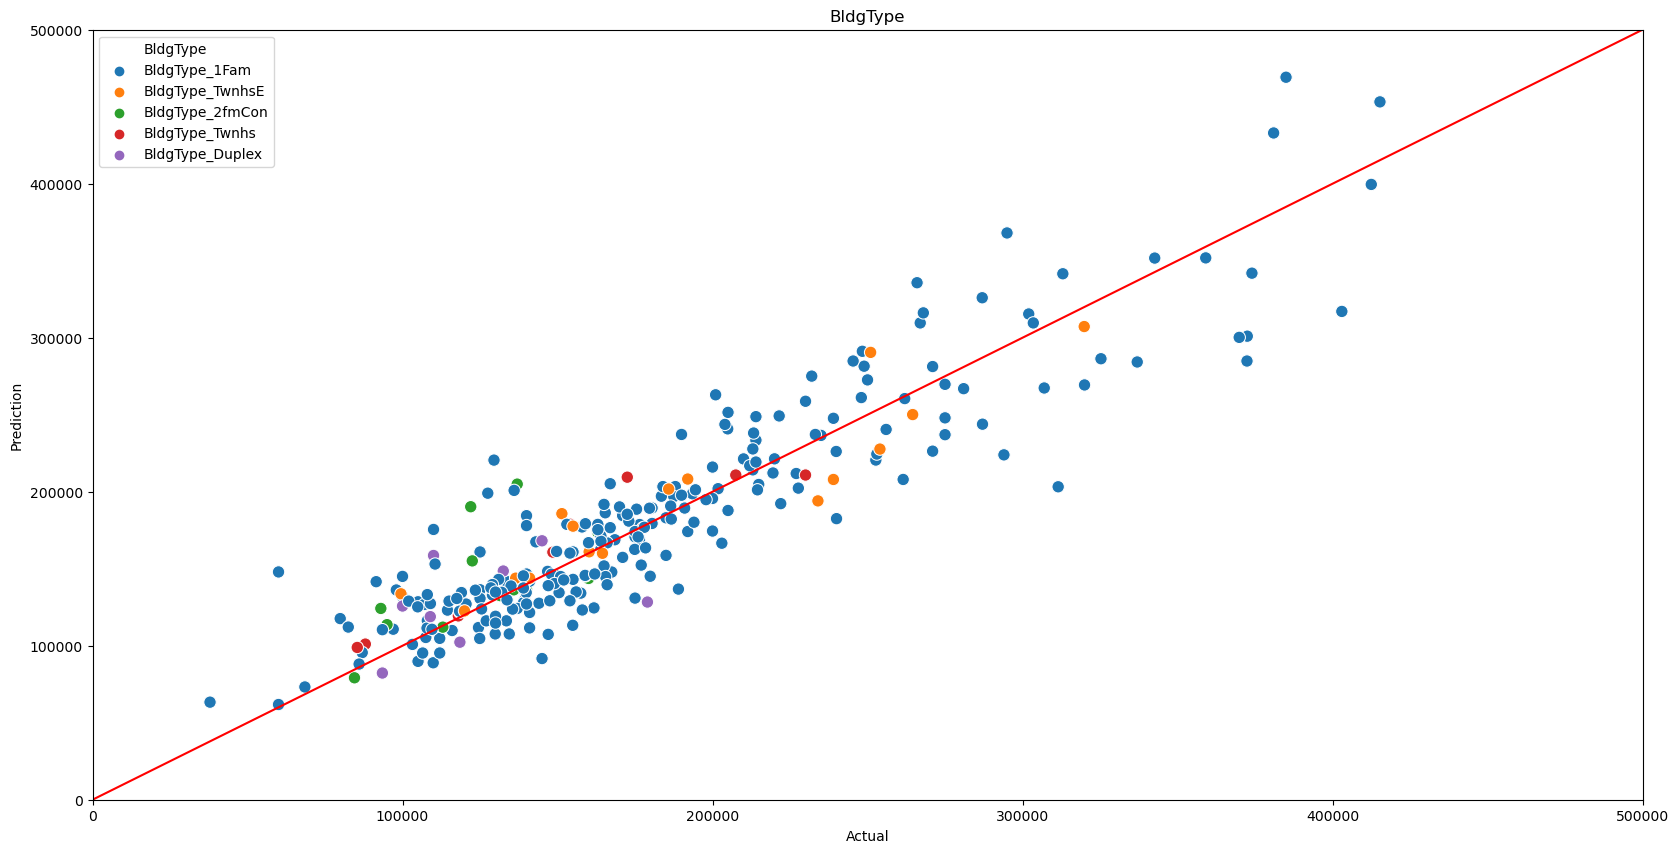

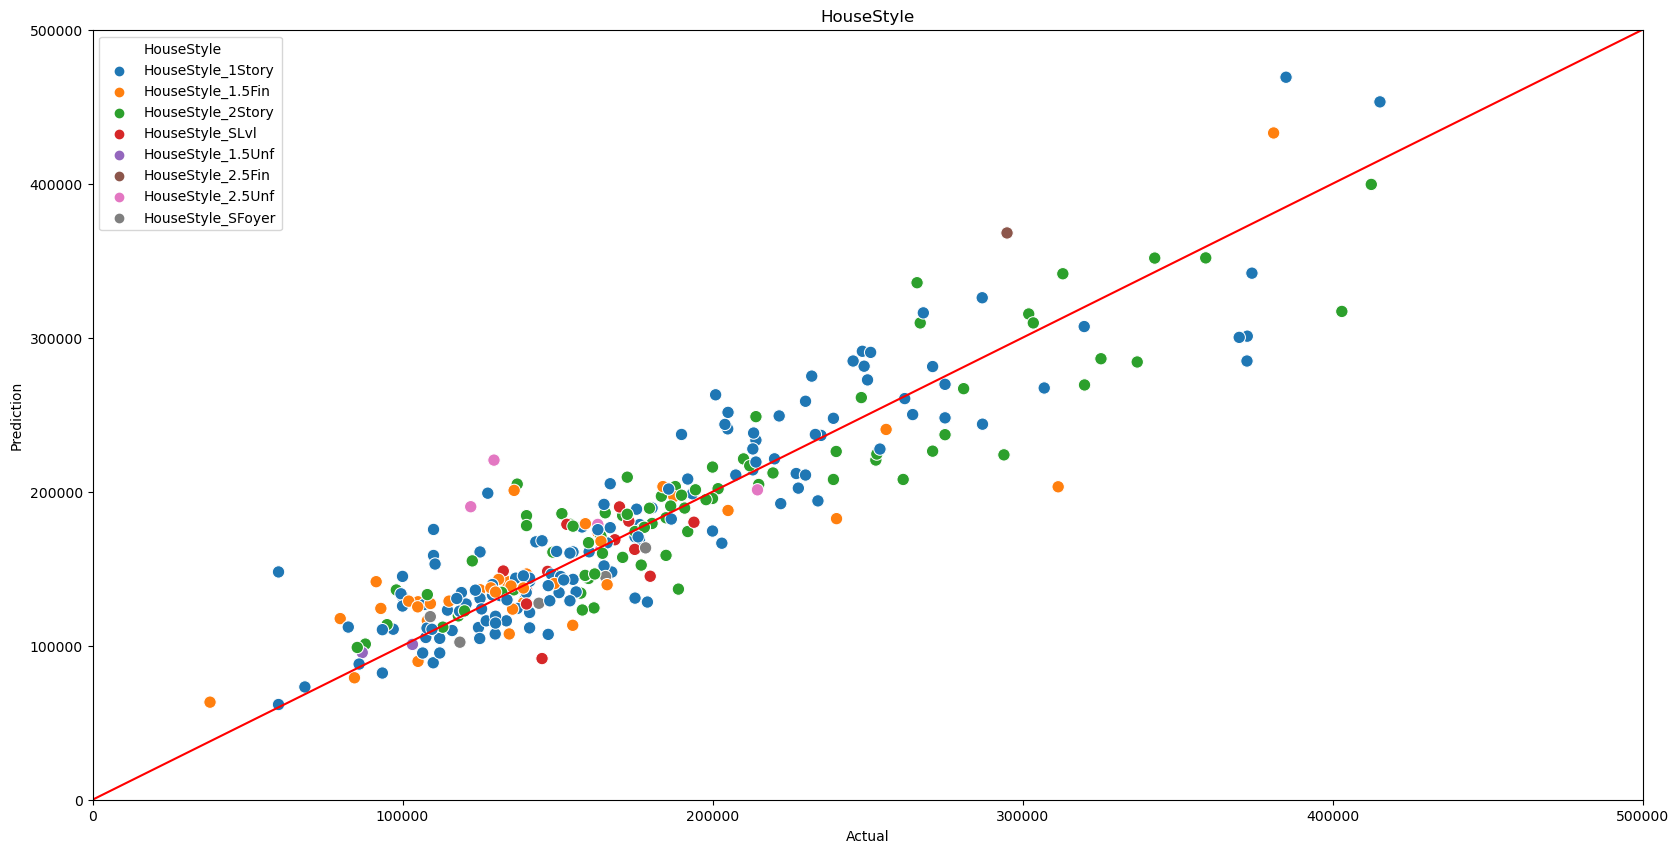

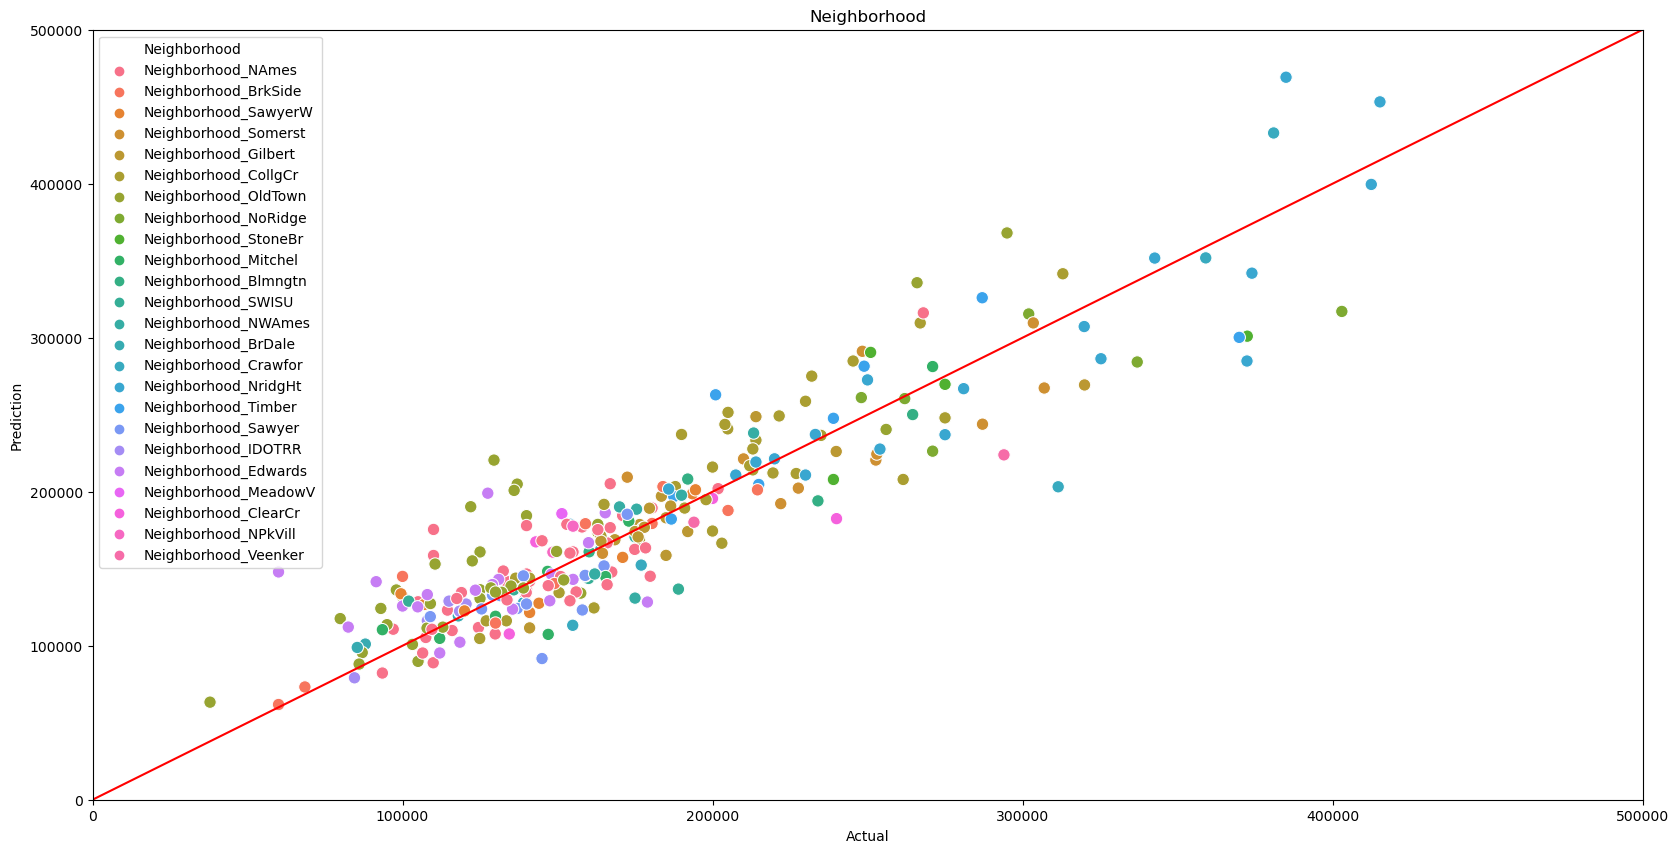

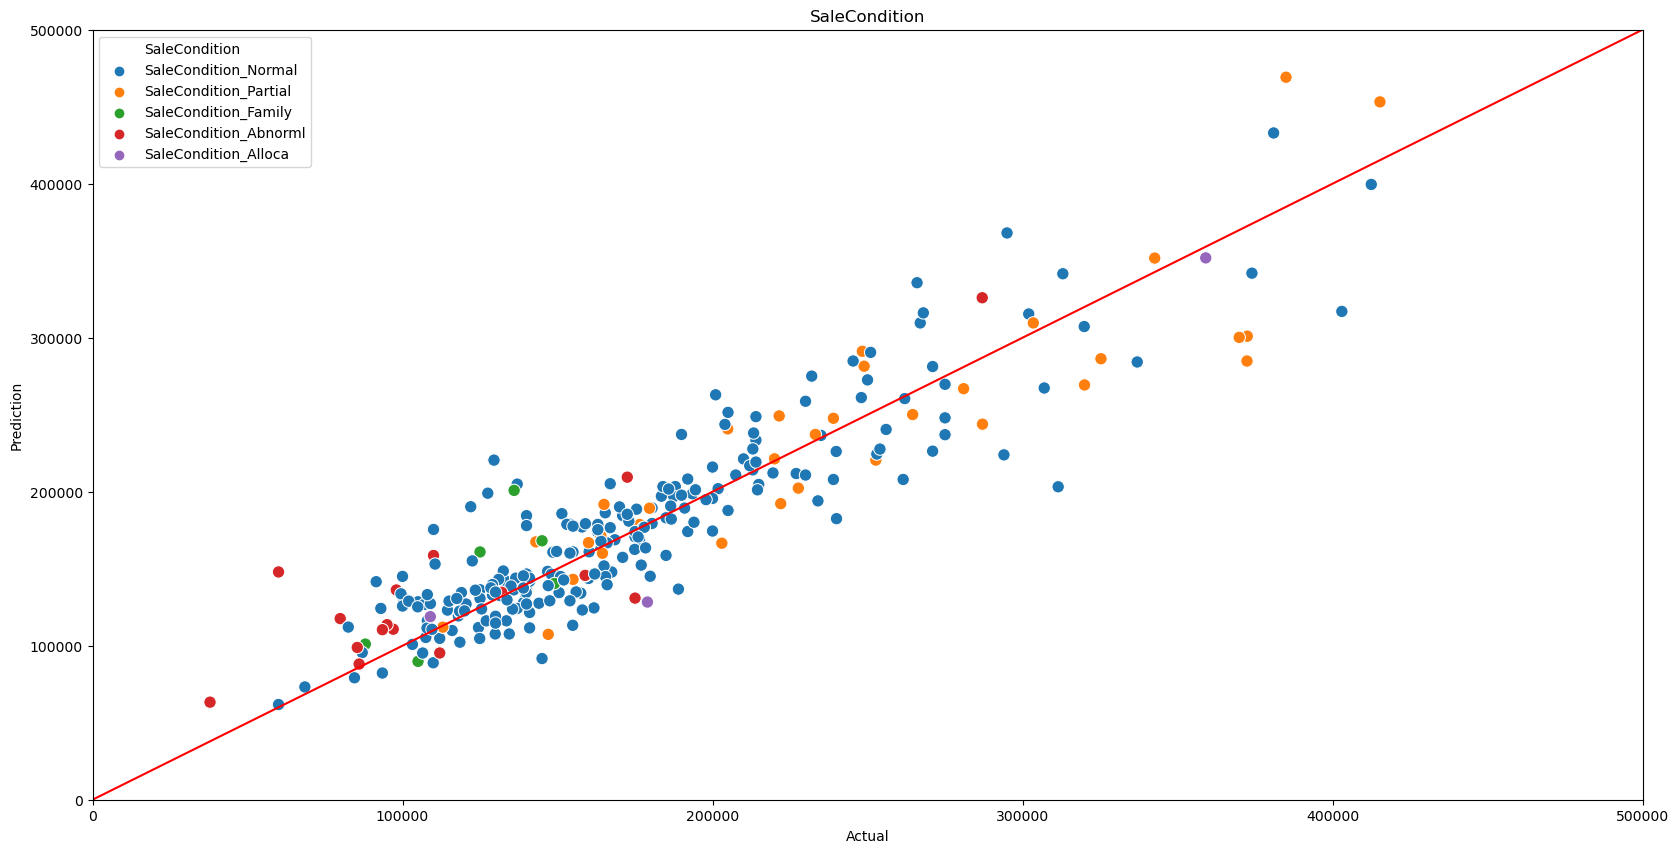

R^2: 0.9757795605551934
Accuracy: 0.8043837640732577
Root Mean Squared Error: 30834.869327514414
Root Mean Squared Log Error: 0.02818455969254344


In [35]:
gradboostregressor(['GrLivArea', 'TotalBsmtSF','GarageArea', 'OverallQual', '1stFlrSF'],
                  covariables=['BldgType','HouseStyle','Neighborhood','SaleCondition'])

When running all the variables, we get a lower root mean squared error, however my R^2 or accuracy of training data is nearly 100% which leads me to believe that it is overfitting. My second model only included the top 5 most important features. I graphed a couple different covariates based on color. The BldgType returned a lot of 1 Family homes so this model may be bias towards 1 family home type buildings. We see a good mix of House Styles throughout the model. Lastly, it seems many of the higher sale price ourliers have a sale condition of partial. We add this as a variable and check to see if the root mean squared log error improves.

Best Params: {'n_estimators': 21, 'max_depth': 6, 'learning_rate': 0.30700000000000005}


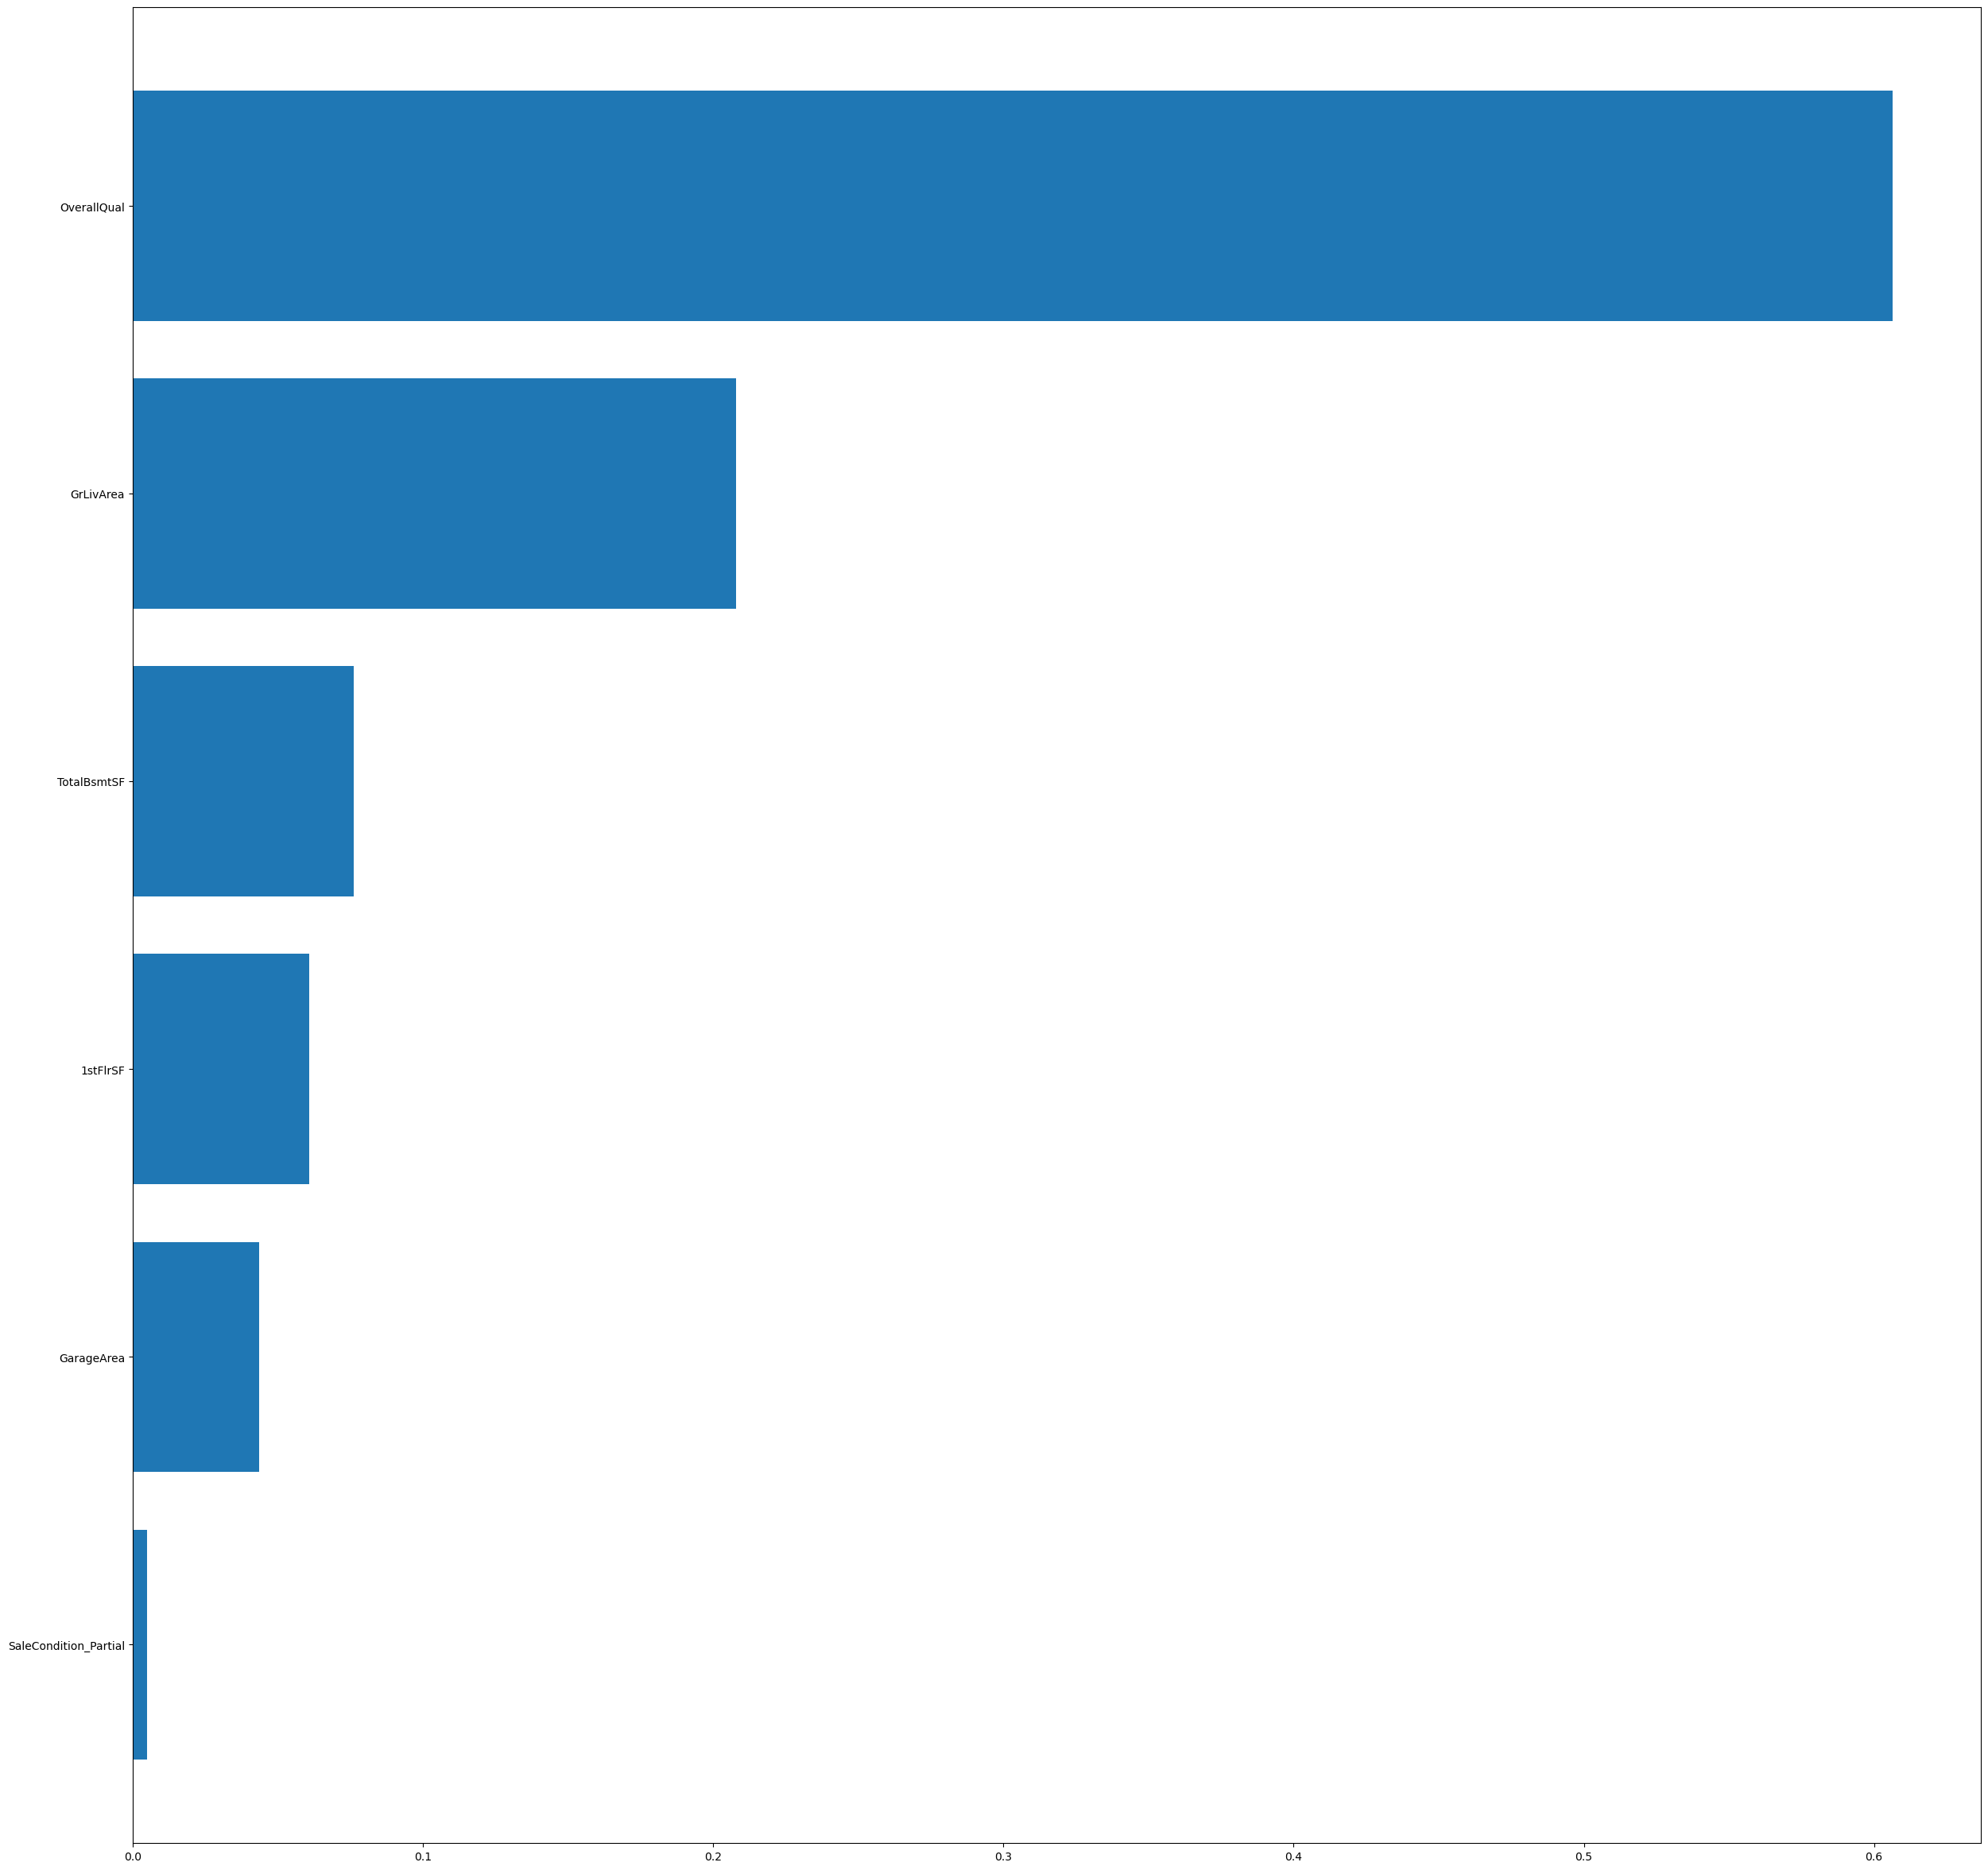

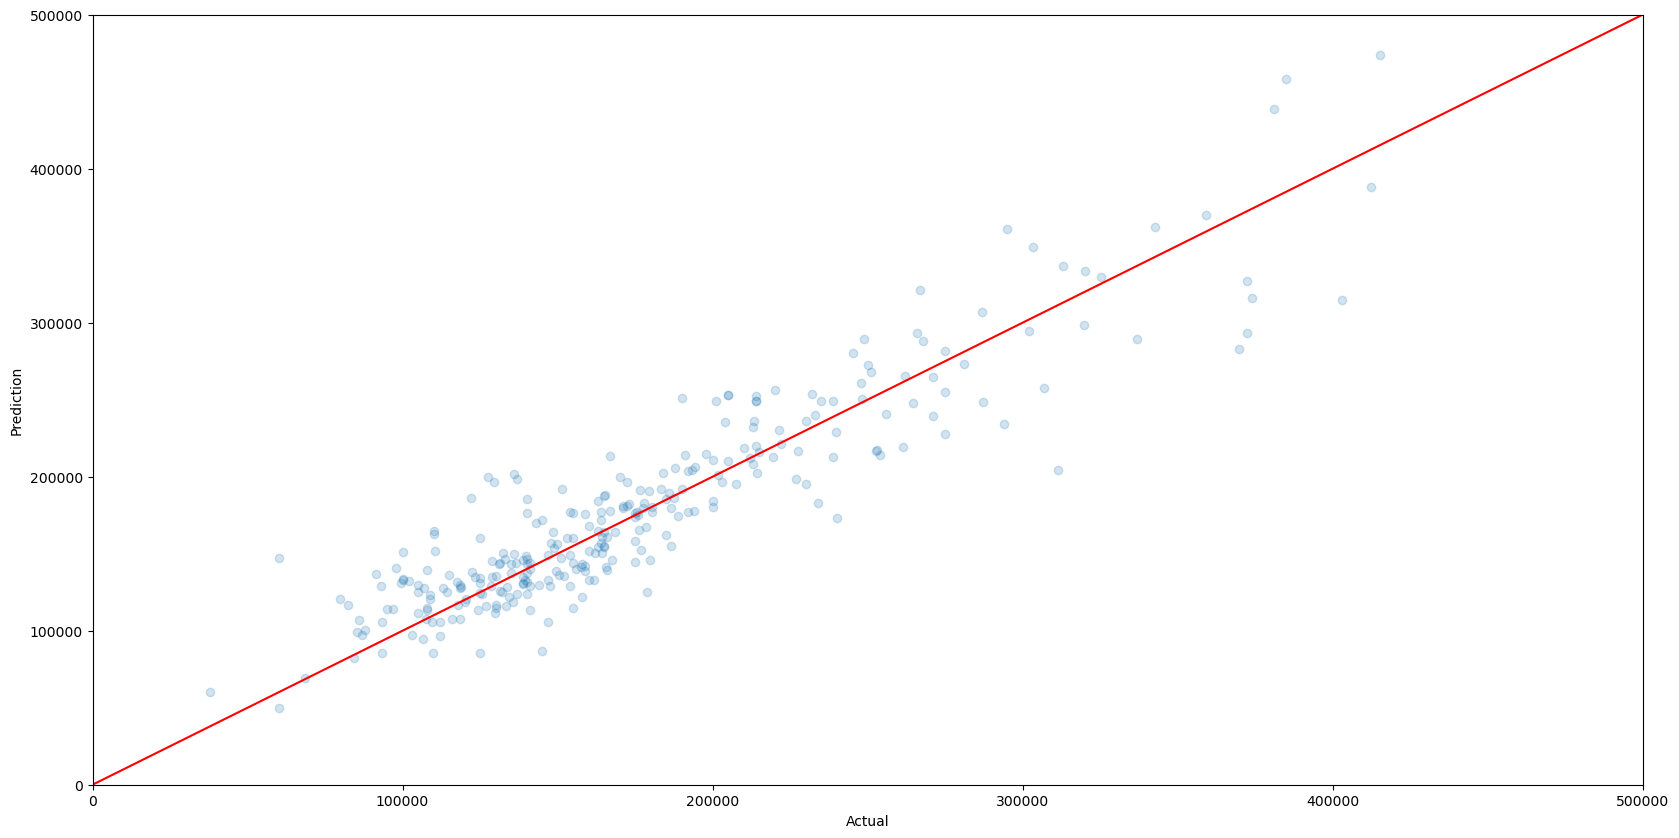

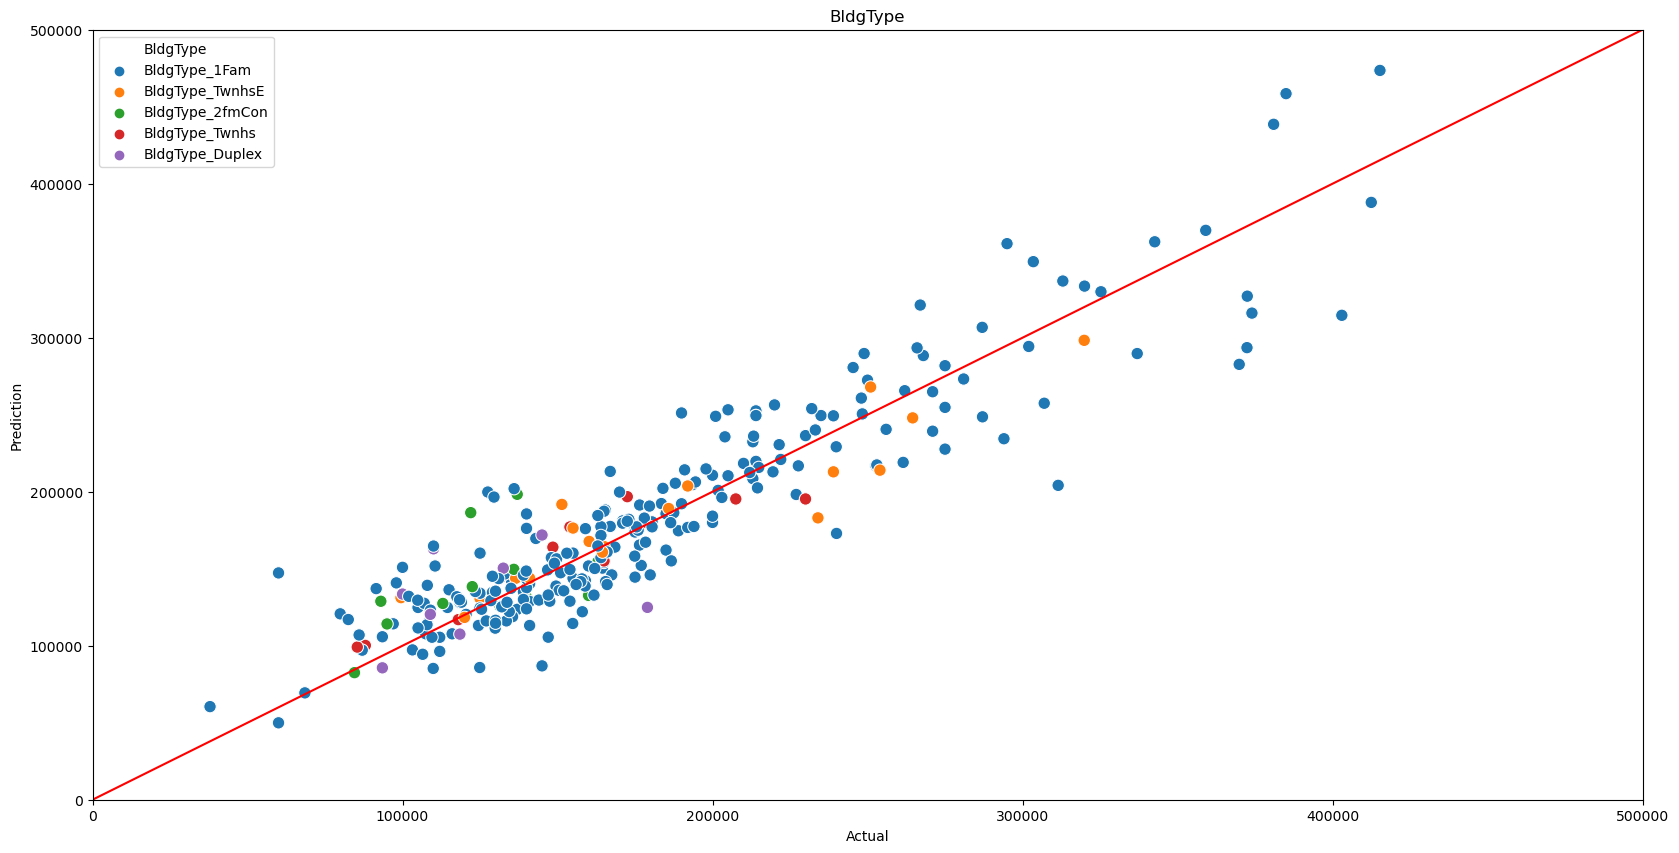

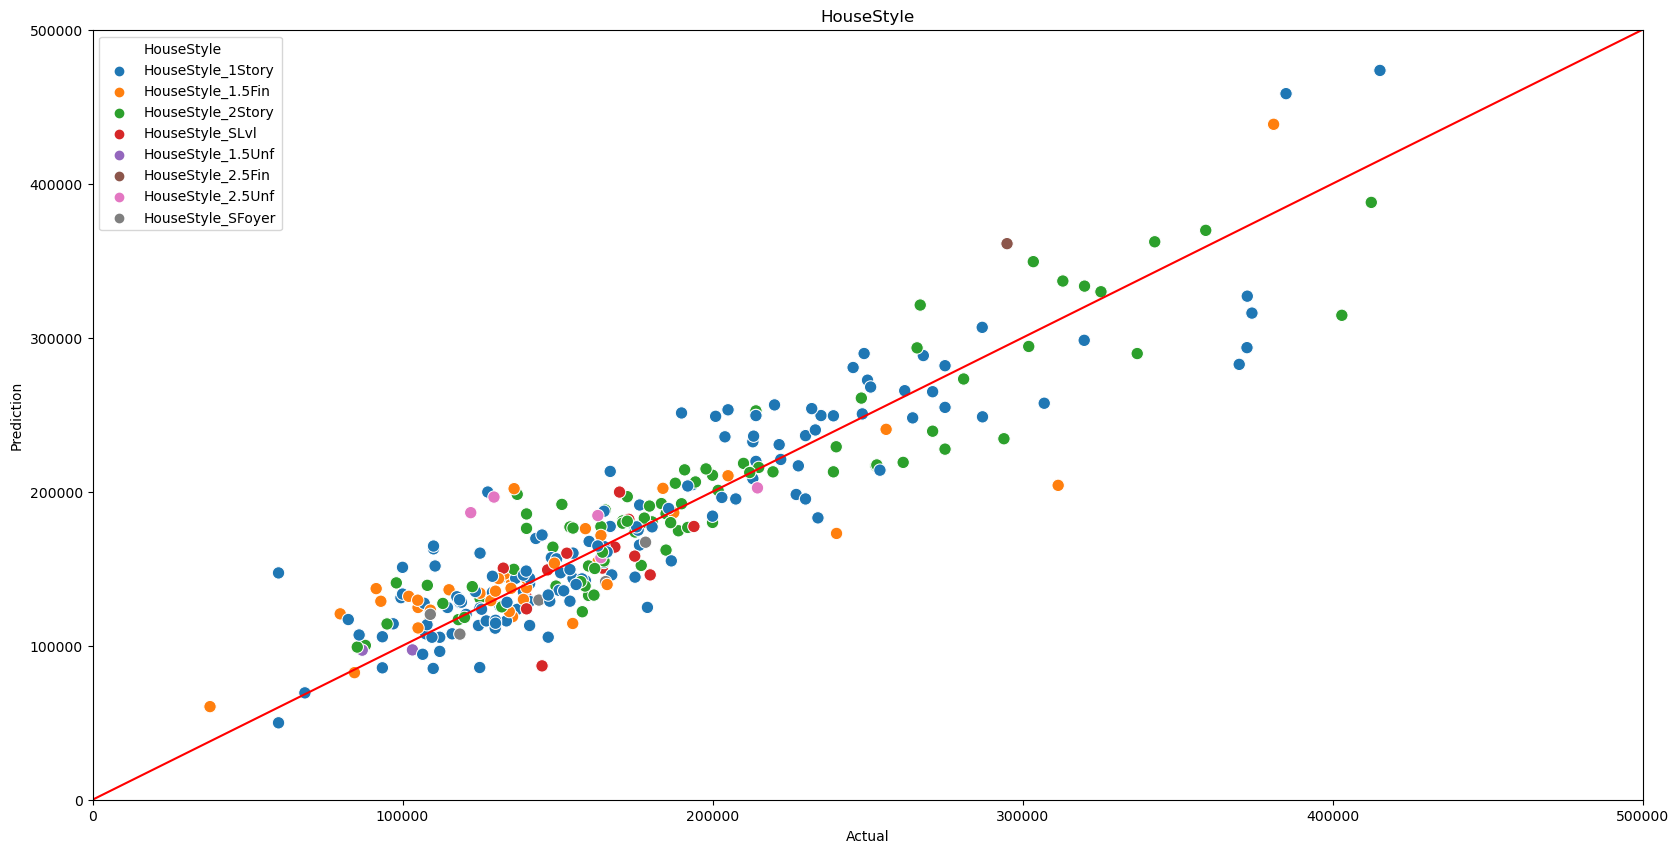

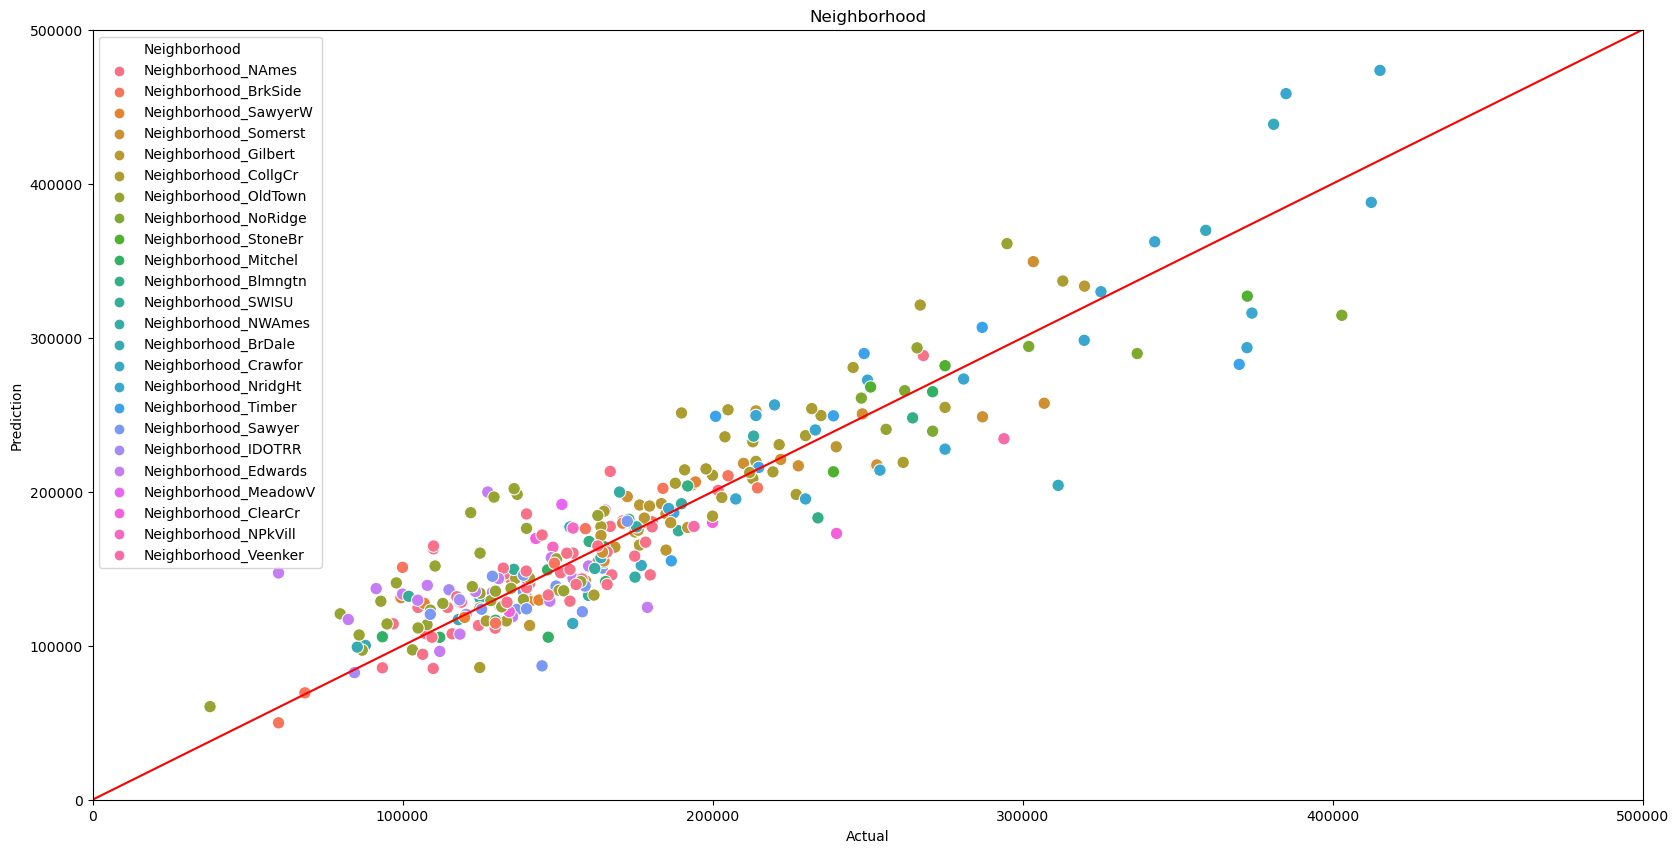

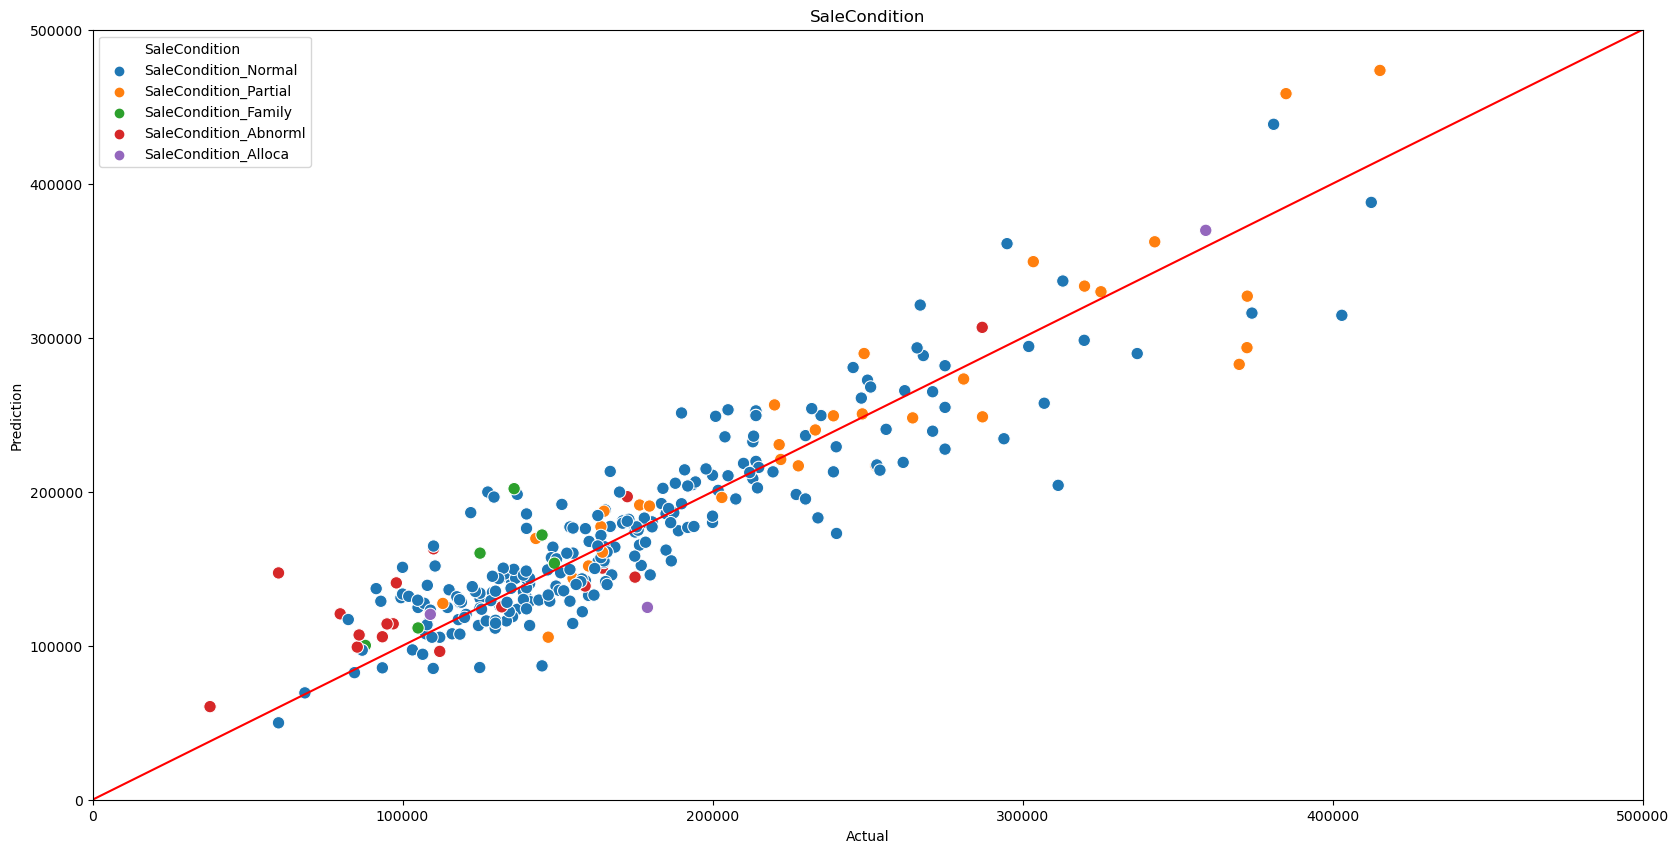

R^2: 0.9777262815228634
Accuracy: 0.8212501768851286
Root Mean Squared Error: 29475.587744982236
Root Mean Squared Log Error: 0.027766056291196096


In [36]:
gradboostregressor(['GrLivArea', 'TotalBsmtSF','GarageArea', 'OverallQual', '1stFlrSF','SaleCondition_Partial'],
                  covariables=['BldgType','HouseStyle','Neighborhood','SaleCondition'])

We do see a slight improvement of .001. 

# ADA Boosting

Next I will try an ADAboost regressor. The ADAboost will focus more weight on difficult to classify instances and less on those already handled well. New weak learners are added sequentially that focus their training on the more difficult patterns. I think gradient boosting will do better due to the loss function being more adaptive for housing prices.

In [37]:
def adaboostregressor(variables, covariables):
    '''
    ADA boosting function that takes specified feature
        Variables = features that are used for modeling
        Covariables = features that are color-coded in a plot
    '''
    train_data_ada = train_data[variables]
    dev_data_ada = dev_data[variables]
    adabst = ensemble.AdaBoostRegressor(random_state=0)
    # parameters to change for adaboost
    adabst_param = dict(n_estimators=[int(x) for x in range(1,100, 5)]
                        ,learning_rate= np.linspace(0.01,1,11))

    clf = RandomizedSearchCV(adabst, adabst_param, random_state=0, scoring='neg_mean_squared_log_error')
    search = clf.fit(train_data_ada, train_labels)
    best_param = search.best_params_
    print("Best Params:", search.best_params_)

    adabst_max = ensemble.AdaBoostRegressor(n_estimators = best_param["n_estimators"],learning_rate=best_param["learning_rate"]
                                            ,random_state=0)
    adabst_max.fit(train_data_ada, train_labels)
    prediction_max = adabst_max.predict(dev_data_ada)
    adabst_max.score(dev_data_ada,dev_labels)

    # get the feature importance
    feat_imp = pd.DataFrame()
    feat_imp["variable"] = variables
    feat_imp["feat_importance"] = adabst_max.feature_importances_
    feat_imp = feat_imp.sort_values(by=["feat_importance"], ascending=False).reset_index()
    
    # horizontal bar chart showing feature importance
    plt.rcdefaults()
    fig, ax = plt.subplots()
    ax.barh(feat_imp["variable"], feat_imp["feat_importance"],align='center')
    ax.invert_yaxis()  # labels read top-to-bottom
    plt.show()

    # showing correlation 
    correlation(dev_labels, prediction_max)
    for i in covariables:
        sns_plot(dev_labels, prediction_max, i)
    
    print("R^2:",adabst_max.score(train_data_ada,train_labels))    #Finding R^2
    print("Accuracy:",adabst_max.score(dev_data_ada,dev_labels))    #Finding accuracy of dev data
    print("Root Mean Squared Error:", mean_squared_error(dev_labels, prediction_max, squared=False))
    print("Root Mean Squared Log Error:", mean_squared_log_error(dev_labels, prediction_max))

Best Params: {'n_estimators': 56, 'learning_rate': 0.30700000000000005}


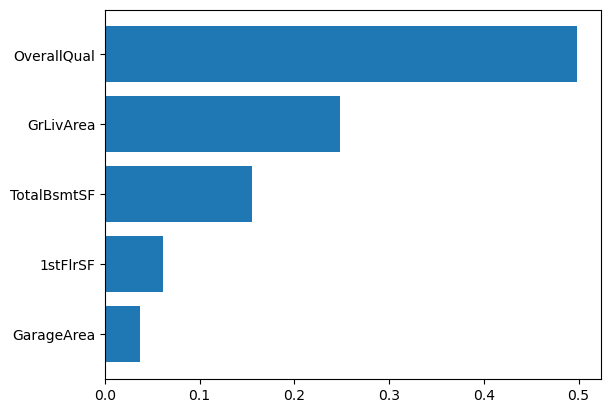

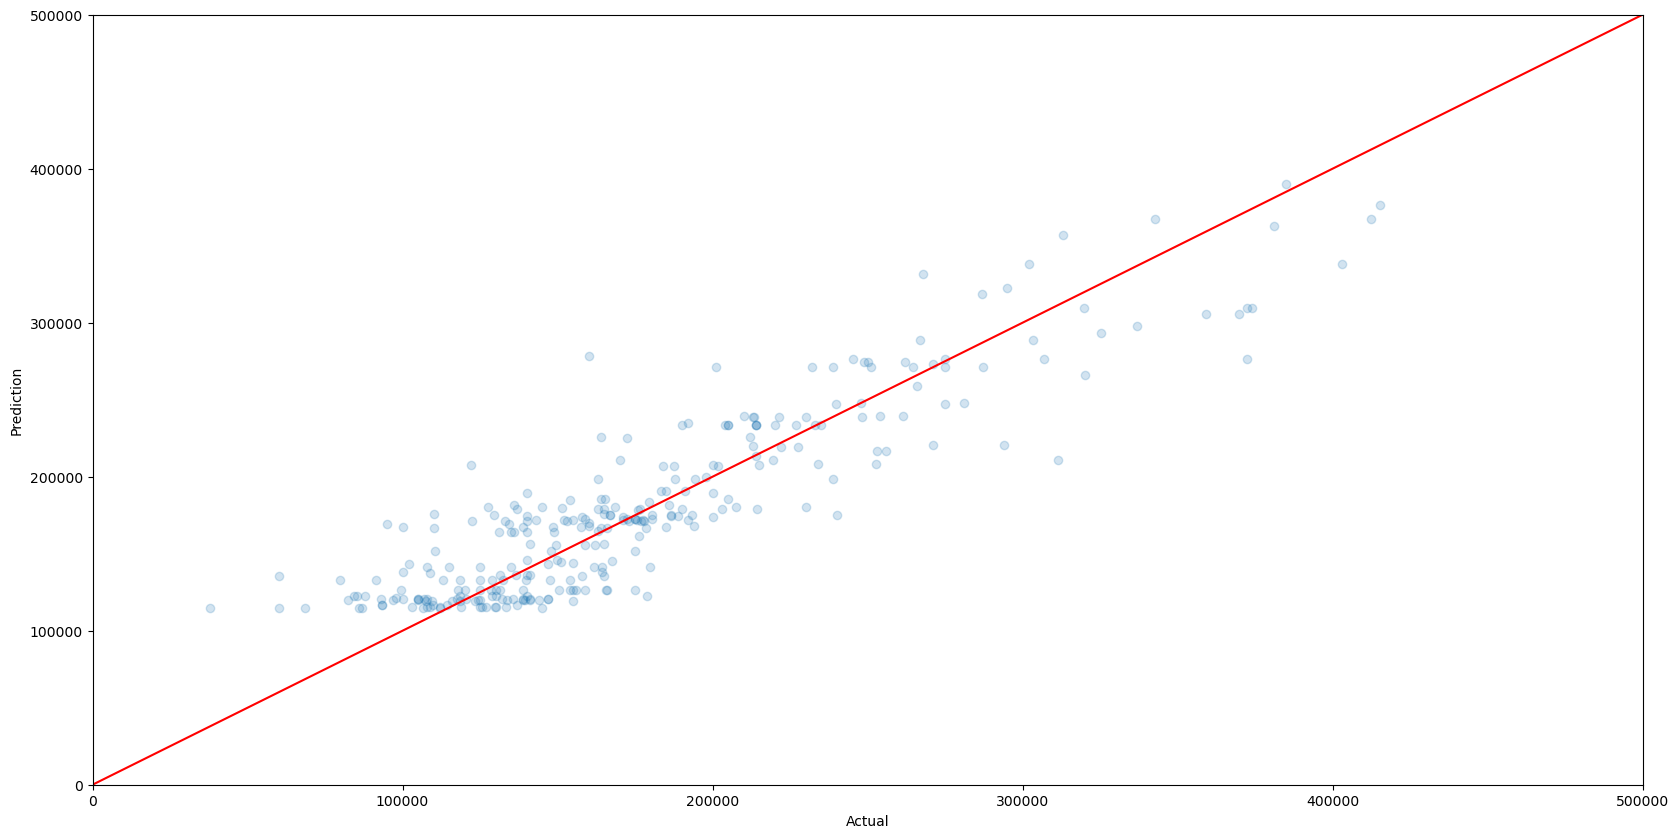

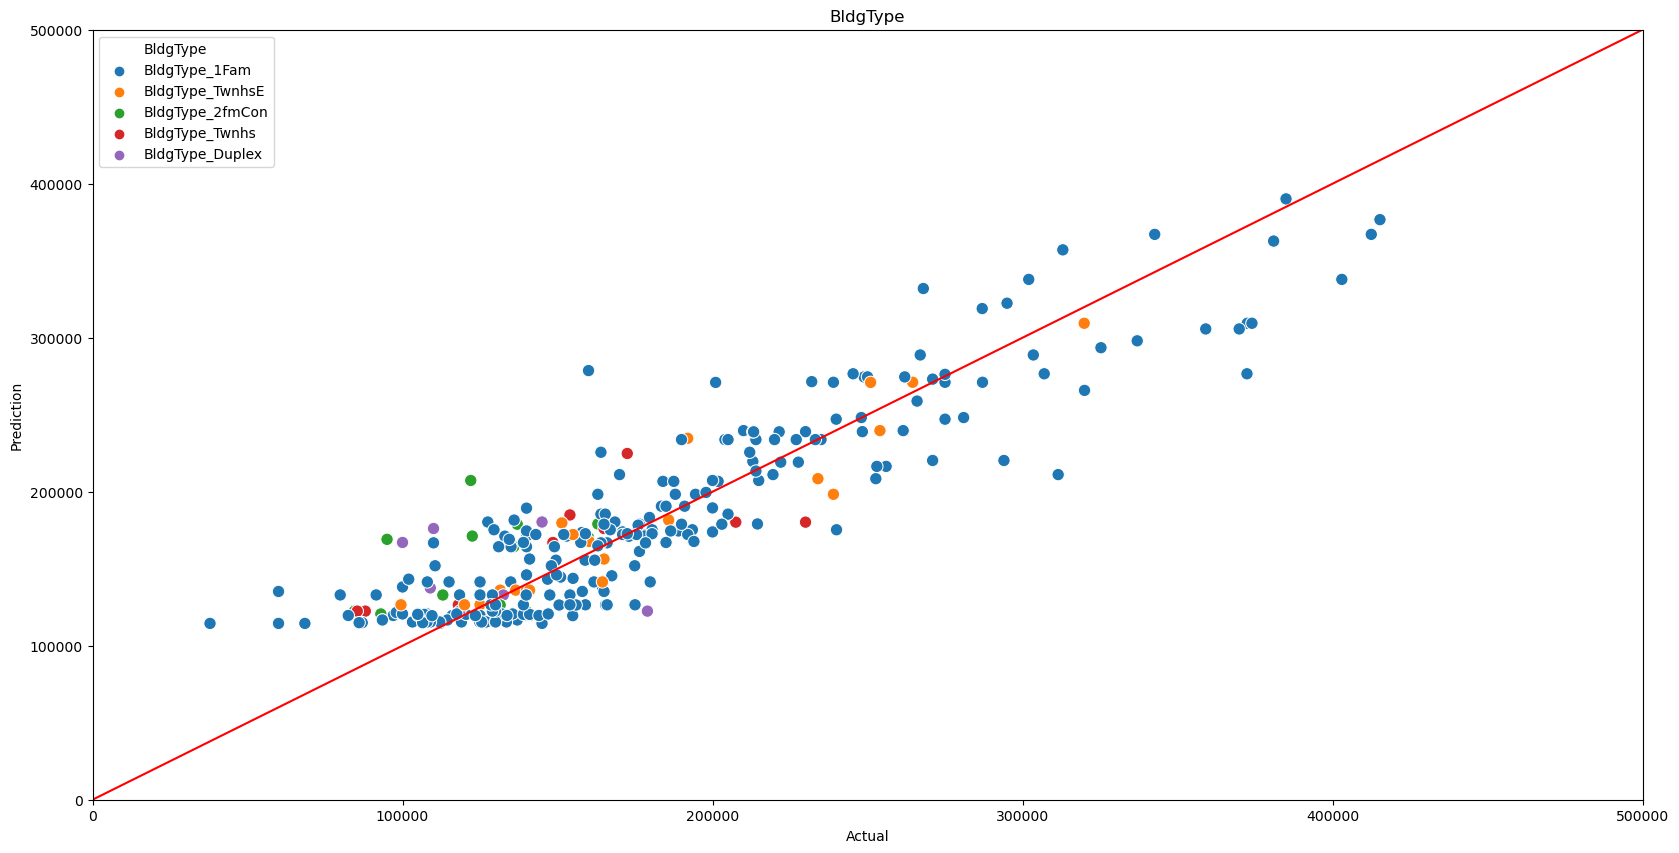

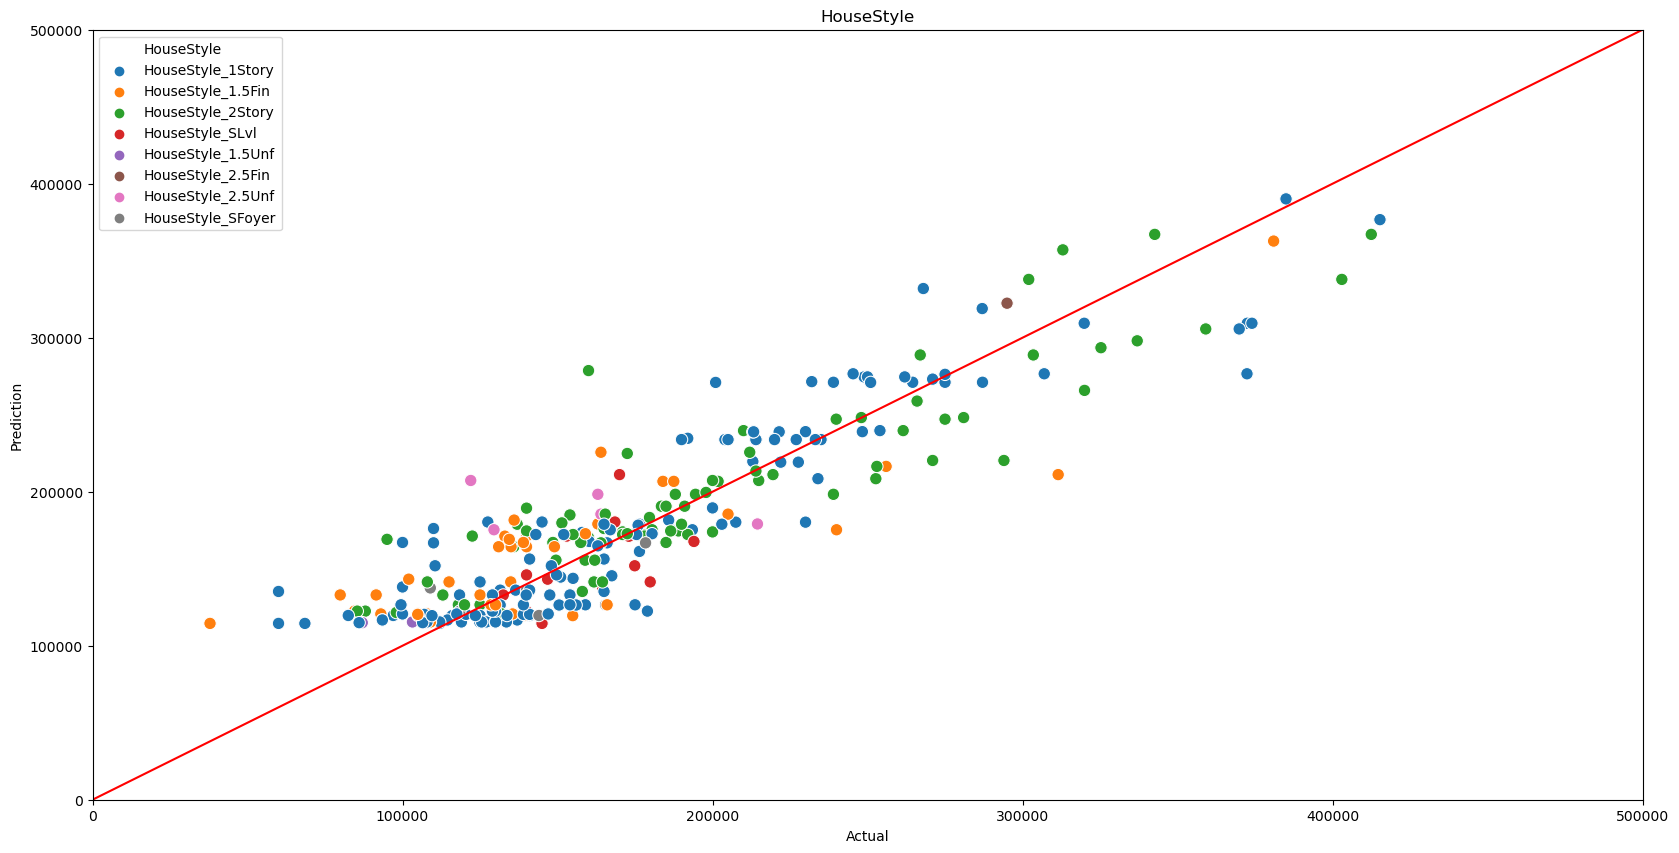

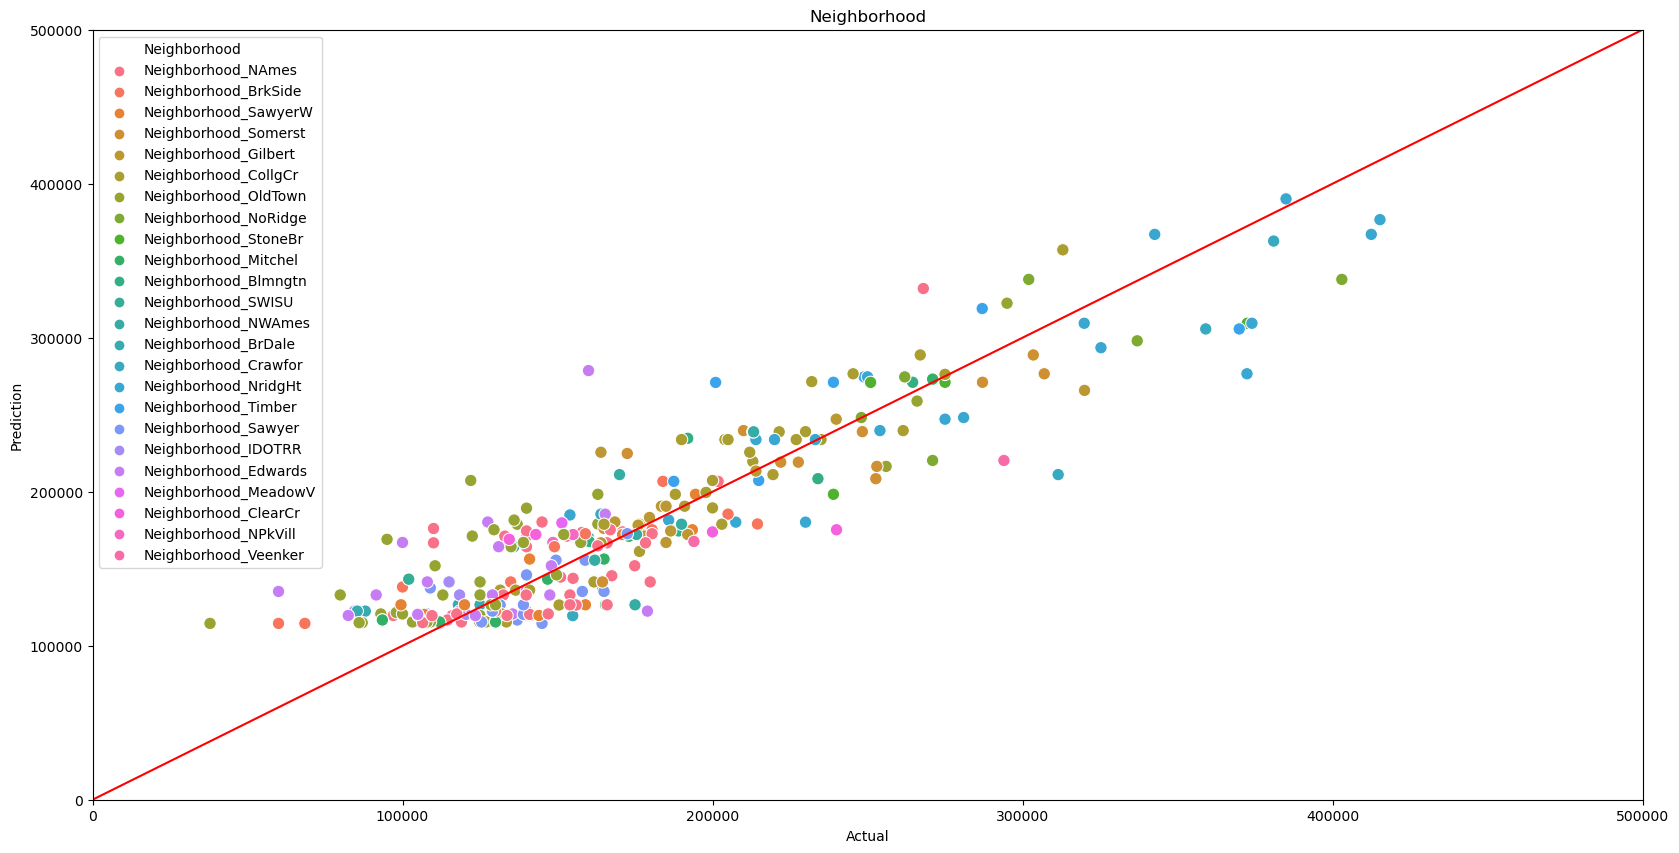

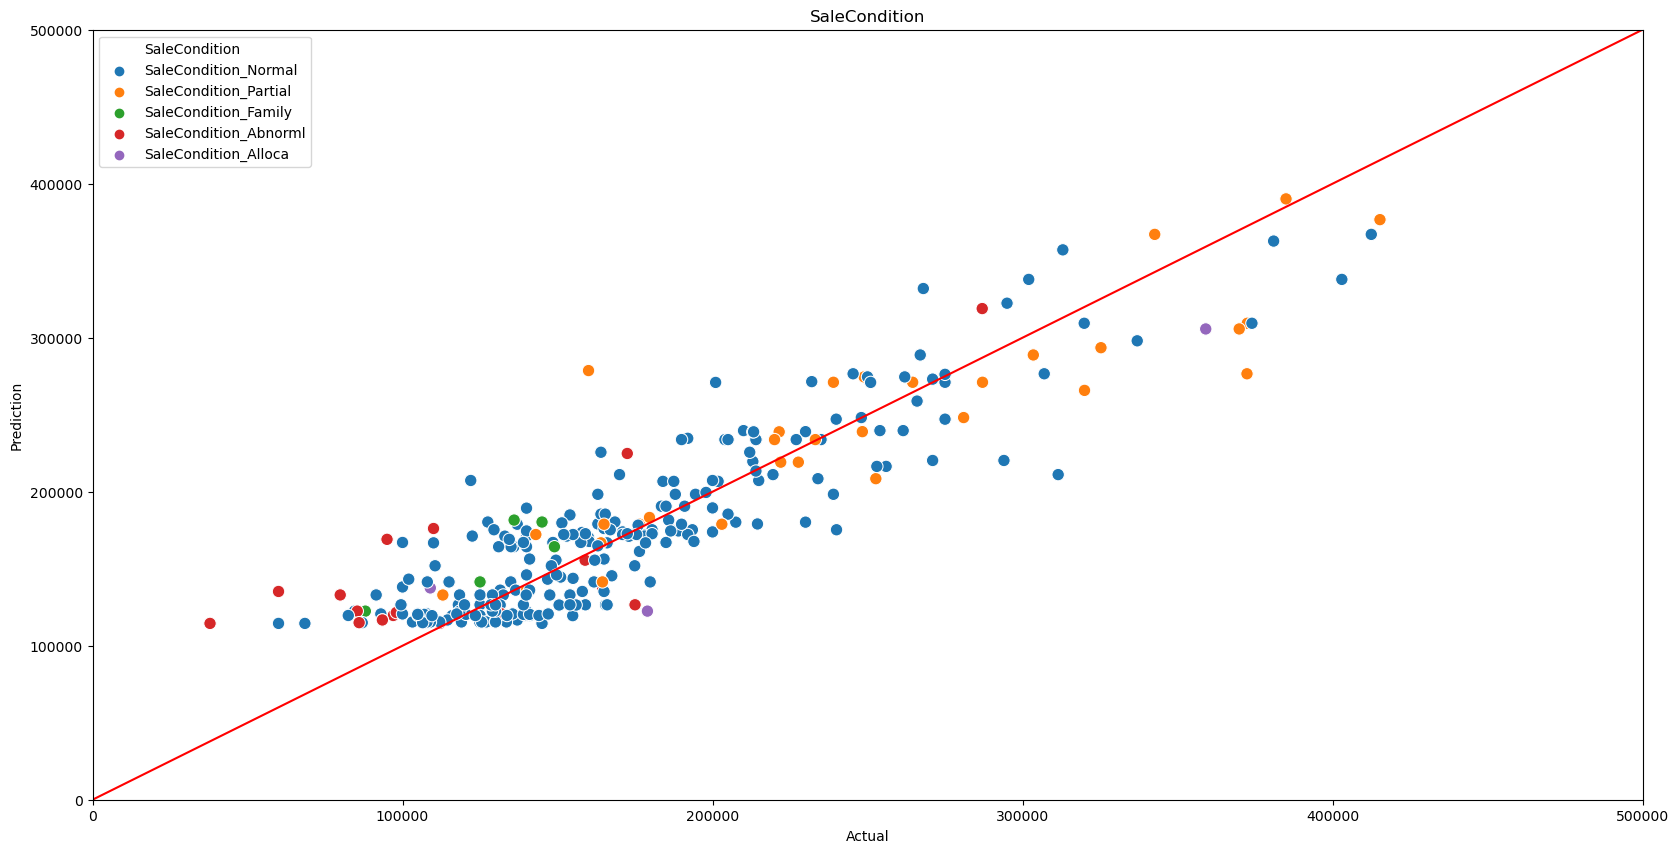

R^2: 0.8515138135664262
Accuracy: 0.7980779073942373
Root Mean Squared Error: 31327.921546944704
Root Mean Squared Log Error: 0.03769545402628085


In [38]:
adaboostregressor(['GrLivArea', 'TotalBsmtSF','GarageArea', 'OverallQual', '1stFlrSF'],
                 covariables=['BldgType','HouseStyle','Neighborhood','SaleCondition'])

We see with the top horizontal bar char that these features are also most important with the ADA boost model. With a root mean square log error of .037, my hunch was correct where ADAboost does not work as well as gradient boost for home prices

# Bagging

Next I try Bagging, which is instead of fitting the weaklearners I want to see if taking a random subsest of the training set and aggregating the predictions will help better predict sales price. My bagging regressor uses the base model of Decision Trees.

In [39]:
def bagregressor(variables, covariables):
    '''
    Bagging function that takes specified feature
    Variables = features that are used for modeling
    Covariables = features that are color-coded in a plot
    '''
    train_data_1 = train_data[variables]
    dev_data_1 = dev_data[variables]
    bag = ensemble.BaggingRegressor(random_state=0)
    bag_param = dict(n_estimators=[int(x) for x in range(1,500, 5)]
                     , max_samples=[int(x) for x in range(1,50, 5)])
    clf = RandomizedSearchCV(bag, bag_param, random_state=0, scoring='neg_mean_squared_log_error')
    search = clf.fit(train_data_1, train_labels)
    best_param = search.best_params_
    print("Best Params:",search.best_params_)
    
    bag_max = ensemble.BaggingRegressor(random_state=0, n_estimators = best_param["n_estimators"], max_samples=best_param["max_samples"])
    bag_max.fit(train_data_1, train_labels)
    prediction_max = bag_max.predict(dev_data_1)
    bag_max.score(dev_data_1,dev_labels)
    
    # showing correlation 
    correlation(dev_labels, prediction_max)
    for i in covariables:
        sns_plot(dev_labels, prediction_max, i)
    
    print("R^2:",bag_max.score(train_data_1,train_labels))    #Finding R^2
    print("Accuracy:",bag_max.score(dev_data_1,dev_labels))    #Finding accuracy of dev data
    print("Root Mean Squared Error:", mean_squared_error(dev_labels, prediction_max, squared=False))
    print("Root Mean Squared Log Error:", mean_squared_log_error(dev_labels, prediction_max))

Best Params: {'n_estimators': 176, 'max_samples': 41}


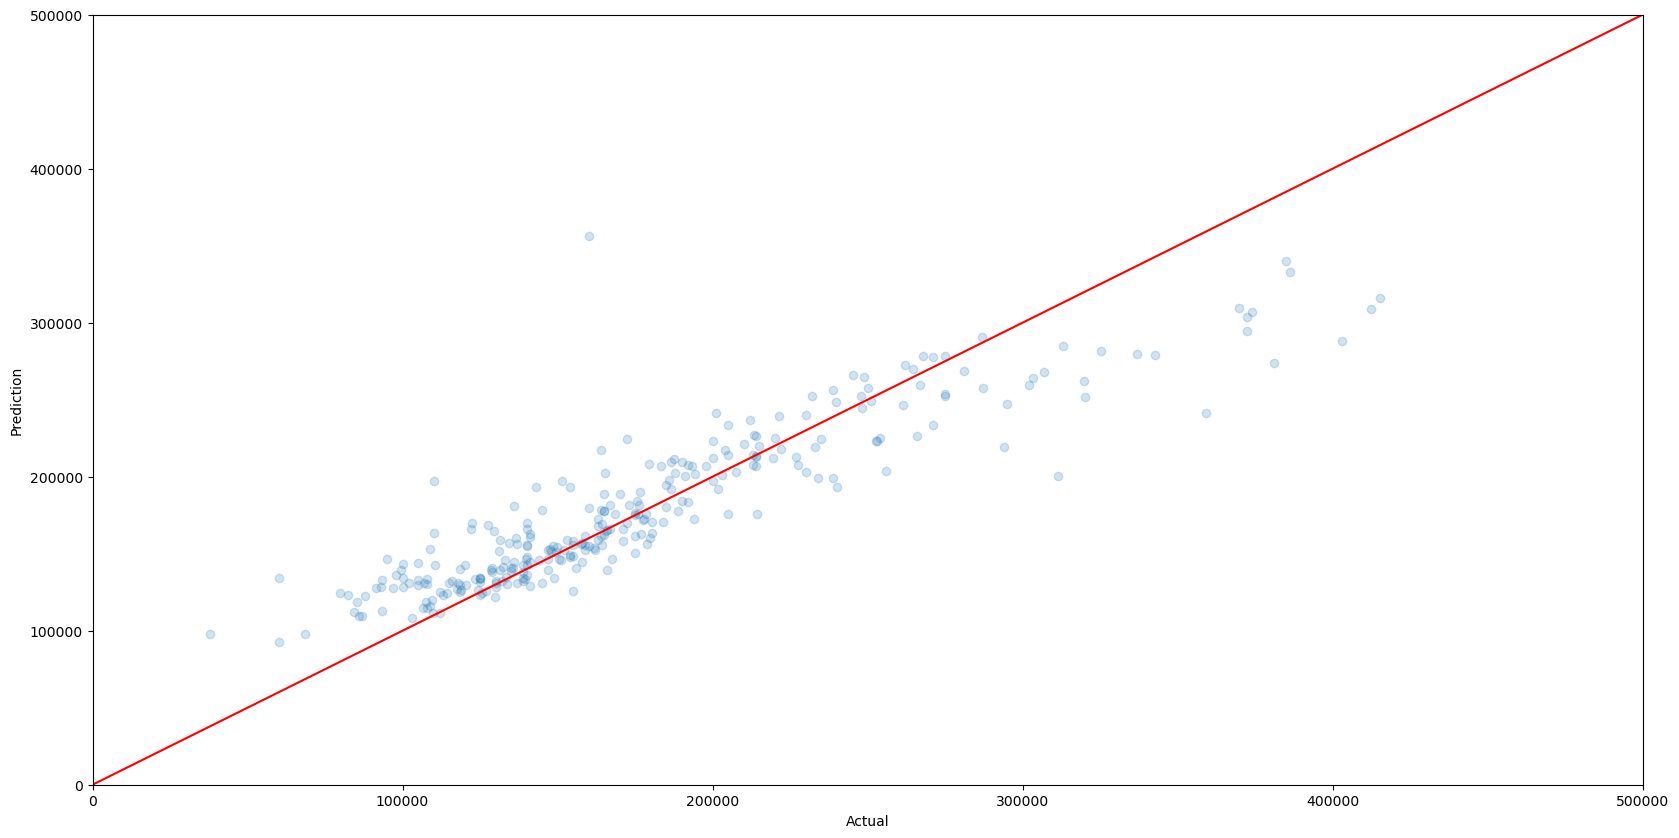

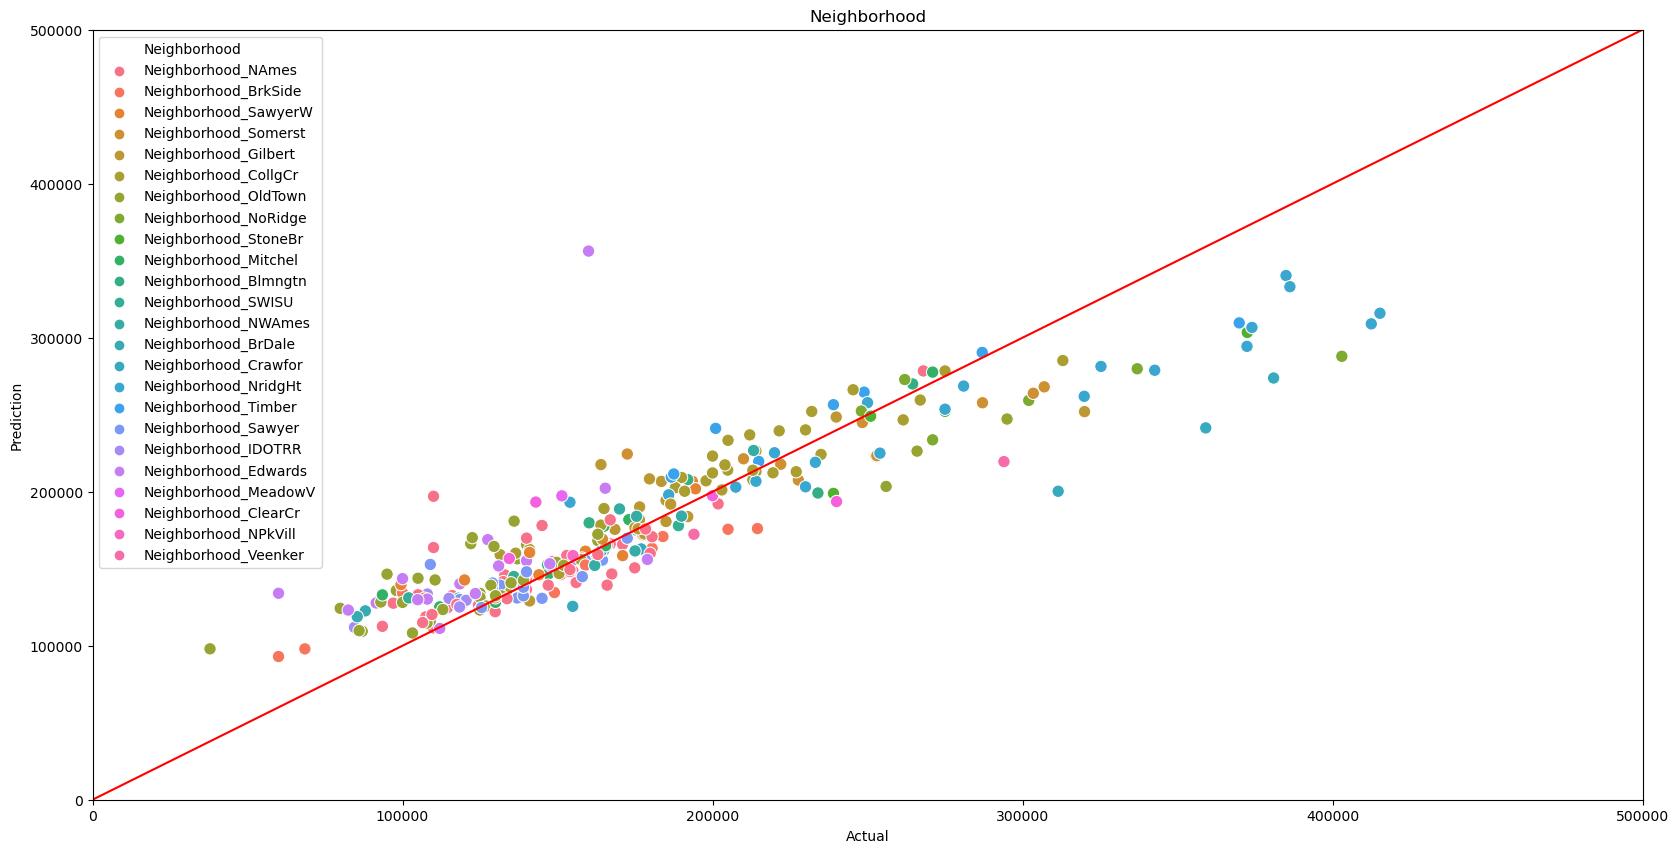

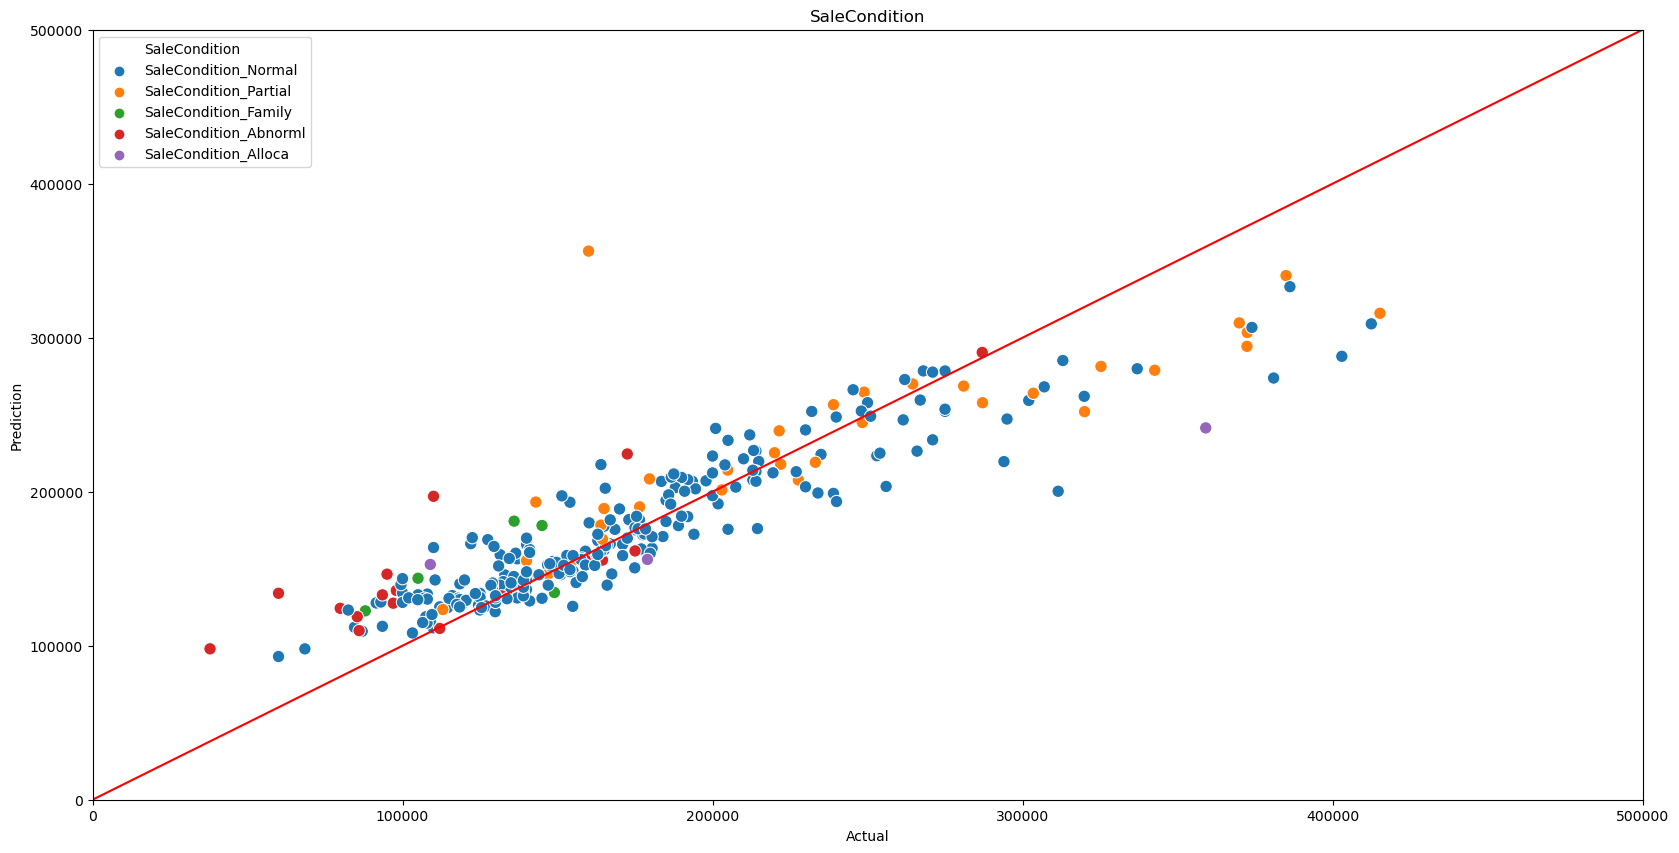

R^2: 0.7751115723692824
Accuracy: 0.7949513370124904
Root Mean Squared Error: 31569.53130914738
Root Mean Squared Log Error: 0.03145591090962244


In [40]:
bagregressor(sorted_correlations.index.tolist(), ['Neighborhood','SaleCondition'])

In [41]:
bagregressor(['GrLivArea', 'TotalBsmtSF', 'OverallQual', 'Neighborhood_NridgHt'], ['Neighborhood'])

Best Params: {'n_estimators': 176, 'max_samples': 41}


KeyboardInterrupt: 

Bagging does slightly better than the ADAboost regressor but on the graphs we see that it is not able to predict the higher priced homes. This is most likely due to there not being enough data in those areas. From the neighborhood color chart, I see that the higher housing prices are correlated with a certain neighborhood. I tried adding that neighborhood as a variable which did help the houses in that neighborhood but negatively affected all other houses as well.

# Random Forest

Random Forest was my next choice as I saw that Bagging with the Decision Tree Regressor returned a decent root mean squared log error.

In [ ]:
def randomforest(variables, covariables):
    train_data_1 = train_data[variables]
    dev_data_1 = dev_data[variables]
    model = ensemble.RandomForestRegressor(min_samples_split=2, random_state=0)
    model_param = dict(n_estimators=[int(x) for x in range(1,100, 5)],
                       max_depth = [int(x) for x in range(1,100, 5)])
    clf = RandomizedSearchCV(model, model_param, random_state=0, scoring='neg_mean_squared_log_error')
    search = clf.fit(train_data_1, train_labels)
    best_param = search.best_params_
    print("Best Params:", search.best_params_)
    
    model_max = ensemble.RandomForestRegressor(min_samples_split=2, random_state=0, max_depth=best_param["max_depth"],
                                              n_estimators = best_param["n_estimators"])
    model_max.fit(train_data_1, train_labels)
    prediction_max = model_max.predict(dev_data_1)
    model_max.score(dev_data_1,dev_labels)
    
    # get the feature importance
    feat_imp = pd.DataFrame()
    feat_imp["variable"] = variables
    feat_imp["feat_importance"] = model_max.feature_importances_
    
    # only show top 20 most important features
    feat_imp = feat_imp.sort_values(by=["feat_importance"], ascending=False).reset_index()[:20]
    plt.rcdefaults()
    fig, ax = plt.subplots()
    ax.barh(feat_imp["variable"], feat_imp["feat_importance"],align='center')
    ax.invert_yaxis()  # labels read top-to-bottom
    plt.show()

    # showing correlation 
    correlation(dev_labels, prediction_max)
    for i in covariables:
        sns_plot(dev_labels, prediction_max, i)

    print("R^2:",model_max.score(train_data_1,train_labels))    #Finding R^2
    print("Accuracy:",model_max.score(dev_data_1,dev_labels))    #Finding accuracy of dev data
    print("Root Mean Squared Error:", mean_squared_error(dev_labels, prediction_max, squared=False))
    print("Root Mean Squared Log Error:", mean_squared_log_error(dev_labels, prediction_max))

In [ ]:
randomforest(train_data.columns,
            covariables=['SaleCondition','Neighborhood'])

I use the above Random Forest model to determine my most important features to avoid overfitting. The Sale Condition scatterplot as well as the Neighborhood scatterplot does not seem to have any specific areas that stand out. 

In [ ]:
randomforest(['GrLivArea', 'TotalBsmtSF', 'OverallQual', '2ndFlrSF', 'LotArea', 'BsmtFinSF1','1stFlrSF',
             'GarageArea', 'FullBath'],
            covariables=['SaleCondition'])

With my selected features, my Random Forest model returns a root mean squared log error of .026 which is a really good score so far. None of the Sale Conditions seem to stand out either. 

# Extra Trees

Lastly, I ran an Extra Trees regression to see whether a random split could potentially do better than the optimum split from Random Forest. Effectively, the Extra Trees regression will reduce variance but may increase bias.

In [ ]:
def extratrees(variables, covariables):
    train_data_1 = train_data[variables]
    dev_data_1 = dev_data[variables]
    model = ensemble.ExtraTreesRegressor(min_samples_split=2, random_state=0)
    model_param = dict(n_estimators=range(1,50), max_depth = range(1,50))
    clf = RandomizedSearchCV(model, model_param, random_state=0, scoring='neg_mean_squared_log_error')
    search = clf.fit(train_data_1, train_labels)
    best_param = search.best_params_
    print(search.best_params_)
    
    model_max = ensemble.ExtraTreesRegressor(min_samples_split=2, random_state=0, max_depth=best_param["max_depth"],
                                              n_estimators = best_param["n_estimators"])
    model_max.fit(train_data_1, train_labels)
    prediction_max = model_max.predict(dev_data_1)
    model_max.score(dev_data_1,dev_labels)

        # get the feature importance
    feat_imp = pd.DataFrame()
    feat_imp["variable"] = variables
    feat_imp["feat_importance"] = model_max.feature_importances_
    # only show top 15 most important features
    feat_imp = feat_imp.sort_values(by=["feat_importance"], ascending=False).reset_index()[:15]
    plt.rcdefaults()
    fig, ax = plt.subplots()
    ax.barh(feat_imp["variable"], feat_imp["feat_importance"],align='center')
    ax.invert_yaxis()  # labels read top-to-bottom
    plt.show()

    # showing correlation 
    correlation(dev_labels, prediction_max)
    for i in covariables:
        sns_plot(dev_labels, prediction_max, i)
    
    print("R^2:",model_max.score(train_data_1,train_labels))    #Finding R^2
    print("Accuracy:",model_max.score(dev_data_1,dev_labels))    #Finding accuracy of dev data
    print("Root Mean Squared Error:", mean_squared_error(dev_labels, prediction_max, squared=False))
    print("Root Mean Squared Log Error:", mean_squared_log_error(dev_labels, prediction_max))

In [ ]:
extratrees(sorted_correlations.index.tolist(), covariables=['Neighborhood'])

I ran the same logic as Random Forest with Extra Trees and received similar most important features. I used these important features to determine my final Extra Trees Model.

In [ ]:
extratrees(['OverallQual','GarageCars','GrLivArea','FullBath','YearBuilt', 'TotalBsmtSF','BsmtFinSF1','GarageArea','1stFlrSF'],
           covariables=['SaleCondition'])

My Extra Trees model returned a .024 root mean squared log error which is slightly better than my Random Forest. Again I did not notice and outlying values for Sale Condition.

# Neural Networks

Steps:  
**A) Start with basic single layer neural network.**  
 1) Baseline Neural Network for comparison  
 2) Effect of epochs and batch size on training time. Find the optimal size for comparing other parameters.  
 3) Comparing optimizers and activation functions to see which to use.  
 4) Effect of learning rate. Is there an optimal learning rate for this dataset?  
 5) Back to effect of batch size because model took a long time to converge. WHat's optimal batch size?  
 6) Training time versus Epochs. Now that we found batch size, let's predict how long it takes to run models at different epochs. How much time do I allocate?  
 7) Running Single Layer NN to optimize MSLE.  We found the ideal parameters, ready to run models.  

RESULT: activation='relu', optimizer = Adam, learning rate = 0.02, batch = 1, epochs = 10,000 but seems to overfit at around 2500.   


**B) Expand to 2-layer neural network.**  
1) Baseline 2-layer NN with reasonable parameters  
2) Can we improve model? -> optimize number of hidden layer nodes  
3) Confirming theory of less nodes improving the model by incorporating less information into model.  Try dropout, L1 and L2 regularizations.   

RESULT: 10 hidden layer nodes, no dropout or regularization.  Low learning rate. Epochs converge at around 30.   

**C) Multi-layer Neural Network, 3 and 4.**  
3 layer has similar MSLE but better Kaggle score. Dropout and Regularization did not help.  
4 layer has similar MSLE but worse kaggle score. 

RESULT: Will choose 3 layer as final NN model.  
   

In [ ]:
#Import Tensorflow Packages used for Neural Network
import tensorflow as tf
tf.__version__
%matplotlib inline
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers
start_nn=time.time()   #calculate time it takes to run this section

#Generate some functions that will be used to analyze different neural network models

#Function to return a Plot and Mean-Squared-Log-Error 
def accuracies_nn(regressor=0, history=0, train_data=train_data, dev_data=dev_data, 
                  prediction=0, m=0, ylimit=0):
    
    #If there are negative predictions, end function
    neg = np.where(prediction[:,0]<0)
    if len(neg[0])>0:
        print("ERROR: Negative Price Prediction at indices:", neg) 
        return

    if m==1:
        regressor.summary()  #print summary if enabled    
    msle=mean_squared_log_error(dev_labels, prediction)
    print("Mean Squared Log Error:", msle)  #print MSLE
    
    #Plotting
    fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,5))
    if ylimit == 0:
        ax1.set_ylim(msle/2, msle*2)   
    elif ylimit != 0:
        ax1.set_ylim(0,ylimit)       #allows to set some custom plotting limits
    ax1.set_title('Train vs Validation')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Mean Squared Log Error')
    ax1.plot(history.history['msle'])
    ax1.plot(history.history['val_msle'])
    ax1.legend(['Train', 'Validation/Development'],loc='upper right') 
    
    ax2.set_title('Sale Prices (prediction & actual)')
    ax2.set_xlabel('Ground Living Area (sqft)')
    ax2.set_ylabel('Sales Price ($)')
    ax2.scatter(dev_data['GrLivArea'],prediction, alpha=0.2, color='red')
    ax2.scatter(dev_data['GrLivArea'],dev_labels, alpha=0.2, color='blue')
    ax2.legend(['Predicted', 'Actual'],loc='upper right')  

    ax3.set_title('Sale Prices (prediction & actual)')
    ax3.set_xlabel('Prediction ($)')
    ax3.set_ylabel('Actual ($)')
    ax3.scatter(prediction,dev_labels)
    ax3.plot(np.linspace(0,500000,1000),np.linspace(0,500000,1000))
    ax3.set_xlim(0,500000)
    ax3.set_ylim(0,500000)
    
#Function to predict the test data (data without labels):
def predict_test_nn(regressor):
    test_prediction = regressor.predict(test_data)
    for each in test_prediction:
        print(each[0])
    return test_prediction

## A) Start with Basic Single Layer Neural Network

In [ ]:
#Function for Single Layer Neural Network with default parameters
def nn_single_layer(batch=1, epochs=10, act='linear', verb=0, opti=optimizers.SGD()): 
    
    #Create Sequential Steps
    model = Sequential()
    model.add(Dense(1, input_dim=222))
    
    #Compile the Steps
    model.compile(optimizer=opti, loss='msle', metrics=['msle'])
    
    #Fit model and Time it
    start=time.time()
    history = model.fit(train_data, train_labels, validation_data = (dev_data, dev_labels),
                        batch_size=batch, verbose=verb, epochs=epochs)
    end=time.time()
    train_time=end-start
    
    #Predict dev_data for use later, Print Results, Return useable items
    prediction = model.predict(dev_data)                 
    print("Batch Size: %d, Epochs: %d, Training Time: %.3f" %(batch,epochs, train_time))
    print("Optimizer: %s, Activation: %s" %(str(opti).split('.')[5].split(' ')[0],act))
    
    return model, history, prediction, train_time

#### Step 1 - Baseline Neural Network
Start with a few epochs and a small batch size to test algorithm. Use SGD optimizer and 'linear' activation.   
Result: MSLE was 36.4 at first try (pretty high), let's try larger epochs and smaller batches

In [ ]:
model,history,prediction,train_time = nn_single_layer(batch=10,epochs=10,verb=0)
accuracies_nn(model, history, train_data, dev_data, prediction, m=0)

#### Step 2 - Effect of Epochs and Batch Size

a) Set above code to:  1000 Epochs and 5 Batches.  
That is about 233 iterations/steps (1168 samples) per epoch or a total of 233,000 steps.  
Result: MSLE was 13.34 at first try (improved but still high). Training time was 194 seconds, quite long! 

b) Set above code to:  100 Epochs and 10 Batches.  
That is about 116 iterations/step (1168 samples) per epoch or a total of 11,600 steps.  
Result: MSLE was 24.7 at first try (better than baseline but worse than model with more steps). Training time was only 13 seconds. Using less steps allow quicker analysis when comparing optimiers and activation functions.  

Let's use 1, 10 batches and 5, 10 epochs to compare optimizers and activation functions.

#### Step 3 - Comparing Optimizers and Activation Functions

The cells below run batches of 1 and 10 with epochs of 5 and 10 while varying two optimizers and two activation functions.  Then plots a dataframe. 

Regarding Optimizers:  
In class we learned about SGD optimizers. On google, Adam was another recommended optimizer. Therefore, I wanted to compare the two. "Adam optimizer is a moment estimator but prefers flat minima in the error surface".  
Based on the results below, Adam optimizer always performs worse than SGD when using default learning rates. Finding the weights through backpropation may not lead to a lot of bouncing around or does not have a flat minima in the error surface.
SGD optimizer will be used for future models.  

Regarding Activation Functions:  
The table below shows that relu and linear activation performs similarly which make sense. relu is just an identity matrix and returns the same value or zero, whichever is greater. relu may actually be better to avoid any negative house price prediction.  Relu will be used.


In [ ]:
# A function to store values of interest into a dictionary
def fill_in_comp(comp,Batch,Epochs,Activation,Optimizer,Learning_Rate,Train_Time,MSLE):
    comp['Batch'].append(Batch)
    comp['Epochs'].append(Epochs)
    comp['Activation'].append(Activation)
    comp['Optimizer'].append(Optimizer)
    comp['Learning_Rate'].append(Learning_Rate)
    comp['Train_Time'].append(Train_Time)
    comp['MSLE'].append(MSLE)
    return comp

In [ ]:
# Initiate a dictionary for plotting differences later
comp={'Batch':[], 'Epochs':[], 'Activation':[],
      'Optimizer':[], 'Learning_Rate':[],
      'Train_Time':[],'MSLE':[]}

#Vary Batch and Epochs Constant
batches=[1, 10]
epochss=[5, 10]

for batch in batches:
    for epochs in epochss:

        # Activation: Linear / Optimizer: SGD    
        print("-"*90)
        act='linear'
        lr='default'
        opti=optimizers.SGD()
        model,history,prediction,train_time = nn_single_layer(batch=batch, epochs=epochs, act=act, verb=0, opti=opti)
        #accuracies_nn(model,train_data=train_data, dev_data=dev_data, prediction=prediction, history=history, m=0)
        msle=mean_squared_log_error(dev_labels, prediction)
        comp = fill_in_comp(comp,batch,epochs,act,str(opti).split('.')[5].split(' ')[0],lr,train_time,msle)

        # Activation: Linear / Optimizer: Adam
        print("-"*90)
        act='linear'
        lr='default'
        opti=optimizers.Adam()
        model,history,prediction,train_time = nn_single_layer(batch=batch, epochs=epochs, act=act, verb=0, opti=opti)
        #accuracies_nn(model, train_data=train_data, dev_data=dev_data, prediction=prediction, history=history, m=0)
        msle=mean_squared_log_error(dev_labels, prediction)
        comp = fill_in_comp(comp,batch,epochs,act,str(opti).split('.')[5].split(' ')[0],lr,train_time,msle)

        # Activation: relu / Optimizer: SGD
        print("-"*90)
        act='relu'
        lr='default'
        opti=optimizers.SGD()
        model,history,prediction,train_time = nn_single_layer(batch=batch, epochs=epochs, act=act, verb=0, opti=opti)
        #accuracies_nn(model, train_data=train_data, dev_data=dev_data, prediction=prediction, history=history, m=0)
        msle=mean_squared_log_error(dev_labels, prediction)
        comp = fill_in_comp(comp,batch,epochs,act,str(opti).split('.')[5].split(' ')[0],lr,train_time,msle)

        # Activation: relu / Optimizer: Adam
        print("-"*90)
        act='relu'
        lr='default'
        opti=optimizers.Adam()
        model,history,prediction,train_time = nn_single_layer(batch=batch, epochs=epochs, act=act, verb=0, opti=opti)
        #accuracies_nn(model, train_data=train_data, dev_data=dev_data, prediction=prediction, history=history, m=0)
        msle=mean_squared_log_error(dev_labels, prediction)
        comp = fill_in_comp(comp,batch,epochs,act,str(opti).split('.')[5].split(' ')[0],lr,train_time,msle)
comp_df=pd.DataFrame(comp, columns=['Batch','Epochs','Activation','Optimizer','Learning_Rate','Train_Time','MSLE'])
comp_df

#### Step 4 - Effect of Learning Rate  

Using SGD and Relu, we vary the learning rate of the optimizer, on only 5 epochs but 1 batch size.  This is 1168(samples) x 5 = 5840 steps. 

Results below showed that learning rate of 100 and 1000 produced decent MSLE for only 5 epochs. Note that sometimes, at different learning rates, MSLE would be really high (bad) which is possible for SGD because the descent could be bouncing too far and jump over the local minima. I assume this is more likely to happen when learning rate is high so we need to be careful.


In [ ]:
# Initiate a dictionary for plotting differences later
comp2={'Batch':[], 'Epochs':[], 'Activation':[],
      'Optimizer':[], 'Learning_Rate':[],
      'Train_Time':[],'MSLE':[]}

#Constant parameters
batch=1
epochs=5
act='relu'
# Vary Learning Rate:
learnrates=[0.01, 0.1, 1, 10, 100, 1000, 10000]

for lr in learnrates:
    print("-"*90)
    opti=optimizers.SGD(learning_rate=lr)
    model,history,prediction,train_time = nn_single_layer(batch=batch, epochs=epochs, act=act, verb=0, opti=opti)
    #accuracies_nn(model, train_data=train_data, dev_data=dev_data, prediction=prediction, history=history, m=0)
    msle=mean_squared_log_error(dev_labels, prediction)
    comp2 = fill_in_comp(comp2,batch,epochs,act,str(opti).split('.')[5].split(' ')[0],lr,train_time,msle)

comp2_df=pd.DataFrame(comp2, columns=['Batch','Epochs','Activation','Optimizer','Learning_Rate','Train_Time','MSLE'])
comp2_df

#### Step 5 - Effect of batch size  

Result below showed that the MSLE bounce really high randomly, probably because the learning rate is high. Regardless, it appears that training time decays exponentially. Batch size of 1 would take a long time, batch 10 would be much less time, but batch 20 wouldn't be that much less time. Using Elbow method on the plot of training time, select batch size 10 for speed since MSLE are still all pretty high and can be corrected with more epochs.

In [ ]:
# Initiate a dictionary for plotting differences later
comp3={'Batch':[], 'Epochs':[], 'Activation':[],
      'Optimizer':[], 'Learning_Rate':[],
      'Train_Time':[],'MSLE':[]}

#Constant parameters
act='relu'
lr = 100
opti=optimizers.SGD(learning_rate=lr)
epochs=5

#Vary Batch size
batches = [1,5,10,20,50,100]

for batch in batches:
    print("-"*90)
    model,history,prediction,train_time = nn_single_layer(batch=batch, epochs=epochs, act=act, verb=0, opti=opti)
    #accuracies_nn(model, train_data=train_data, dev_data=dev_data, prediction=prediction, history=history, m=0)
    msle=mean_squared_log_error(dev_labels, prediction)
    comp3 = fill_in_comp(comp3,batch,epochs,act,str(opti).split('.')[5].split(' ')[0],lr,train_time,msle)

comp3_df=pd.DataFrame(comp3, columns=['Batch','Epochs','Activation','Optimizer','Learning_Rate','Train_Time','MSLE'])
plt.plot(comp3_df['Batch'], comp3_df['Train_Time'])
plt.title('Training Time versus Batch Size')
plt.xlabel('epochs')
plt.ylabel('time')
comp3_df

#### Step 6 - Training Time versus Epochs  
A quick model to predict the training time per epoch was done so that I know how long I can be away from the computer.  
Result: Training 10,000 epochs = can watch a netflix show.

In [ ]:
#Generate models by varying epochs. Wish to gather time for training
comp4={'Batch':[], 'Epochs':[], 'Activation':[], 'Optimizer':[], 'Learning_Rate':[], 'Train_Time':[],'MSLE':[]}  
epochss=[1,5,10,20,50]  
batch=10
for epochs in epochss:  
    opti=optimizers.SGD(learning_rate=100)  
    model,history,prediction,train_time = nn_single_layer(batch=batch, epochs=epochs, act='relu' , verb=0, opti=opti)  
    msle=mean_squared_log_error(dev_labels, prediction)  
    comp4 = fill_in_comp(comp4,batch,epochs,act,str(opti).split('.')[5].split(' ')[0],lr,train_time,msle)  
comp4_df=pd.DataFrame(comp4, columns=['Batch','Epochs','Activation','Optimizer','Learning_Rate','Train_Time','MSLE'])  

#plot training time versus epochs
plt.plot(comp4_df['Epochs'], comp4_df['Train_Time'])  
plt.plot(np.linspace(0,10), np.linspace(0,10))  
plt.xlabel('epochs')  
plt.ylabel('train time (sec)')  
plt.legend(['model', 'line with slope 1'])  

#Predict training time with linear regressiona and add to dataframe
lr = LinearRegression(fit_intercept=True) 
x=np.array(comp4['Epochs']).reshape(-1,1)  
y=np.array(comp4['Train_Time'])  
lr.fit(x,y)  
epoch_predict=[100,1000,2000,3000,5000,10000]  
prediction=lr.predict(np.array(epoch_predict).reshape(-1,1))  
for i in range(len(epoch_predict)):  
    new_row = {'Batch':'10 (PREDICTION)','Epochs':epoch_predict[i],'Activation':'N/A','Optimizer':'N/A',  
               'Learning_Rate':'N/A','Train_Time':prediction[i],'MSLE':'N/A'}   
    #append row to the dataframe  
    comp4_df = comp4_df.append(new_row, ignore_index=True)  
comp4_df

#### Step 7 - Running Models to Optimize MSLE

Now that we have some parameters, we can start running models with more epochs.  

Model 1:   
activation='relu', optimizer=SGD, learning rate=100 , batch=10  
5000 epochs returned an MSLE=0.525 which is high.  Took 600+ seconds too!  Script not provided, you'll have to trust me.
I believe the learning rate was too high or there was no momentum in optimizer for SGD. Adam may actually be better... as opposed to our findings before. But maybe we can increase number of steps by decreasing batch size.

Model 2:  
activation='relu', optimizer=SGD, learning rate=1000 , batch=1  
1000 epochs returned an MSLE=0.67 which is wosre.  Took 738 seconds.   
LR might still be too high and missing the local minima for the weights.

#### Theory: Run model with lower learning rate so we do not miss the local minima. Need to increase epochs to hopefully reach convergence. Run model with adam optimizer, maybe this momentum optimizer would help speed things up.

Model:  
Activation: relu / Optimizer: Adam / Learning Rate: 0.02 / Batch size = 1 / Epochs = 10000
(Learning Rate of 0.02 is 10x the default optimizer)

Result:  
Mean Squared Log Error: 0.02571031041571618   
Training Time: 8008.020   
__MSLE is really low, Success! Will submit to kaggle__   
Kaggle Score: 0.16546

Dissusion:  
While MSLE was low, the training time took very long.  Analyzing the training versus validation/development MSLE versus Epochs plot, we can see that the model starts overfitting after 2500epochs where training MSLE continues to decrease while the validation/development data MSLE stops decreasing.    

            
Script (not in a cell b/c it took 8000 seconds to run):  
```
model2,history2,prediction2,train_time2 = nn_single_layer(batch=1, epochs=10000, act='relu', verb=0,                                                                                 opti=optimizers.Adam(learning_rate=0.02))  
accuracies_nn(model2, train_data=train_data, dev_data=dev_data, prediction=prediction2, history=history2, m=0)  

#### Theory: To decrease training time, stop model when it starts to overfit. Per previous model, this was at 2500 epochs. 

Model:  
Activation: relu / Optimizer: Adam / Learning Rate: 0.02 / Batch size = 1 / Epochs = 2500
(Learning Rate of 0.02 is 10x the default optimizer)

Result:  
Mean Squared Log Error: 0.03914044220087549   
Training Time: 1866.401 
__MSLE is low still, will try a predict true test data and submit to kaggle as well__   
Kaggle score: 0.20330

Dissusion:  
Training time decreased by 6000 seconds. 
            
Script (not in a cell b/c it took 1866 seconds to run):  
```
model3,history3,prediction3,train_time3 = nn_single_layer(batch=1, epochs=2500, act='relu', verb=0,                                                                                   opti=optimizers.Adam(learning_rate=0.02))  
accuracies_nn(model3, train_data=train_data, dev_data=dev_data, prediction=prediction3, history=history3, m=0)  

## B) Expand to 2-Layer Neural Network 

In [ ]:
#Function for Two Layer Neural Network with default parameters
def nn_two_layer(batch=1, epochs=50, hidden1_n=5, act1='linear', act2='linear', verb=0, opti=optimizers.SGD()): 
    
    #Create Sequential Steps
    model = Sequential()
    model.add(Dense(hidden1_n, input_dim=222, activation = act1))
    model.add(Dense(1, activation = act2))
    
    #Compile the Steps
    model.compile(optimizer=opti, loss='msle', metrics=['msle'])
    
    #Fit model and Time it
    start=time.time()
    history = model.fit(train_data, train_labels, validation_data = (dev_data, dev_labels),
                        batch_size=batch, verbose=verb, epochs=epochs)
    end=time.time()
    train_time=end-start
    
    #Predict dev_data for use later, Print Results, Return useable items
    prediction = model.predict(dev_data)                 
    print("Batch Size: %d, Epochs: %d, Training Time: %.3f" %(batch,epochs, train_time))
    print("Optimizer: %s, Activation: %s" %(str(opti).split('.')[5].split(' ')[0],act))
    print("Hidden Layer Features: %d" %(hidden1_n))
    
    return model, history, prediction, train_time

# A function to store values into a dictionary
def fill_in_comp_2l(comp,Batch,Epochs,Activation,Optimizer,Learning_Rate,Train_Time,MSLE,Hidden_Layer_Nodes):
    comp['Batch'].append(Batch)
    comp['Epochs'].append(Epochs)
    comp['Activation'].append(Activation)
    comp['Optimizer'].append(Optimizer)
    comp['Learning_Rate'].append(Learning_Rate)
    comp['Train_Time'].append(Train_Time)
    comp['MSLE'].append(MSLE)
    comp['Hidden_Layer_Nodes'].append(Hidden_Layer_Nodes)
    return comp

#### Step 1: Run a 2-layer NN with reasonable parameters

Based on previous analysis:
Use batch size 1 to update model often.  
Run for 100 epochs to hopefully see convergence.  
Select 5 hidden layer nodes b/c the features can be grouped in to 5 main categories: Type of neighborhood, Quality of house, Size of house, Type of house sale, and Appearance of house
Select relu for activation to avoid negative home prices. Although this hasn't happened.  
Select Adam optimizer to take advantage of momentum at each update step. Using a low learning rate would not jump over the local minima.  

Result: MSLE = 0.0251. 129 seconds training time. This is great because it already beat my single layer NN!  

In [ ]:
# Initiate a dictionary for plotting differences later
comp5={'Batch':[], 'Epochs':[], 'Activation':[],
      'Optimizer':[], 'Learning_Rate':[],
      'Train_Time':[],'MSLE':[], 'Hidden_Layer_Nodes':[]}

#Constant parameters
batch=1
epochs=100
hidden1_n=5
act1='relu'
act2='relu'
lr=0.01
opti=optimizers.Adam(learning_rate=lr)

model_2l,history_2l,prediction_2l,train_time_2l = nn_two_layer(batch, epochs, hidden1_n, act1, act2, 0, opti)
accuracies_nn(model_2l, history_2l, train_data, dev_data, prediction_2l, m=1, ylimit=0.1)
comp5 = fill_in_comp_2l(comp5,batch,epochs,act1,str(opti).split('.')[5].split(' ')[0],lr,train_time_2l,msle,hidden1_n)


#### Step 2: But can we improve model??

__Theory__ : Because we have a sparse training data set, using a small(er) amount of hidden layer nodes than original number of features should lead to a better model because you would gather the most important variances from the large number of features.  

Therefore, model was ran with varying hidden layer nodes, both less than and more than number of features in training data.    
It is confirmed that at smaller hidden layer nodes, the MSLE was lower (a better model).  However, 10 and 20 hidden layer nodes performed better than 5 hidden layer nodes.  

What was interesting and not shown below is that when I tried using a smaller learning rate of 0.001 (instead of 0.01, it showed that higher nodes performed better (1000 nodes performed better than 5 nodes,etc...). This could be that the models with higher number nodes were reaching convergence faster than models with lower number of nodes. But overall, when convergence is reached, it is expected that higher number of nodes would overfit the model, as shown in the model below with a higher learning rate.

In [ ]:
# Initiate a dictionary for plotting differences later
comp5={'Batch':[], 'Epochs':[], 'Activation':[],
      'Optimizer':[], 'Learning_Rate':[],
      'Train_Time':[],'MSLE':[], 'Hidden_Layer_Nodes':[]}

#Constant parameters
batch=1
epochs=100
hidden1_ns=[5,10,50,100,222,500,1000]
act1='relu'
act2='relu'
lr=0.01
opti=optimizers.Adam(learning_rate=lr)

for hidden1_n in hidden1_ns:
    print("-"*90)
    model_2l2,history_2l2,prediction_2l2,train_time_2l2 = nn_two_layer(batch, epochs, hidden1_n, act1, act2, 0, opti)
    prediction_2l2 = model_2l2.predict(dev_data)                 #predict
    #accuracies_nn(model_2l2, history_2l2, train_data, dev_data, prediction_2l2, m=0, ylimit=0)
    msle=mean_squared_log_error(dev_labels, prediction_2l2)
    comp5 = fill_in_comp_2l(comp5,batch,epochs,act1,str(opti).split('.')[5].split(' ')[0],lr,train_time_2l2,msle,hidden1_n)

comp5_df=pd.DataFrame(comp5, columns=['Batch','Epochs','Activation','Optimizer','Learning_Rate',
                                      'Train_Time','MSLE','Hidden_Layer_Nodes'])
comp5_df

#### Step 3: Confirming theory of less nodes improving the model

__Theory__ If less hidden layer nodes improve the model, less feature information may make model better. 

We will use "drop out" to set random features to 0 weights, essentially dropping out some nodes.

We will also separately run L1 regularization to see if removing the least important features will improve the model.  

If both actually improve model, we will combine them.  

Result:  
Dropout and L1 and L2 regularization did not improve the model.  This would mean that all features are important in helping predict the sales price of a home.  
Another result for L1 or L2 regularization. If applied on input layer, performed worse than L1 or L2 regularization on the hidden layer. It means that the information from the 222 input features were all important whereas the hidden layer, there may be some features that were not important. If applied on both layers, it performed worst.

Future models will not utilize dropout or regularization unless there appears to be overfitting.   

In [ ]:
#Create new function for storing a new dataframe with interesting conditions.
def fill_in_comp_2l2(comp,Batch,Epochs,Dropout,L1Reg,L2Reg,Train_Time,MSLE,Hidden_Layer_Nodes):
    comp['Batch'].append(Batch)
    comp['Epochs'].append(Epochs)
    comp['Dropout'].append(Dropout)
    comp['L1Reg'].append(L1Reg)
    comp['L2Reg'].append(L2Reg)
    comp['Train_Time'].append(Train_Time)
    comp['MSLE'].append(MSLE)
    comp['Hidden_Layer_Nodes'].append(Hidden_Layer_Nodes)
    return comp

# Initiate a dictionary for plotting differences later
comp6={'Batch':[], 'Epochs':[], 'Dropout':[], 'L1Reg':[], 'L2Reg':[], 
      'Train_Time':[],'MSLE':[], 'Hidden_Layer_Nodes':[]}

#Base Model for comparing to models with dropout, L1 and L2 models. 

#Constant parameters for all of following models.
batch=1
epochs=100
hidden1_n=10
act1='relu'
act2='relu'
lr=0.01
opti=optimizers.Adam(learning_rate=lr)

#Varying parameters for each model
dropout='No'
L1Reg='No'
L2Reg='No'

model_2lb,history_2lb,prediction_2lb,train_time_2lb = nn_two_layer(batch, epochs, hidden1_n, act1, act2, 0, opti) #train model
accuracies_nn(model_2lb, history_2lb, train_data, dev_data, prediction_2lb, m=0, ylimit=0)
msle=mean_squared_log_error(dev_labels, prediction_2lb)
comp6 = fill_in_comp_2l2(comp6,batch,epochs,dropout,L1Reg,L2Reg,train_time_2lb,msle,hidden1_n)

In [ ]:
def nn_two_layer_dropout(batch=1, epochs=50, hidden1_n=5, act1='linear', act2='linear', 
                         verb=0, opti=optimizers.SGD(), dropout=dropout): 
    
    #Create Sequential Steps
    model = Sequential()
    model.add(Dense(hidden1_n, input_dim=222, activation = act1))
    model.add(Dropout(dropout))
    model.add(Dense(1, activation = act2))
    
    #Compile the Steps
    model.compile(optimizer=opti, loss='msle', metrics=['msle'])
    
    #Fit model and Time it
    start=time.time()
    history = model.fit(train_data, train_labels, validation_data = (dev_data, dev_labels),
                        batch_size=batch, verbose=verb, epochs=epochs)
    end=time.time()
    train_time=end-start
    
    #Predict dev_data for use later, Print Results, Return useable items
    prediction = model.predict(dev_data)                 
    print("Batch Size: %d, Epochs: %d, Training Time: %.3f" %(batch,epochs, train_time))
    print("Optimizer: %s, Activation: %s" %(str(opti).split('.')[5].split(' ')[0],act))
    print("Hidden Layer Features: %d" %(hidden1_n))
    
    return model, history, prediction, train_time

#Varying parameters for each model
dropout=0.5
L1Reg='No'
L2Reg='No'

model_2ld,history_2ld,prediction_2ld,train_time_2ld = nn_two_layer_dropout(batch, epochs, hidden1_n, 
                                                                           act1, act2, 0, opti, dropout)
accuracies_nn(model_2ld, history_2ld, train_data, dev_data, prediction_2ld, m=0, ylimit=0)
msle=mean_squared_log_error(dev_labels, prediction_2ld)
comp6 = fill_in_comp_2l2(comp6,batch,epochs,dropout,L1Reg, L2Reg,train_time_2ld,msle,hidden1_n)

In [ ]:
def nn_two_layer_l1reg(batch=1, epochs=50, hidden1_n=5, act1='linear', act2='linear', 
                       verb=0, opti=optimizers.SGD(), order=0): 
    
    if order == '1st Layer':
        #Create Sequential Steps
        model = Sequential()
        model.add(Dense(hidden1_n, input_dim=222, activation = act1,kernel_regularizer=regularizers.l1(0.01)))
        model.add(Dense(1, activation = act2))
    if order == '2nd Layer':
        #Create Sequential Steps
        model = Sequential()
        model.add(Dense(hidden1_n, input_dim=222, activation = act1))
        model.add(Dense(1, activation = act2,kernel_regularizer=regularizers.l1(0.01)))
    if order == 'Both Layers':      
        #Create Sequential Steps
        model = Sequential()
        model.add(Dense(hidden1_n, input_dim=222, activation = act1,kernel_regularizer=regularizers.l1(0.01)))
        model.add(Dense(1, activation = act2,kernel_regularizer=regularizers.l1(0.01)))
        
    #Compile the Steps
    model.compile(optimizer=opti, loss='msle', metrics=['msle'])
    
    #Fit model and Time it
    start=time.time()
    history = model.fit(train_data, train_labels, validation_data = (dev_data, dev_labels),
                        batch_size=batch, verbose=verb, epochs=epochs)
    end=time.time()
    train_time=end-start
    
    #Predict dev_data for use later, Print Results, Return useable items
    prediction = model.predict(dev_data)                 
    print("Batch Size: %d, Epochs: %d, Training Time: %.3f" %(batch,epochs, train_time))
    print("Optimizer: %s, Activation: %s" %(str(opti).split('.')[5].split(' ')[0],act))
    print("Hidden Layer Features: %d" %(hidden1_n))
    
    return model, history, prediction, train_time

#Varying parameters for each model
dropout='No'
L1Reg='1st Layer'
L2Reg='No'
print("-"*90)
model_2ll1r,history_2ll1r,prediction_2ll1r,train_time_2ll1r = nn_two_layer_l1reg(batch, epochs, hidden1_n, 
                                                                                 act1, act2, 0, opti, order=L1Reg)
accuracies_nn(model_2ll1r, history_2ll1r, train_data, dev_data, prediction_2ll1r, m=0, ylimit=0)
msle=mean_squared_log_error(dev_labels, prediction_2ll1r)
comp6 = fill_in_comp_2l2(comp6,batch,epochs,dropout,L1Reg, L2Reg,train_time_2ld,msle,hidden1_n)

#Varying parameters for each model
dropout='No'
L1Reg='2nd Layer'
L2Reg='No'
print("-"*90)
model_2ll1r,history_2ll1r,prediction_2ll1r,train_time_2ll1r = nn_two_layer_l1reg(batch, epochs, hidden1_n, 
                                                                                 act1, act2, 0, opti, order=L1Reg)
accuracies_nn(model_2ll1r, history_2ll1r, train_data, dev_data, prediction_2ll1r, m=0, ylimit=0)
msle=mean_squared_log_error(dev_labels, prediction_2ll1r)
comp6 = fill_in_comp_2l2(comp6,batch,epochs,dropout,L1Reg, L2Reg,train_time_2ld,msle,hidden1_n)

#Varying parameters for each model
dropout='No'
L1Reg='Both Layers'
L2Reg='No'
print("-"*90)
model_2ll1r,history_2ll1r,prediction_2ll1r,train_time_2ll1r = nn_two_layer_l1reg(batch, epochs, hidden1_n, 
                                                                                 act1, act2, 0, opti, order=L1Reg)
accuracies_nn(model_2ll1r, history_2ll1r, train_data, dev_data, prediction_2ll1r, m=0, ylimit=0)
msle=mean_squared_log_error(dev_labels, prediction_2ll1r)
comp6 = fill_in_comp_2l2(comp6,batch,epochs,dropout,L1Reg, L2Reg,train_time_2ld,msle,hidden1_n)

In [ ]:
def nn_two_layer_l2reg(batch=1, epochs=50, hidden1_n=5, act1='linear', act2='linear', 
                       verb=0, opti=optimizers.SGD(), order=0): 
    
    if order == '1st Layer':
        #Create Sequential Steps
        model = Sequential()
        model.add(Dense(hidden1_n, input_dim=222, activation = act1,kernel_regularizer=regularizers.l2(0.01)))
        model.add(Dense(1, activation = act2))
    if order == '2nd Layer':
        #Create Sequential Steps
        model = Sequential()
        model.add(Dense(hidden1_n, input_dim=222, activation = act1))
        model.add(Dense(1, activation = act2,kernel_regularizer=regularizers.l2(0.01)))
    if order == 'Both Layers':      
        #Create Sequential Steps
        model = Sequential()
        model.add(Dense(hidden1_n, input_dim=222, activation = act1,kernel_regularizer=regularizers.l2(0.01)))
        model.add(Dense(1, activation = act2,kernel_regularizer=regularizers.l2(0.01)))
        
    #Compile the Steps
    model.compile(optimizer=opti, loss='msle', metrics=['msle'])
    
    #Fit model and Time it
    start=time.time()
    history = model.fit(train_data, train_labels, validation_data = (dev_data, dev_labels),
                        batch_size=batch, verbose=verb, epochs=epochs)
    end=time.time()
    train_time=end-start
    
    #Predict dev_data for use later, Print Results, Return useable items
    prediction = model.predict(dev_data)                 
    print("Batch Size: %d, Epochs: %d, Training Time: %.3f" %(batch,epochs, train_time))
    print("Optimizer: %s, Activation: %s" %(str(opti).split('.')[5].split(' ')[0],act))
    print("Hidden Layer Features: %d" %(hidden1_n))
    
    return model, history, prediction, train_time


#Varying parameters for each model
dropout='No'
L1Reg='No'
L2Reg='1st Layer'
print("-"*90)
model_2ll2r,history_2ll2r,prediction_2ll2r,train_time_2ll2r = nn_two_layer_l2reg(batch, epochs, hidden1_n, 
                                                                                 act1, act2, 0, opti, order=L2Reg)
accuracies_nn(model_2ll2r, history_2ll2r, train_data, dev_data, prediction_2ll2r, m=0, ylimit=0)
msle=mean_squared_log_error(dev_labels, prediction_2ll2r)
comp6 = fill_in_comp_2l2(comp6,batch,epochs,dropout,L1Reg, L2Reg,train_time_2ll2r,msle,hidden1_n)

#Varying parameters for each model
dropout='No'
L1Reg='No'
L2Reg='2nd Layer'
print("-"*90)
model_2ll2r,history_2ll2r,prediction_2ll2r,train_time_2ll2r = nn_two_layer_l2reg(batch, epochs, hidden1_n, 
                                                                                 act1, act2, 0, opti, order=L2Reg)
accuracies_nn(model_2ll2r, history_2ll2r, train_data, dev_data, prediction_2ll2r, m=0, ylimit=0)
msle=mean_squared_log_error(dev_labels, prediction_2ll2r)
comp6 = fill_in_comp_2l2(comp6,batch,epochs,dropout,L1Reg, L2Reg,train_time_2ll2r,msle,hidden1_n)

#Varying parameters for each model
dropout='No'
L1Reg='No'
L2Reg='Both Layers'
print("-"*90)
model_2ll2r,history_2ll2r,prediction_2ll2r,train_time_2ll2r = nn_two_layer_l2reg(batch, epochs, hidden1_n, 
                                                                                 act1, act2, 0, opti, order=L2Reg)
accuracies_nn(model_2ll2r, history_2ll2r, train_data, dev_data, prediction_2ll2r, m=0, ylimit=0)
msle=mean_squared_log_error(dev_labels, prediction_2ll2r)
comp6 = fill_in_comp_2l2(comp6,batch,epochs,dropout,L1Reg, L2Reg,train_time_2ll2r,msle,hidden1_n)

In [ ]:
comp6_df=pd.DataFrame(comp6, columns=['Batch','Epochs','Dropout','L1Reg','L2Reg',
                                      'Train_Time','MSLE','Hidden_Layer_Nodes'])
comp6_df

#### Final 2 layer neural network

From this analysis, the final 2-layer neural network will have the following parameters:
10 hidden layer nodes. Without Dropout or regularization.  
Low learning rate so that we can slow down the gradient descent and not jump over local minimas.  
Batch:1, Epochs:100 

In [ ]:
batch=1
epochs=100
hidden1_n=10
act1='relu'
act2='relu'
lr=0.01
opti=optimizers.Adam(learning_rate=lr)

#Function for Two Layer Neural Network with default parameters
def nn_two_layer(batch=1, epochs=50, hidden1_n=5, act1='linear', act2='linear', verb=0, opti=optimizers.SGD()): 
    
    #Create Sequential Steps
    model = Sequential()
    model.add(Dense(hidden1_n, input_dim=222, activation = act1))
    model.add(Dense(1, activation = act2))
    
    #Compile the Steps
    model.compile(optimizer=opti, loss='msle', metrics=['msle'])
    
    #Fit model and Time it
    start=time.time()
    history = model.fit(train_data, train_labels, validation_data = (dev_data, dev_labels),
                        batch_size=batch, verbose=verb, epochs=epochs)
    end=time.time()
    train_time=end-start
    
    #Predict dev_data for use later, Print Results, Return useable items
    prediction = model.predict(dev_data)                 
    print("Batch Size: %d, Epochs: %d, Training Time: %.3f" %(batch,epochs, train_time))
    print("Optimizer: %s, Activation: %s" %(str(opti).split('.')[5].split(' ')[0],act))
    print("Hidden Layer Features: %d" %(hidden1_n))
    
    return model, history, prediction, train_time


final_2l_model,final_2l_history,final_2l_prediction,final_2l_train_time = nn_two_layer(batch, epochs, hidden1_n, 
                                                                           act1, act2, 0, opti)
accuracies_nn(final_2l_model, final_2l_history, train_data, dev_data, final_2l_prediction, m=0, ylimit=0.3)


## C) Multi-layer Neural Network - 3 & 4 layers

Would a 3-layer neural network improve?  Take lessons from previous analysis but apply it for a 3-layer.

Lessons learned before:  
1) Use 10 hidden nodes in 1st hidden layer  
2) Do not use dropout, l1 or l2 regularization
3) use learning rate of 0.01 with adam optimizer and relu activation function  
4) use 1 batch for 50 epochs.  


Result: Low MSLE score but showed some overfitting after only 18-20 epochs. Dropout and regularization did not appear to help improve model.  Resulting 3-layer NN had the lowest kaggle score of the previous neural networks.

In [ ]:
#Function for Three Layer Neural Network with default parameters
def nn_three_layer(batch=10, epochs=50, hidden1_n=10, hidden2_n=5, 
                   act1='linear', act2='linear', act3='linear', verb=0, opti=optimizers.SGD(), dr=0): 
    
    if dr==0:
        #Create Sequential Steps without dropout and regularization
        model = Sequential()
        model.add(Dense(hidden1_n, input_dim=222, activation = act1))
        model.add(Dense(hidden2_n, activation =act2))
        model.add(Dense(1, activation =act3))   
    
    elif dr!=0:
        #Create Sequential Steps with dropout and regularization
        model = Sequential()
        model.add(Dense(hidden1_n, input_dim=222, activation = act1,kernel_regularizer=regularizers.l1(0.01)))
        model.add(Dropout(dr))
        model.add(Dense(hidden2_n, activation =act2))
        model.add(Dropout(dr))
        model.add(Dense(1, activation =act3)) 

    #Compile the Steps
    model.compile(optimizer=opti, loss='msle', metrics=['msle'])
    
    #Fit model and Time it
    start=time.time()
    history = model.fit(train_data, train_labels, validation_data = (dev_data, dev_labels),
                        batch_size=batch, verbose=verb, epochs=epochs)
    end=time.time()
    train_time=end-start
    
    #Predict dev_data for use later, Print Results, Return useable items
    prediction = model.predict(dev_data)                 
    print("Batch Size: %d, Epochs: %d, Training Time: %.3f" %(batch,epochs, train_time))
    print("Optimizer: %s, Activation: %s" %(str(opti).split('.')[5].split(' ')[0],act))
    print("Hidden Layer Features: %d" %(hidden1_n))
    
    return model, history, prediction, train_time


In [ ]:
# 3-layer no dropout or regularization
batch=1
epochs=50
hidden1_n=10
hidden2_n=5
act1='relu'
act2='relu'
act3='relu'
lr=0.01
opti=optimizers.Adam(learning_rate=lr)

model_3l,history_3l,prediction_3l,train_time_3l = nn_three_layer(batch, epochs, hidden1_n, hidden2_n, 
                                                                           act1, act2, act3, 0, opti)
accuracies_nn(model_3l, history_3l, train_data, dev_data, prediction_3l, m=0, ylimit=0)

**COMMENT:**  There seems to be overfitting.  Let's use dropouts and regularizations.  

Result: running dropouts and l1 regularization separately and combined, all did not help fix the overfitting.  Best model still appears to be no dropout and regularization.

In [ ]:
# 3-layer with dropout and regularization

batch=1
epochs=50
hidden1_n=10
hidden2_n=5
act1='relu'
act2='relu'
act3='relu'
lr=0.01
opti=optimizers.Adam(learning_rate=lr)
dr=0.5

model_3l,history_3l,prediction_3l,train_time_3l = nn_three_layer(batch, epochs, hidden1_n, hidden2_n, 
                                                                           act1, act2, act3, 0, opti, dr)
accuracies_nn(model_3l, history_3l, train_data, dev_data, prediction_3l, m=0, ylimit=0)

In [ ]:
# 4-layer without dropout and regularization

#Function for Four Layer Neural Network with default parameters
def nn_four_layer(batch=10, epochs=50, hidden1_n=10, hidden2_n=5, hidden3_n=2,
                  act1='linear', act2='linear', act3='linear', act4='linear',
                  verb=0, opti=optimizers.SGD()): 
    
    #Create Sequential Steps
    model = Sequential()
    model.add(Dense(hidden1_n, input_dim=222, activation = act1))
    model.add(Dense(hidden2_n, activation =act2))
    model.add(Dense(hidden3_n, activation =act3))
    model.add(Dense(1, activation =act4))   
    
    #Compile the Steps
    model.compile(optimizer=opti, loss='msle', metrics=['msle'])
    
    #Fit model and Time it
    start=time.time()
    history = model.fit(train_data, train_labels, validation_data = (dev_data, dev_labels),
                        batch_size=batch, verbose=verb, epochs=epochs)
    end=time.time()
    train_time=end-start
    
    #Predict dev_data for use later, Print Results, Return useable items
    prediction = model.predict(dev_data)                 
    print("Batch Size: %d, Epochs: %d, Training Time: %.3f" %(batch,epochs, train_time))
    print("Optimizer: %s, Activation: %s" %(str(opti).split('.')[5].split(' ')[0],act))
    print("Hidden Layer Features: %d" %(hidden1_n))
    
    return model, history, prediction, train_time


batch=1
epochs=40
hidden1_n=10
hidden2_n=5
hidden3_n=2
act1='relu'
act2='relu'
act3='relu'
act4='relu'
lr=0.01
opti=optimizers.Adam(learning_rate=lr)

model_4ld,history_4ld,prediction_4ld,train_time_4ld = nn_four_layer(batch, epochs, hidden1_n, hidden2_n, hidden3_n, 
                                                                     act1, act2, act3,act4, 0, opti)
accuracies_nn(model_4ld, history_4ld, train_data, dev_data, prediction_4ld, m=0, ylimit=0)


In [ ]:
end_nn = time.time()
print("time to run NN section:", end_nn - start_nn)